#PART2

In [ ]:
# %matplotlib inline
from datetime import datetime
import os
import plotly.graph_objects as go
import plotly.express as ex
import plotly.figure_factory as ff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
import webbrowser
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
# from prophet import Prophet
from pmdarima import auto_arima,arima
from plotly.subplots import make_subplots

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
total_df = pd.read_csv('/content/drive/MyDrive/colab files/NIFTY50_all.csv')
total_df['Date'] = pd.to_datetime(total_df['Date'] )

In [ ]:
total_df.set_index('Date',drop=False,inplace=True)

In [ ]:
total_df.loc[total_df['Symbol'] == 'MUNDRAPORT', 'Symbol'] = 'ADANIPORTS'
total_df.loc[total_df['Symbol'] == 'BAJAUTOFIN', 'Symbol'] = 'BAJFINANCE'
total_df.loc[total_df['Symbol'] == 'HINDALC0', 'Symbol'] = 'HINDALCO'
total_df.loc[total_df['Symbol'] == 'KOTAKMAH', 'Symbol'] = 'KOTAKBANK'
total_df.loc[total_df['Symbol'] == 'UTIBANK', 'Symbol'] = 'AXISBANK'
total_df.loc[total_df['Symbol'] == 'ZEETELE', 'Symbol'] = 'ZEEL'
total_df.loc[total_df['Symbol'] == 'INFOSYSTCH', 'Symbol'] = 'INFY'
total_df.loc[total_df['Symbol'] == 'BHARTI', 'Symbol'] = 'BHARTIARTL'
total_df.loc[total_df['Symbol'] == 'SESAGOA', 'Symbol'] = 'VEDL'
total_df.loc[total_df['Symbol'] == 'HEROHONDA', 'Symbol'] = 'HEROMOTOCO'
total_df.loc[total_df['Symbol'] == 'TELCO', 'Symbol'] = 'TATAMOTORS'
total_df.loc[total_df['Symbol'] == 'TISCO', 'Symbol'] = 'TATASTEEL'
total_df.loc[total_df['Symbol'] == 'HINDLEVER', 'Symbol'] = 'HINDUNILVR'
total_df.loc[total_df['Symbol'] == 'JSWSTL', 'Symbol'] = 'JSWSTEEL'
total_df.loc[total_df['Symbol'] == 'SSLT', 'Symbol'] = 'VEDL'


In [ ]:
total_df['Symbol'].unique()

array(['ADANIPORTS', 'ASIANPAINT', 'AXISBANK', 'BAJAJ-AUTO', 'BAJAJFINSV',
       'BAJFINANCE', 'BHARTIARTL', 'BPCL', 'BRITANNIA', 'CIPLA',
       'COALINDIA', 'DRREDDY', 'EICHERMOT', 'GAIL', 'GRASIM', 'HCLTECH',
       'HDFC', 'HDFCBANK', 'HEROMOTOCO', 'HINDALCO', 'HINDUNILVR',
       'ICICIBANK', 'INDUSINDBK', 'INFY', 'IOC', 'ITC', 'JSWSTEEL',
       'KOTAKBANK', 'LT', 'M&M', 'MARUTI', 'NESTLEIND', 'NTPC', 'ONGC',
       'POWERGRID', 'RELIANCE', 'SBIN', 'SHREECEM', 'SUNPHARMA',
       'TATAMOTORS', 'TATASTEEL', 'TCS', 'TECHM', 'TITAN', 'ULTRACEMCO',
       'UNIPHOS', 'UPL', 'VEDL', 'WIPRO', 'ZEEL'], dtype=object)

In [ ]:
comparative_df = pd.DataFrame()
for name in total_df['Symbol'].unique():
    comparative_df.loc[:,name] = total_df[total_df['Symbol'] == name]['VWAP']

In [ ]:
comparative_df.head()

ADANIPORTS  ASIANPAINT  AXISBANK  BAJAJ-AUTO  BAJAJFINSV  \
Date                                                                   
2007-11-27      984.72      998.95    938.77         NaN         NaN   
2007-11-28      941.38     1001.61    921.52         NaN         NaN   
2007-11-29      888.09      995.29    919.57         NaN         NaN   
2007-11-30      929.17      992.94    935.86         NaN         NaN   
2007-12-03      965.65      992.67    944.21         NaN         NaN   

            BAJFINANCE  BHARTIARTL    BPCL  BRITANNIA   CIPLA  ...  TATASTEEL  \
Date                                                           ...              
2007-11-27      319.48      922.03  402.71    1509.44  183.43  ...     853.28   
2007-11-28      326.58      913.89  399.60    1487.78  183.37  ...     836.46   
2007-11-29      321.67      912.53  387.60    1498.14  182.35  ...     813.95   
2007-11-30      329.89      929.02  392.10    1492.00  183.44  ...     820.24   
2007-12-03      332.49      924.34  400.14    1477.98  185.31  ...     839.78   

                TCS    TECHM    TITAN  ULTRACEMCO  UNIPHOS  UPL     VEDL  \
Date                                                                       
2007-11-27   992.90  1040.25  1533.39     1004.29   328.46  NaN  3403.37   
2007-11-28   984.75  1047.15  1514.32     1000.50   335.96  NaN  3421.71   
2007-11-29   978.81  1001.38  1467.83      992.40   333.89  NaN  3308.45   
2007-11-30  1005.26  1018.17  1513.50      999.28   336.44  NaN  3402.44   
2007-12-03  1047.98  1056.54  1547.57     1001.14   345.14  NaN  3488.10   

             WIPRO    ZEEL  
Date                        
2007-11-27  452.45  299.90  
2007-11-28  453.36  297.28  
2007-11-29  454.86  287.76  
2007-11-30  458.20  288.57  
2007-12-03  487.55  298.90  

[5 rows x 50 columns]

In [ ]:
comparative_df.isnull().sum()

ADANIPORTS       0
ASIANPAINT       0
AXISBANK         0
BAJAJ-AUTO     120
BAJAJFINSV     121
BAJFINANCE       1
BHARTIARTL       0
BPCL             0
BRITANNIA        1
CIPLA            0
COALINDIA      724
DRREDDY          0
EICHERMOT        0
GAIL             0
GRASIM           0
HCLTECH          0
HDFC             0
HDFCBANK         0
HEROMOTOCO       0
HINDALCO         0
HINDUNILVR       0
ICICIBANK        0
INDUSINDBK       0
INFY             0
IOC              0
ITC              0
JSWSTEEL         0
KOTAKBANK        0
LT               0
M&M              0
MARUTI           0
NESTLEIND      516
NTPC             0
ONGC             0
POWERGRID        0
RELIANCE         0
SBIN             0
SHREECEM         0
SUNPHARMA        0
TATAMOTORS       0
TATASTEEL        0
TCS              0
TECHM            0
TITAN            0
ULTRACEMCO       0
UNIPHOS       1858
UPL           1464
VEDL             0
WIPRO            0
ZEEL             0
dtype: int64

In [ ]:
for i in comparative_df.columns:
    comparative_df[i] = comparative_df[i].fillna(method='bfill')

In [ ]:
comparative_df.isnull().sum()

ADANIPORTS       0
ASIANPAINT       0
AXISBANK         0
BAJAJ-AUTO       0
BAJAJFINSV       0
BAJFINANCE       0
BHARTIARTL       0
BPCL             0
BRITANNIA        0
CIPLA            0
COALINDIA        0
DRREDDY          0
EICHERMOT        0
GAIL             0
GRASIM           0
HCLTECH          0
HDFC             0
HDFCBANK         0
HEROMOTOCO       0
HINDALCO         0
HINDUNILVR       0
ICICIBANK        0
INDUSINDBK       0
INFY             0
IOC              0
ITC              0
JSWSTEEL         0
KOTAKBANK        0
LT               0
M&M              0
MARUTI           0
NESTLEIND        0
NTPC             0
ONGC             0
POWERGRID        0
RELIANCE         0
SBIN             0
SHREECEM         0
SUNPHARMA        0
TATAMOTORS       0
TATASTEEL        0
TCS              0
TECHM            0
TITAN            0
ULTRACEMCO       0
UNIPHOS       1858
UPL              0
VEDL             0
WIPRO            0
ZEEL             0
dtype: int64

In [ ]:
comparative_df = comparative_df.drop(['UNIPHOS'],axis=1)

In [ ]:
import pmdarima as pm
import sklearn.metrics as metrics
import numpy as np

In [ ]:
train = comparative_df[(comparative_df.index.get_level_values(0) >='2007-11-30')&(comparative_df.index.get_level_values(0) <'2019-12-31')]
test = comparative_df[comparative_df.index.get_level_values(0) >'2019-12-31']

In [ ]:
len(test)

332

##LSTM


In [ ]:
import plotly.graph_objects as go
import plotly.express as ex
import plotly.figure_factory as ff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN,LSTM

In [ ]:
training_size=int(len(comparative_df)*0.8)
test_size=len(comparative_df)-training_size

In [ ]:
print(training_size,test_size)

2657 665


In [ ]:

# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

Epoch 1/10
42/42 [==============================] - 11s 75ms/step - loss: 0.0334 - val_loss: 0.0044
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0081 - val_loss: 7.4077e-04
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 8.7264e-04 - val_loss: 3.5187e-04
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 7.1646e-04 - val_loss: 3.0374e-04
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 6.5315e-04 - val_loss: 2.9848e-04
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 6.2686e-04 - val_loss: 1.7211e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 6.3370e-04 - val_loss: 1.6354e-04
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 6.1402e-04 - val_loss: 1.9471e-04
Epoch 9/10
42/42 [==============================] - 0s 10ms/step - loss: 5.9300e-04 - val_loss: 1.5649e-04
Epoch 10/10
21/21 [=============================

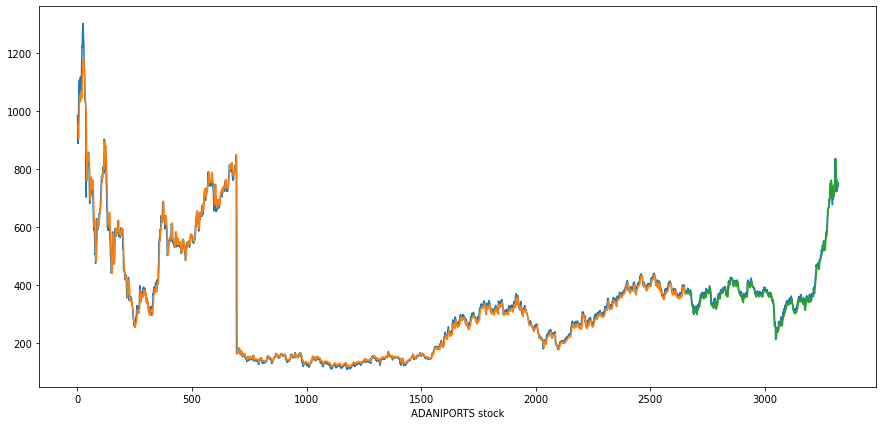

Epoch 1/10
42/42 [==============================] - 9s 43ms/step - loss: 0.0853 - val_loss: 0.0044
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0179 - val_loss: 3.0818e-04
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 8.5809e-04
Epoch 4/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 6.6641e-04
Epoch 5/10
42/42 [==============================] - 1s 21ms/step - loss: 0.0011 - val_loss: 3.4388e-04
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 5.2357e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 3.9177e-04
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 2.9767e-04
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 2.7635e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of s

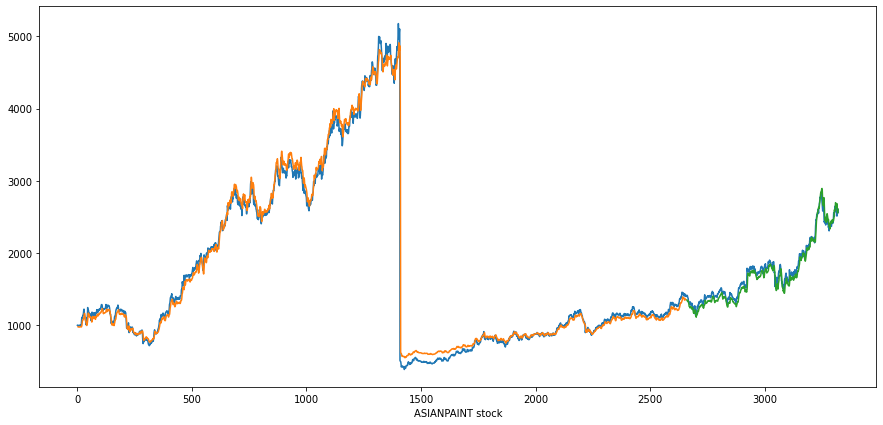

Epoch 1/10
42/42 [==============================] - 9s 42ms/step - loss: 0.0803 - val_loss: 0.0275
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0149 - val_loss: 0.0054
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0023 - val_loss: 4.6876e-04
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 4.7164e-04
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 3.2998e-04
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0012 - val_loss: 3.2565e-04
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 2.5975e-04
Epoch 8/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 2.3531e-04
Epoch 9/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 3.4309e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklea

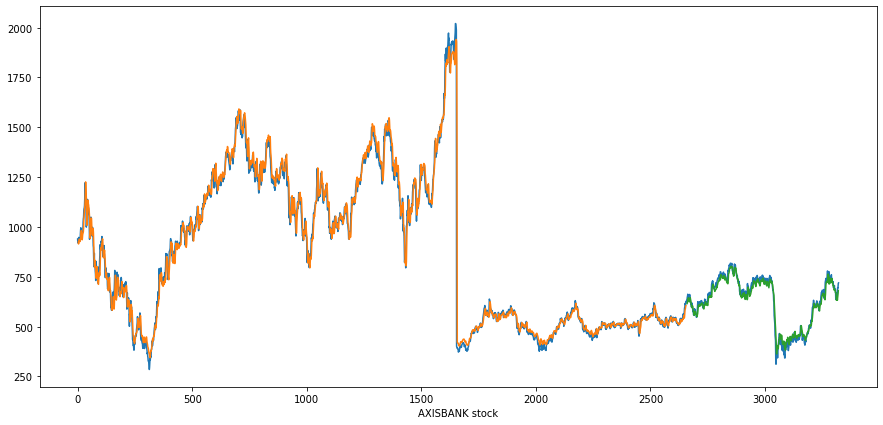

Epoch 1/10
42/42 [==============================] - 9s 68ms/step - loss: 0.1209 - val_loss: 0.0618
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0162 - val_loss: 0.0134
Epoch 3/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0060 - val_loss: 7.6037e-04
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/10
42/42 [==============================] - 1s 15ms/step - loss: 9.6637e-04 - val_loss: 7.4053e-04
Epoch 6/10
42/42 [==============================] - 1s 16ms/step - loss: 7.9462e-04 - val_loss: 5.4442e-04
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 6.5083e-04 - val_loss: 5.2833e-04
Epoch 8/10
42/42 [==============================] - 1s 15ms/step - loss: 5.2220e-04 - val_loss: 3.8329e-04
Epoch 9/10
42/42 [==============================] - 1s 15ms/step - loss: 4.2952e-04 - val_loss: 4.1972e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step


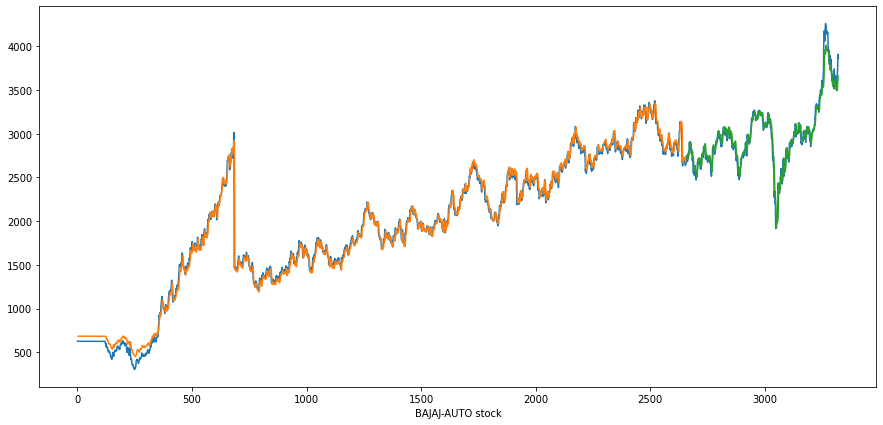

Epoch 1/10
42/42 [==============================] - 8s 63ms/step - loss: 0.0216 - val_loss: 0.1611
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0050 - val_loss: 0.0187
Epoch 3/10
42/42 [==============================] - 1s 17ms/step - loss: 1.9562e-04 - val_loss: 0.0022
Epoch 4/10
42/42 [==============================] - 1s 15ms/step - loss: 1.0757e-04 - val_loss: 9.4122e-04
Epoch 5/10
42/42 [==============================] - 1s 14ms/step - loss: 7.8672e-05 - val_loss: 6.9290e-04
Epoch 6/10
42/42 [==============================] - 1s 15ms/step - loss: 5.8875e-05 - val_loss: 9.9678e-04
Epoch 7/10
42/42 [==============================] - 1s 15ms/step - loss: 4.8359e-05 - val_loss: 0.0014
Epoch 8/10
42/42 [==============================] - 1s 16ms/step - loss: 4.1174e-05 - val_loss: 0.0019
Epoch 9/10
42/42 [==============================] - 0s 12ms/step - loss: 3.8591e-05 - val_loss: 0.0023
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Resu

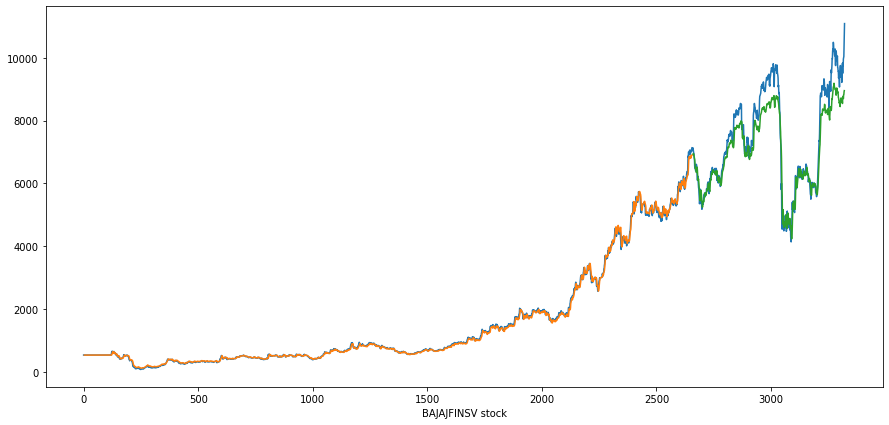

Epoch 1/10
42/42 [==============================] - 9s 68ms/step - loss: 0.0336 - val_loss: 0.0097
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0090 - val_loss: 9.7991e-04
Epoch 3/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 2.4239e-04
Epoch 4/10
42/42 [==============================] - 1s 15ms/step - loss: 8.6188e-04 - val_loss: 4.5226e-04
Epoch 5/10
42/42 [==============================] - 1s 17ms/step - loss: 8.2538e-04 - val_loss: 1.8069e-04
Epoch 6/10
42/42 [==============================] - 1s 17ms/step - loss: 7.6629e-04 - val_loss: 2.1663e-04
Epoch 7/10
42/42 [==============================] - 1s 14ms/step - loss: 7.5625e-04 - val_loss: 1.9455e-04
Epoch 8/10
42/42 [==============================] - 1s 13ms/step - loss: 7.5360e-04 - val_loss: 1.9820e-04
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 7.7766e-04 - val_loss: 1.6170e-04
Epoch 10/10
21/21 [==============================] - 

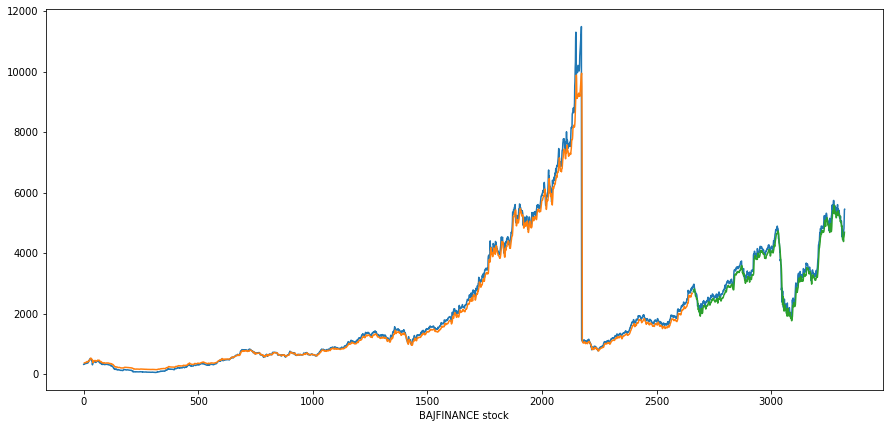

Epoch 1/10
42/42 [==============================] - 9s 66ms/step - loss: 0.0526 - val_loss: 0.0096
Epoch 2/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0113 - val_loss: 0.0019
Epoch 3/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 9.2765e-04 - val_loss: 6.8249e-04
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 8.2578e-04 - val_loss: 6.0202e-04
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 7.5208e-04 - val_loss: 5.4048e-04
Epoch 7/10
42/42 [==============================] - 0s 10ms/step - loss: 7.1163e-04 - val_loss: 5.2655e-04
Epoch 8/10
42/42 [==============================] - 0s 10ms/step - loss: 6.7371e-04 - val_loss: 4.6860e-04
Epoch 9/10
42/42 [==============================] - 0s 10ms/step - loss: 6.8698e-04 - val_loss: 3.5437e-04
Epoch 10/10
21/21 [==============================] - 0s 2ms/s

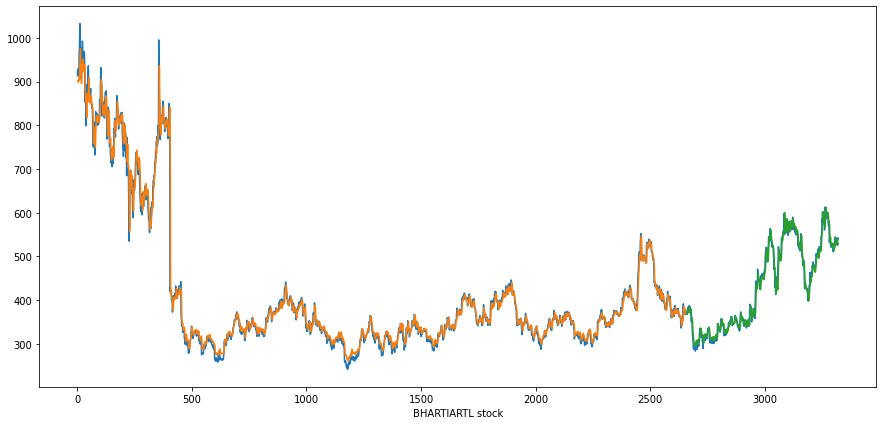

Epoch 1/10
42/42 [==============================] - 8s 41ms/step - loss: 0.1094 - val_loss: 0.0102
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0180 - val_loss: 0.0150
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0051 - val_loss: 0.0017
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0014 - val_loss: 8.3768e-04
Epoch 5/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0013 - val_loss: 6.6288e-04
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0012 - val_loss: 5.6789e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 4.5739e-04
Epoch 8/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0010 - val_loss: 4.0418e-04
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 9.7785e-04 - val_loss: 3.6390e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklea

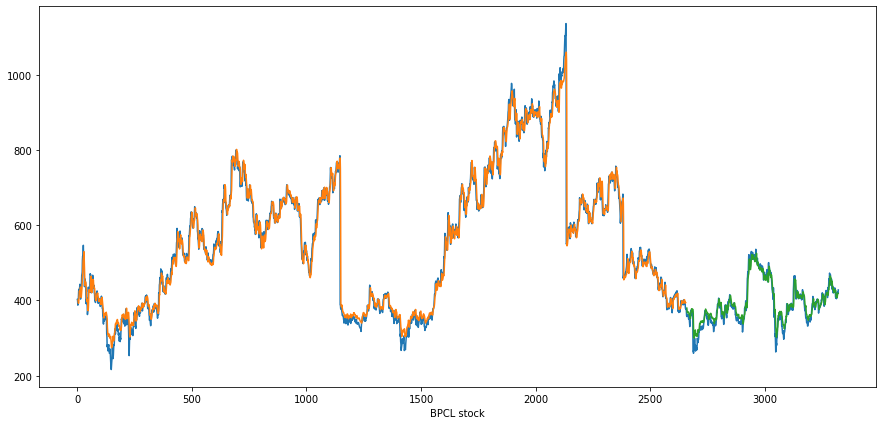

Epoch 1/10
42/42 [==============================] - 9s 41ms/step - loss: 0.0570 - val_loss: 0.0189
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0121 - val_loss: 0.0014
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 7.2709e-04 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 4.2898e-04 - val_loss: 9.9543e-04
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 3.0819e-04 - val_loss: 9.3597e-04
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 2.5780e-04 - val_loss: 9.2212e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 2.3981e-04 - val_loss: 9.4655e-04
Epoch 8/10
42/42 [==============================] - 0s 10ms/step - loss: 2.3282e-04 - val_loss: 0.0011
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 2.2049e-04 - val_loss: 9.0722e-04
Epoch 10/10
21/21 [==============================] - 0s 2ms/s

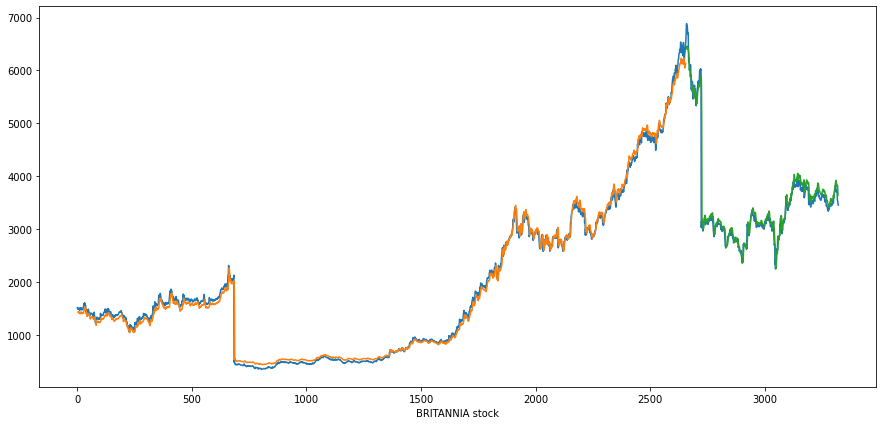

Epoch 1/10
42/42 [==============================] - 7s 41ms/step - loss: 0.0785 - val_loss: 0.0369
Epoch 2/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0151 - val_loss: 0.0078
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 4/10
42/42 [==============================] - 1s 15ms/step - loss: 6.2536e-04 - val_loss: 8.5559e-04
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 5.2107e-04 - val_loss: 6.6617e-04
Epoch 6/10
42/42 [==============================] - 1s 15ms/step - loss: 4.3321e-04 - val_loss: 5.0486e-04
Epoch 7/10
42/42 [==============================] - 1s 15ms/step - loss: 3.5606e-04 - val_loss: 4.9523e-04
Epoch 8/10
42/42 [==============================] - 1s 15ms/step - loss: 2.9446e-04 - val_loss: 5.9854e-04
Epoch 9/10
42/42 [==============================] - 1s 15ms/step - loss: 2.5074e-04 - val_loss: 7.0085e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/s

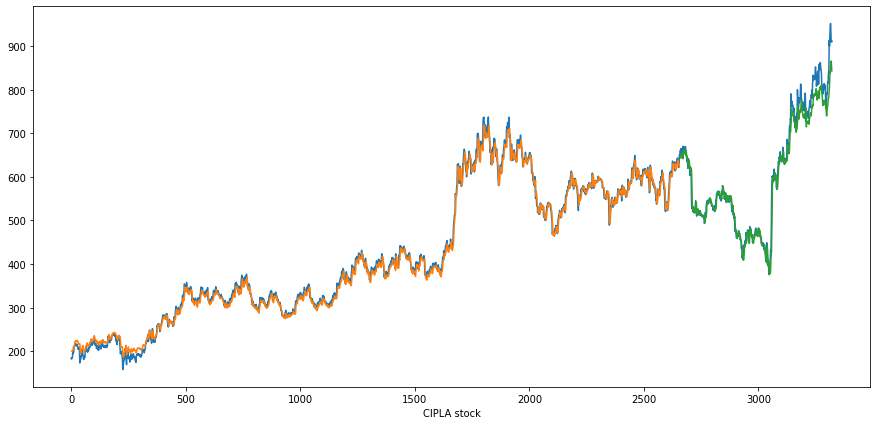

Epoch 1/10
42/42 [==============================] - 9s 53ms/step - loss: 0.2217 - val_loss: 0.0534
Epoch 2/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0068 - val_loss: 0.0605
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0036 - val_loss: 0.0527
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0030 - val_loss: 0.0443
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0364
Epoch 6/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0291
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0232
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 9.5988e-04 - val_loss: 0.0180
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 6.8933e-04 - val_loss: 0.0137
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklearn.metrics:
MAE: 217

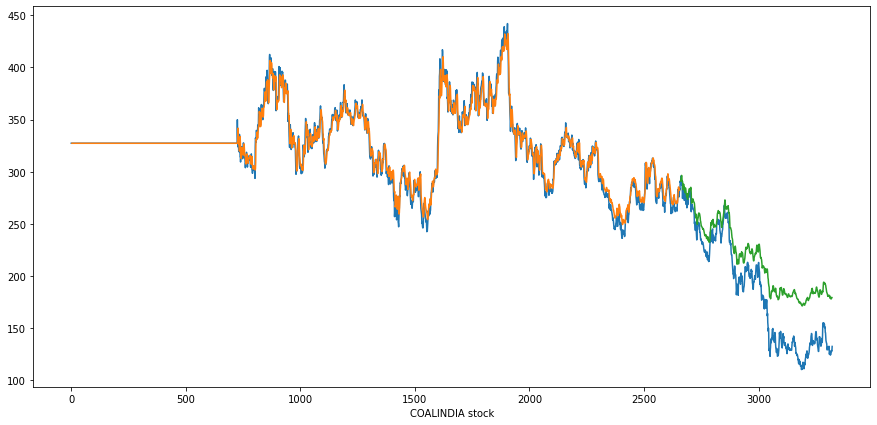

Epoch 1/10
42/42 [==============================] - 9s 59ms/step - loss: 0.0762 - val_loss: 0.0534
Epoch 2/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0135 - val_loss: 0.0132
Epoch 3/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0026 - val_loss: 7.0194e-04
Epoch 4/10
42/42 [==============================] - 1s 12ms/step - loss: 6.4957e-04 - val_loss: 5.4119e-04
Epoch 5/10
42/42 [==============================] - 1s 12ms/step - loss: 4.8058e-04 - val_loss: 4.1873e-04
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 3.6374e-04 - val_loss: 6.8190e-04
Epoch 7/10
42/42 [==============================] - 0s 12ms/step - loss: 2.8449e-04 - val_loss: 0.0010
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 2.3961e-04 - val_loss: 0.0014
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 2.1845e-04 - val_loss: 0.0015
Epoch 10/10
21/21 [==============================] - 0s 5ms/step
Resu

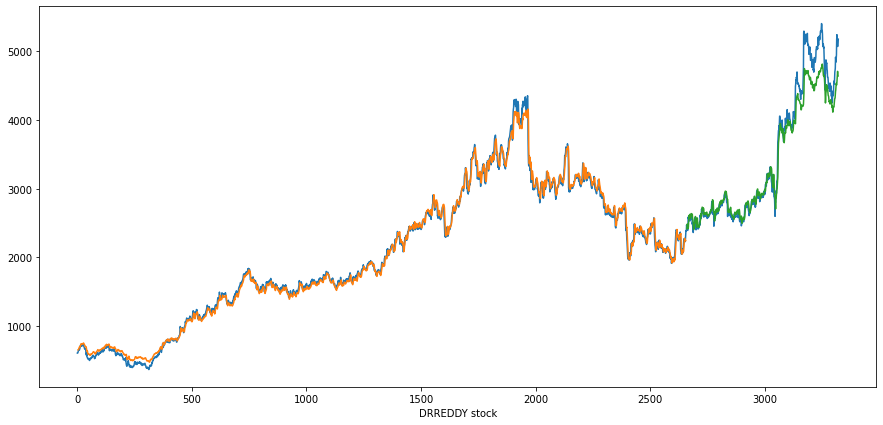

Epoch 1/10
42/42 [==============================] - 7s 42ms/step - loss: 0.1126 - val_loss: 0.0272
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0185 - val_loss: 0.0021
Epoch 3/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 0.0018
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 6.4104e-04 - val_loss: 0.0017
Epoch 5/10
42/42 [==============================] - 0s 12ms/step - loss: 4.1023e-04 - val_loss: 0.0016
Epoch 6/10
42/42 [==============================] - 0s 12ms/step - loss: 3.2087e-04 - val_loss: 0.0017
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 2.9374e-04 - val_loss: 0.0017
Epoch 8/10
42/42 [==============================] - 1s 16ms/step - loss: 2.8323e-04 - val_loss: 0.0017
Epoch 9/10
42/42 [==============================] - 1s 14ms/step - loss: 2.7434e-04 - val_loss: 0.0017
Epoch 10/10
21/21 [==============================] - 0s 6ms/step
Results of sklearn.m

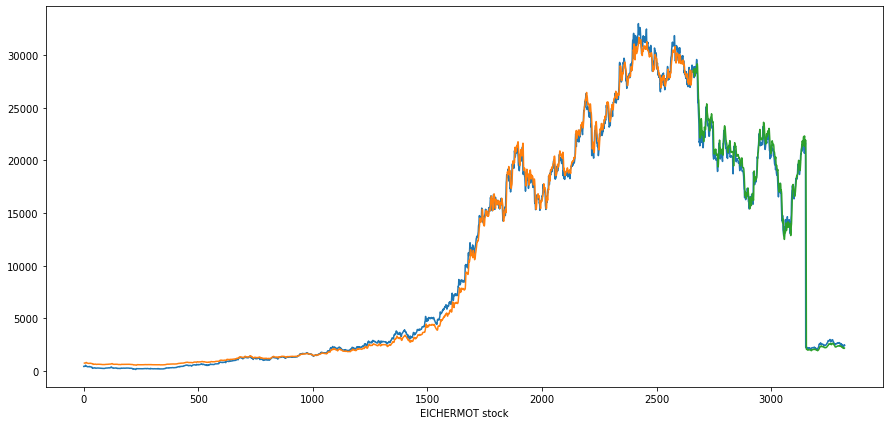

Epoch 1/10
42/42 [==============================] - 8s 42ms/step - loss: 0.2670 - val_loss: 0.0424
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0122 - val_loss: 0.0717
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0072 - val_loss: 0.0644
Epoch 4/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0053 - val_loss: 0.0491
Epoch 5/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0036 - val_loss: 0.0355
Epoch 6/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0021 - val_loss: 0.0235
Epoch 7/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 0.0159
Epoch 8/10
42/42 [==============================] - 1s 14ms/step - loss: 8.2943e-04 - val_loss: 0.0123
Epoch 9/10
42/42 [==============================] - 1s 15ms/step - loss: 8.0191e-04 - val_loss: 0.0112
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklearn.metrics:
MAE: 227

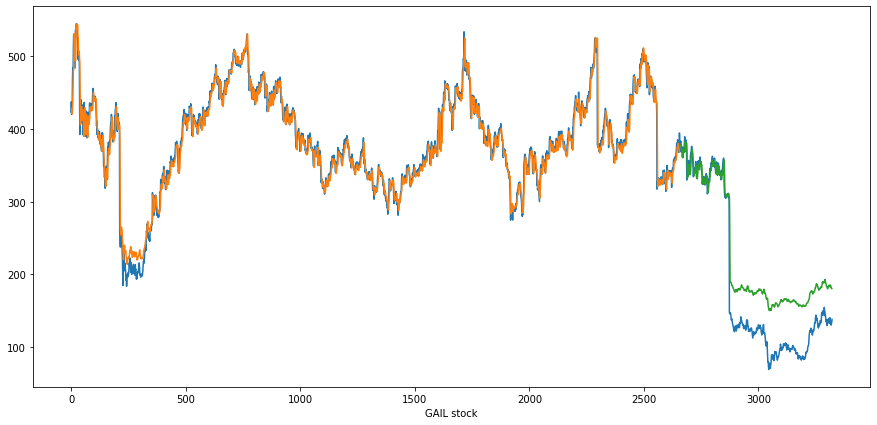

Epoch 1/10
42/42 [==============================] - 8s 63ms/step - loss: 0.0916 - val_loss: 0.0675
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0111 - val_loss: 0.0251
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0033 - val_loss: 0.0065
Epoch 4/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0013 - val_loss: 0.0029
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0011 - val_loss: 0.0026
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 9.2212e-04 - val_loss: 0.0016
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 8.6429e-04 - val_loss: 0.0012
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 8.2622e-04 - val_loss: 0.0011
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.metrics:
MAE:

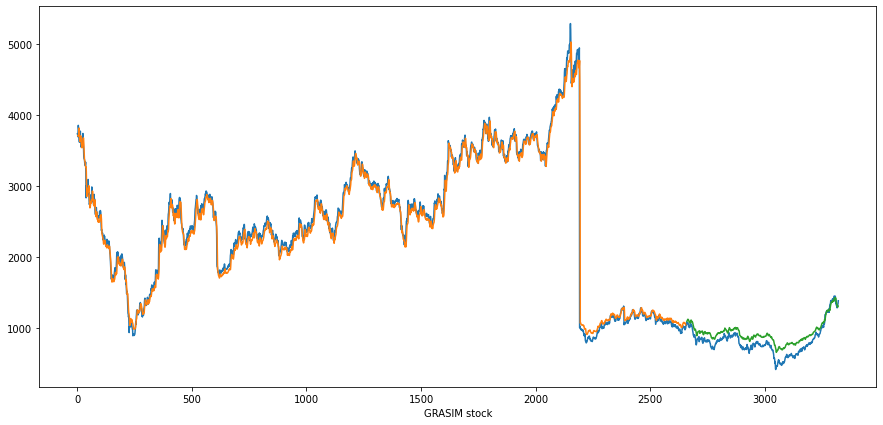

Epoch 1/10
42/42 [==============================] - 8s 40ms/step - loss: 0.0627 - val_loss: 0.0048
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0094 - val_loss: 7.8300e-04
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0015 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 0s 10ms/step - loss: 0.0011 - val_loss: 4.8616e-04
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 7.4297e-04 - val_loss: 5.3710e-04
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 5.6322e-04 - val_loss: 4.3631e-04
Epoch 7/10
42/42 [==============================] - 1s 14ms/step - loss: 4.5048e-04 - val_loss: 3.9832e-04
Epoch 8/10
42/42 [==============================] - 1s 15ms/step - loss: 3.9446e-04 - val_loss: 3.9822e-04
Epoch 9/10
42/42 [==============================] - 1s 15ms/step - loss: 3.7487e-04 - val_loss: 4.1096e-04
Epoch 10/10
21/21 [==============================] - 0s 5ms/s

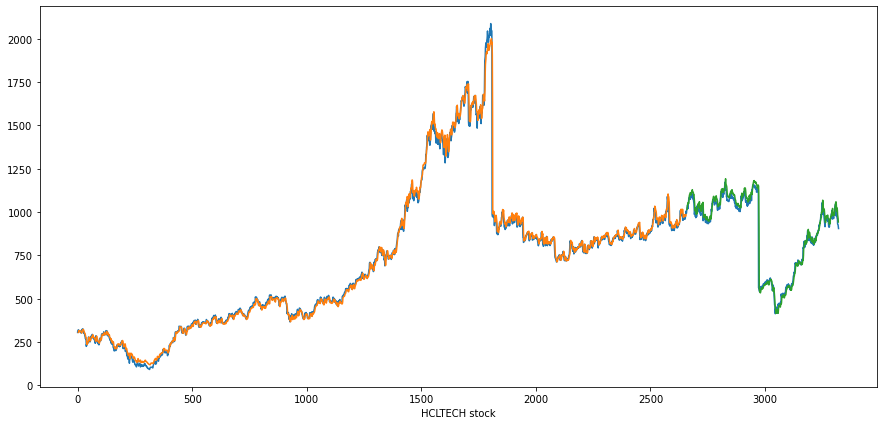

Epoch 1/10
42/42 [==============================] - 9s 41ms/step - loss: 0.0904 - val_loss: 0.0091
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0156 - val_loss: 0.0011
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 4/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0020 - val_loss: 7.3155e-04
Epoch 5/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0016 - val_loss: 8.7037e-04
Epoch 6/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0014 - val_loss: 6.0146e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 6.1377e-04
Epoch 8/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0013 - val_loss: 7.6716e-04
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0013 - val_loss: 5.7723e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.m

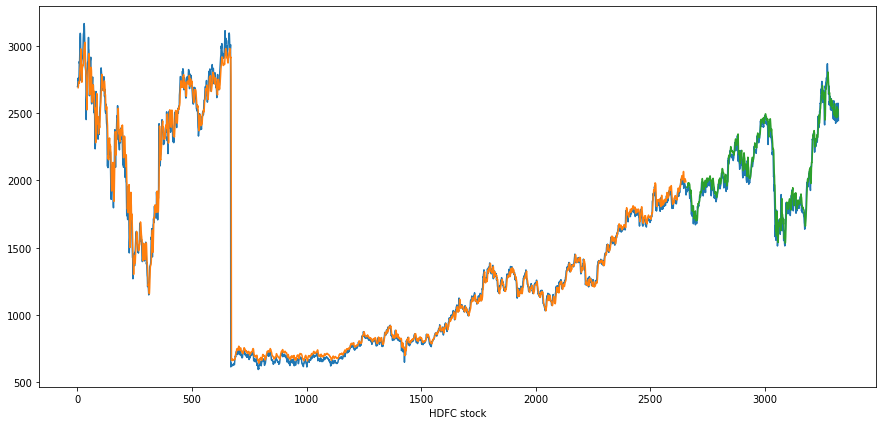

Epoch 1/10
42/42 [==============================] - 7s 44ms/step - loss: 0.1188 - val_loss: 0.0289
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0195 - val_loss: 0.0033
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0030 - val_loss: 0.0017
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0016 - val_loss: 0.0014
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 6/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 7/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 8/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.metrics:
MAE: 1584.851125

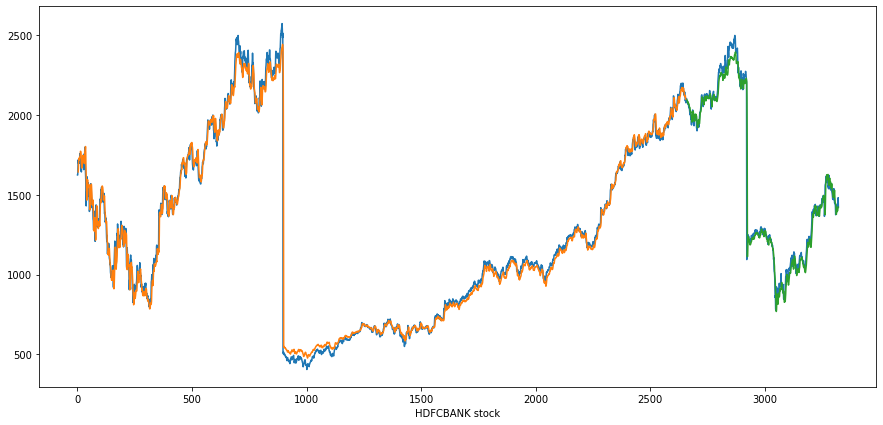

Epoch 1/10
42/42 [==============================] - 9s 66ms/step - loss: 0.1535 - val_loss: 0.0160
Epoch 2/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0194 - val_loss: 0.0028
Epoch 3/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0046 - val_loss: 6.4791e-04
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0013 - val_loss: 6.8964e-04
Epoch 5/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0010 - val_loss: 6.4015e-04
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 8.0787e-04 - val_loss: 6.2047e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 6.3521e-04 - val_loss: 6.6585e-04
Epoch 8/10
42/42 [==============================] - 0s 12ms/step - loss: 5.1890e-04 - val_loss: 5.7025e-04
Epoch 9/10
42/42 [==============================] - 0s 12ms/step - loss: 4.3840e-04 - val_loss: 6.5865e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step


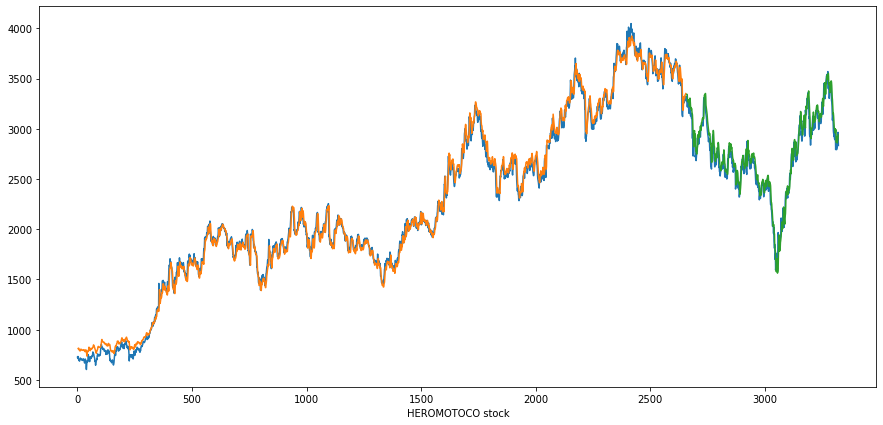

Epoch 1/10
42/42 [==============================] - 9s 55ms/step - loss: 0.0537 - val_loss: 0.0122
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0099 - val_loss: 0.0063
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 6.5057e-04 - val_loss: 0.0011
Epoch 5/10
42/42 [==============================] - 1s 12ms/step - loss: 5.6971e-04 - val_loss: 8.1558e-04
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 5.0483e-04 - val_loss: 6.3787e-04
Epoch 7/10
42/42 [==============================] - 0s 12ms/step - loss: 4.4725e-04 - val_loss: 5.1763e-04
Epoch 8/10
42/42 [==============================] - 0s 12ms/step - loss: 4.0203e-04 - val_loss: 4.9614e-04
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 3.7459e-04 - val_loss: 4.9139e-04
Epoch 10/10
21/21 [==============================] - 0s 6ms/step


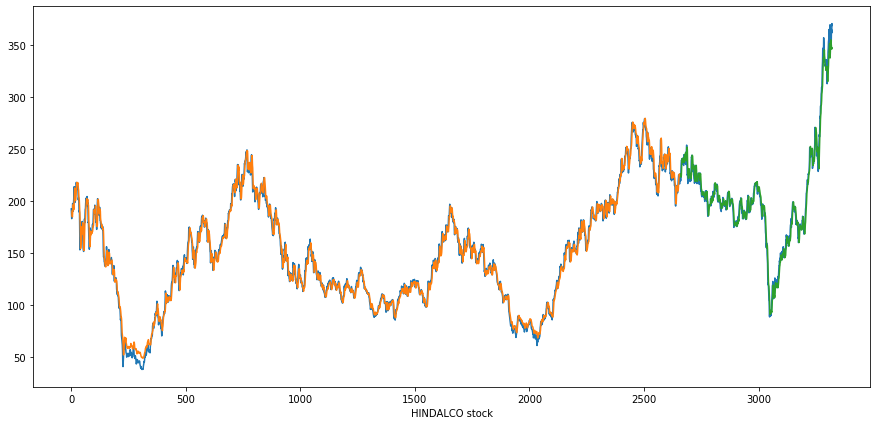

Epoch 1/10
42/42 [==============================] - 8s 46ms/step - loss: 0.0320 - val_loss: 0.1530
Epoch 2/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0075 - val_loss: 0.0088
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 5.9585e-04 - val_loss: 0.0036
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 2.8414e-04 - val_loss: 5.7064e-04
Epoch 5/10
42/42 [==============================] - 0s 12ms/step - loss: 1.4117e-04 - val_loss: 0.0013
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 7.8625e-05 - val_loss: 0.0035
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 6.2448e-05 - val_loss: 0.0048
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 5.7786e-05 - val_loss: 0.0044
Epoch 9/10
42/42 [==============================] - 1s 16ms/step - loss: 5.8302e-05 - val_loss: 0.0047
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of s

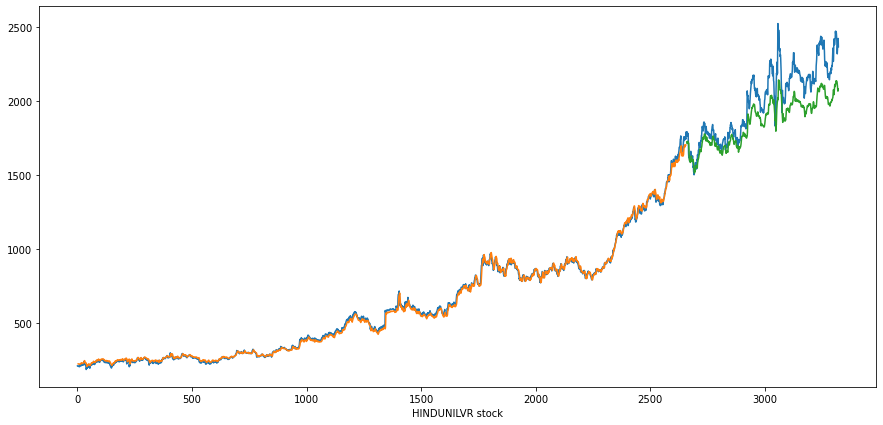

Epoch 1/10
42/42 [==============================] - 8s 61ms/step - loss: 0.0959 - val_loss: 0.0314
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0171 - val_loss: 0.0052
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0025 - val_loss: 3.1243e-04
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 2.4076e-04
Epoch 5/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0013 - val_loss: 2.1868e-04
Epoch 6/10
42/42 [==============================] - 1s 19ms/step - loss: 0.0011 - val_loss: 2.5423e-04
Epoch 7/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0011 - val_loss: 2.3273e-04
Epoch 8/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 2.3638e-04
Epoch 9/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0010 - val_loss: 2.6012e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklea

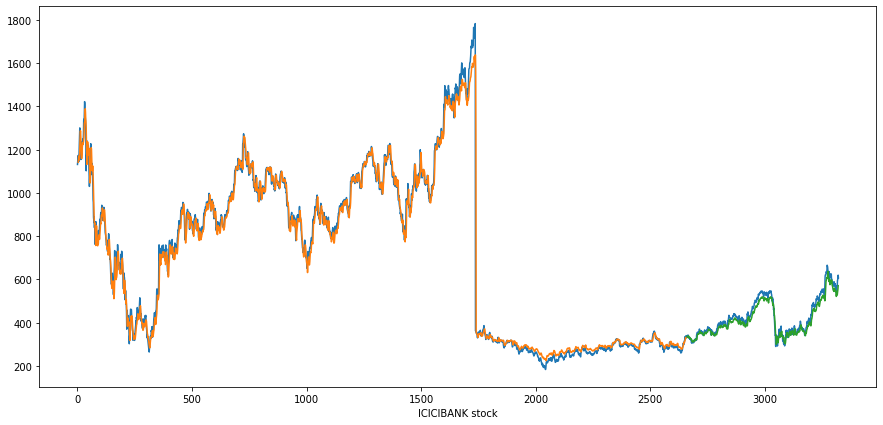

Epoch 1/10
42/42 [==============================] - 8s 64ms/step - loss: 0.0939 - val_loss: 0.0383
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0172 - val_loss: 0.0017
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 4/10
42/42 [==============================] - 1s 14ms/step - loss: 7.7345e-04 - val_loss: 0.0010
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 4.1242e-04 - val_loss: 8.8177e-04
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 2.2026e-04 - val_loss: 7.8385e-04
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 1.5283e-04 - val_loss: 7.8494e-04
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 1.3459e-04 - val_loss: 8.0758e-04
Epoch 9/10
42/42 [==============================] - 0s 12ms/step - loss: 1.2717e-04 - val_loss: 7.9020e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/step


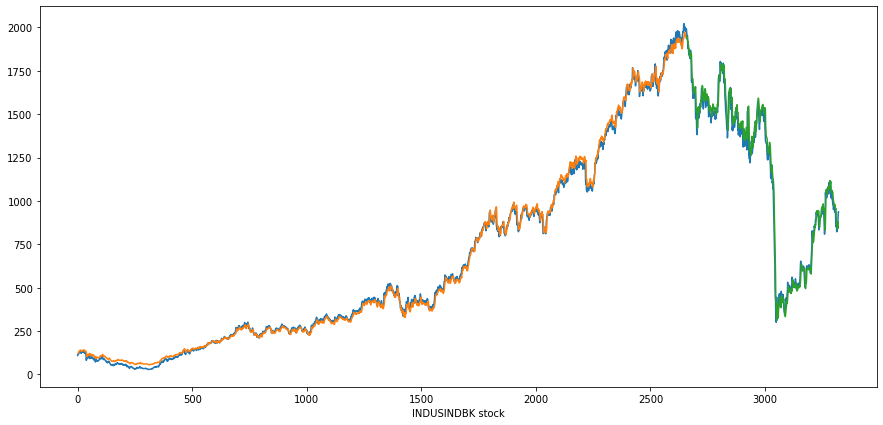

Epoch 1/10
42/42 [==============================] - 8s 42ms/step - loss: 0.1452 - val_loss: 0.0248
Epoch 2/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0248 - val_loss: 0.0365
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0063 - val_loss: 0.0077
Epoch 4/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0013 - val_loss: 0.0034
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 0.0033
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 8.6832e-04 - val_loss: 0.0026
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 7.5791e-04 - val_loss: 0.0022
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 7.0368e-04 - val_loss: 0.0016
Epoch 9/10
42/42 [==============================] - 0s 11ms/step - loss: 6.9309e-04 - val_loss: 0.0016
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklearn.metrics:


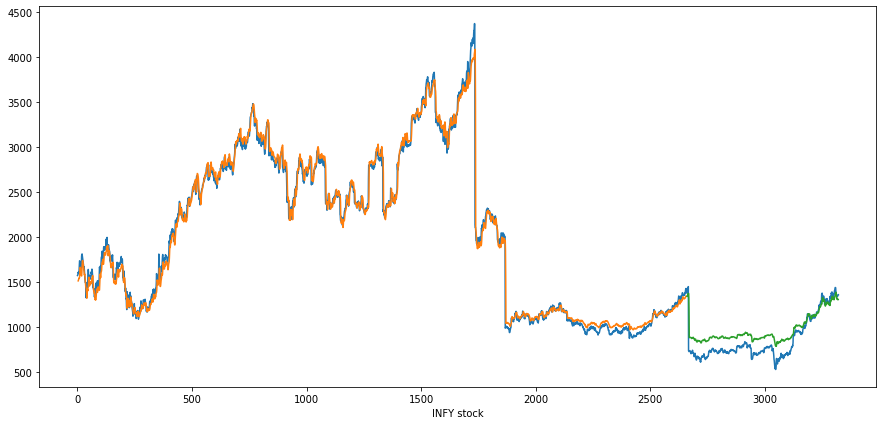

Epoch 1/10
42/42 [==============================] - 9s 42ms/step - loss: 0.0825 - val_loss: 0.0678
Epoch 2/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0099 - val_loss: 0.0454
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0051 - val_loss: 0.0221
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 0.0085
Epoch 5/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0010 - val_loss: 0.0067
Epoch 6/10
42/42 [==============================] - 1s 12ms/step - loss: 9.7682e-04 - val_loss: 0.0061
Epoch 7/10
42/42 [==============================] - 0s 11ms/step - loss: 9.3851e-04 - val_loss: 0.0053
Epoch 8/10
42/42 [==============================] - 0s 11ms/step - loss: 9.1530e-04 - val_loss: 0.0048
Epoch 9/10
42/42 [==============================] - 1s 12ms/step - loss: 8.7957e-04 - val_loss: 0.0038
Epoch 10/10
21/21 [==============================] - 0s 6ms/step
Results of sklearn.metrics:


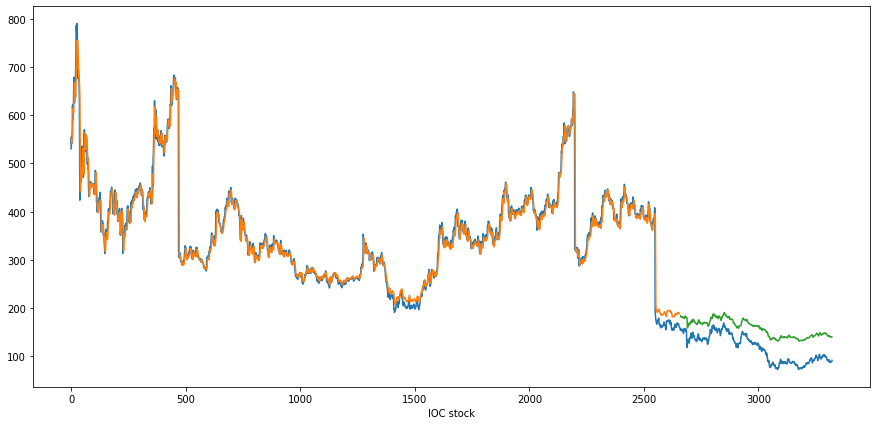

Epoch 1/10
42/42 [==============================] - 7s 42ms/step - loss: 0.1710 - val_loss: 0.0146
Epoch 2/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0200 - val_loss: 0.0121
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0064 - val_loss: 0.0026
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 5/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 6/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0017 - val_loss: 9.8686e-04
Epoch 7/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0016 - val_loss: 8.6718e-04
Epoch 8/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0015 - val_loss: 7.6318e-04
Epoch 9/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0014 - val_loss: 6.9755e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.metrics:


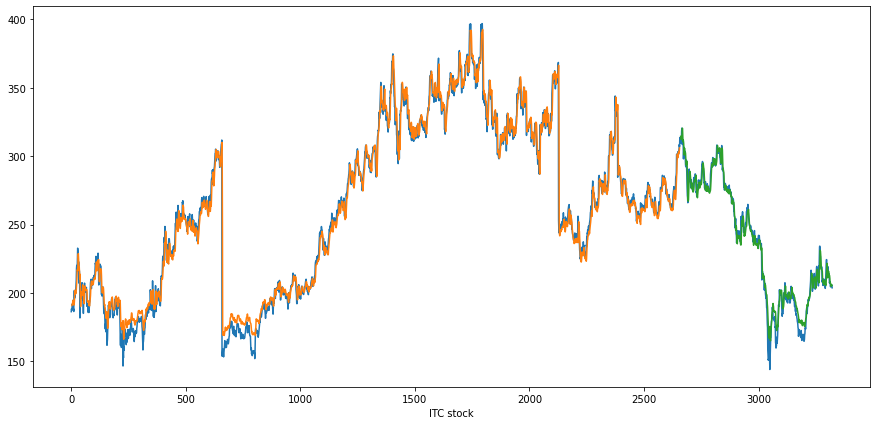

Epoch 1/10
42/42 [==============================] - 8s 43ms/step - loss: 0.1065 - val_loss: 0.0707
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0194 - val_loss: 0.0290
Epoch 3/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0046 - val_loss: 0.0037
Epoch 4/10
42/42 [==============================] - 0s 11ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 5/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 6/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0014 - val_loss: 8.5572e-04
Epoch 7/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 4.0537e-04
Epoch 8/10
42/42 [==============================] - 1s 21ms/step - loss: 0.0011 - val_loss: 2.3706e-04
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 1.8362e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklearn.metrics:


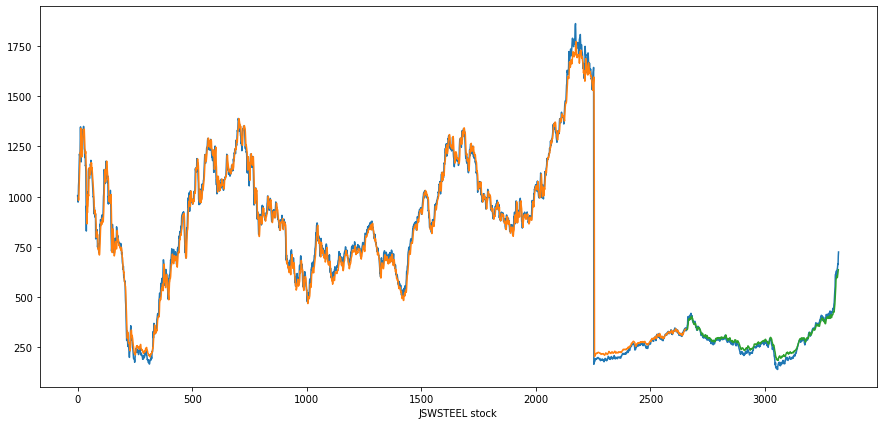

Epoch 1/10
42/42 [==============================] - 7s 56ms/step - loss: 0.0531 - val_loss: 0.0679
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0096 - val_loss: 0.0295
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0027 - val_loss: 0.0013
Epoch 4/10
42/42 [==============================] - 1s 18ms/step - loss: 7.3413e-04 - val_loss: 0.0023
Epoch 5/10
42/42 [==============================] - 1s 15ms/step - loss: 6.6185e-04 - val_loss: 0.0015
Epoch 6/10
42/42 [==============================] - 1s 19ms/step - loss: 5.8919e-04 - val_loss: 6.7553e-04
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 5.3839e-04 - val_loss: 6.8766e-04
Epoch 8/10
42/42 [==============================] - 1s 16ms/step - loss: 4.8672e-04 - val_loss: 8.0720e-04
Epoch 9/10
42/42 [==============================] - 1s 17ms/step - loss: 4.5627e-04 - val_loss: 0.0011
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results 

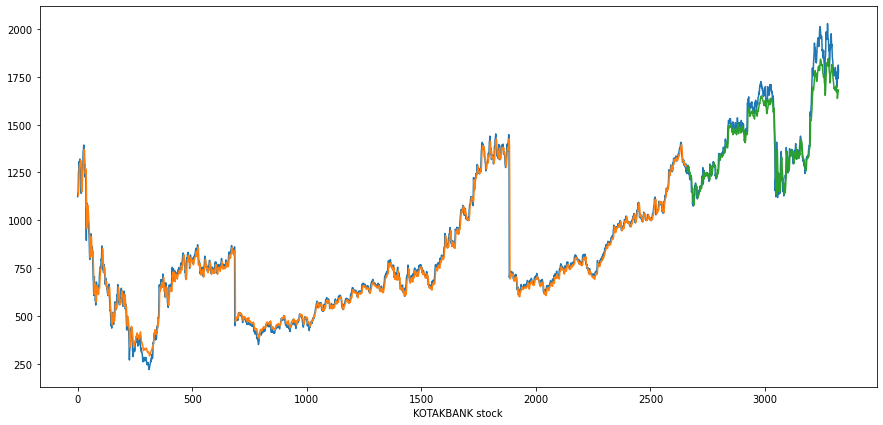

Epoch 1/10
42/42 [==============================] - 7s 49ms/step - loss: 0.0477 - val_loss: 0.0082
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0108 - val_loss: 0.0054
Epoch 3/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0025 - val_loss: 4.2592e-04
Epoch 4/10
42/42 [==============================] - 1s 18ms/step - loss: 6.6428e-04 - val_loss: 4.5492e-04
Epoch 5/10
42/42 [==============================] - 1s 20ms/step - loss: 5.8156e-04 - val_loss: 2.9036e-04
Epoch 6/10
42/42 [==============================] - 1s 18ms/step - loss: 5.2768e-04 - val_loss: 2.3593e-04
Epoch 7/10
42/42 [==============================] - 1s 18ms/step - loss: 4.9720e-04 - val_loss: 1.9934e-04
Epoch 8/10
42/42 [==============================] - 1s 18ms/step - loss: 4.7725e-04 - val_loss: 1.7477e-04
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 4.6199e-04 - val_loss: 1.5249e-04
Epoch 10/10
21/21 [==============================] - 0s 4

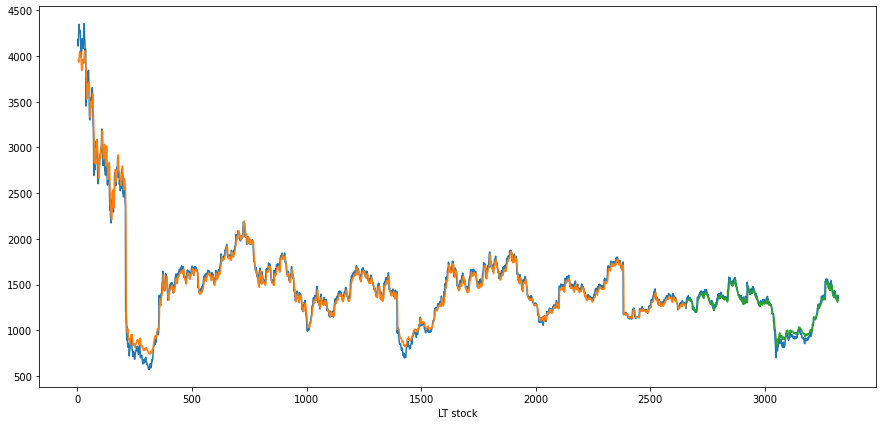

Epoch 1/10
42/42 [==============================] - 8s 43ms/step - loss: 0.1317 - val_loss: 0.0410
Epoch 2/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0125 - val_loss: 0.0132
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0041 - val_loss: 0.0029
Epoch 4/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0015 - val_loss: 9.3919e-04
Epoch 5/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 8.1705e-04
Epoch 6/10
42/42 [==============================] - 1s 20ms/step - loss: 0.0012 - val_loss: 7.7547e-04
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 0.0012 - val_loss: 7.0890e-04
Epoch 8/10
42/42 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 6.3894e-04
Epoch 9/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0011 - val_loss: 5.8177e-04
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklearn.m

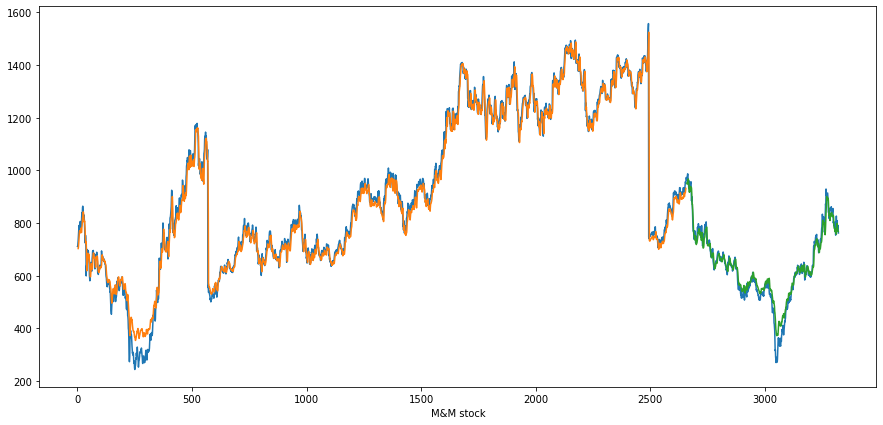

Epoch 1/10
42/42 [==============================] - 7s 43ms/step - loss: 0.0779 - val_loss: 0.0345
Epoch 2/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0126 - val_loss: 0.0011
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 7.9425e-04 - val_loss: 7.1065e-04
Epoch 4/10
42/42 [==============================] - 1s 18ms/step - loss: 3.7516e-04 - val_loss: 7.3482e-04
Epoch 5/10
42/42 [==============================] - 1s 19ms/step - loss: 2.0635e-04 - val_loss: 6.8293e-04
Epoch 6/10
42/42 [==============================] - 1s 19ms/step - loss: 1.4705e-04 - val_loss: 7.6850e-04
Epoch 7/10
42/42 [==============================] - 1s 18ms/step - loss: 1.3422e-04 - val_loss: 8.0727e-04
Epoch 8/10
42/42 [==============================] - 1s 19ms/step - loss: 1.2839e-04 - val_loss: 9.1503e-04
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 1.2339e-04 - val_loss: 9.8667e-04
Epoch 10/10
21/21 [==============================] - 

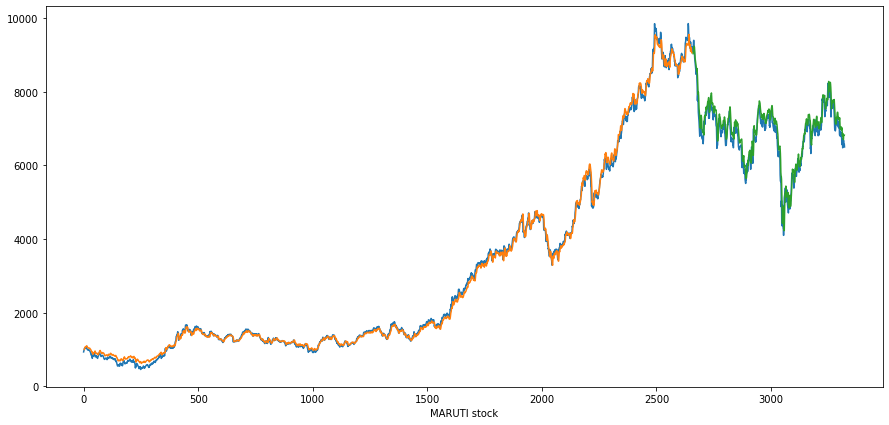

Epoch 1/10
42/42 [==============================] - 7s 52ms/step - loss: 0.0171 - val_loss: 0.2059
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0062 - val_loss: 0.0091
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 4.3976e-04 - val_loss: 0.0041
Epoch 4/10
42/42 [==============================] - 1s 20ms/step - loss: 1.5946e-04 - val_loss: 0.0010
Epoch 5/10
42/42 [==============================] - 1s 17ms/step - loss: 9.5217e-05 - val_loss: 0.0027
Epoch 6/10
42/42 [==============================] - 1s 19ms/step - loss: 6.8316e-05 - val_loss: 0.0062
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 5.7062e-05 - val_loss: 0.0089
Epoch 8/10
42/42 [==============================] - 1s 16ms/step - loss: 5.4340e-05 - val_loss: 0.0103
Epoch 9/10
42/42 [==============================] - 1s 12ms/step - loss: 5.3553e-05 - val_loss: 0.0118
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklea

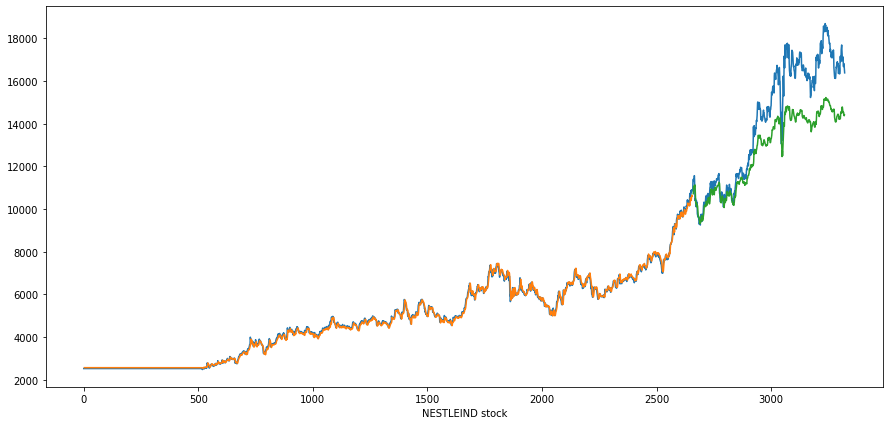

Epoch 1/10
42/42 [==============================] - 10s 78ms/step - loss: 0.1214 - val_loss: 0.0144
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0098 - val_loss: 0.0267
Epoch 3/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0061 - val_loss: 0.0217
Epoch 4/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0032 - val_loss: 0.0105
Epoch 5/10
42/42 [==============================] - 1s 17ms/step - loss: 9.4350e-04 - val_loss: 0.0040
Epoch 6/10
42/42 [==============================] - 1s 15ms/step - loss: 5.3855e-04 - val_loss: 0.0033
Epoch 7/10
42/42 [==============================] - 1s 15ms/step - loss: 5.2877e-04 - val_loss: 0.0033
Epoch 8/10
42/42 [==============================] - 1s 15ms/step - loss: 5.2555e-04 - val_loss: 0.0033
Epoch 9/10
42/42 [==============================] - 1s 20ms/step - loss: 5.2432e-04 - val_loss: 0.0032
Epoch 10/10
21/21 [==============================] - 0s 3ms/step
Results of sklearn.metr

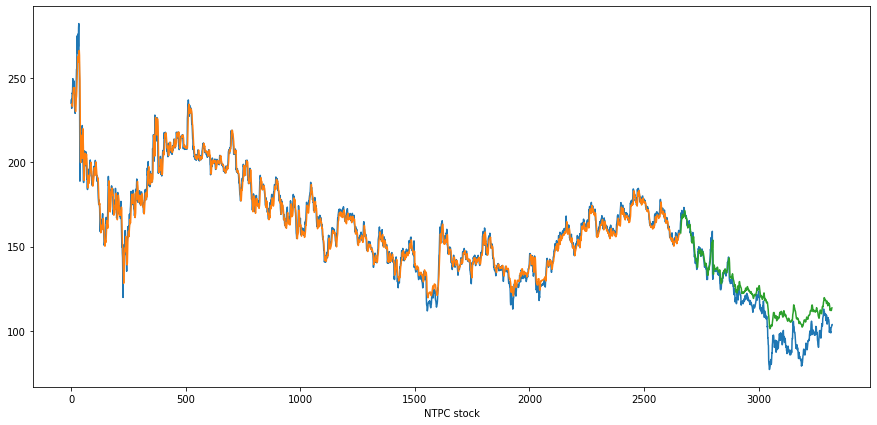

Epoch 1/10
42/42 [==============================] - 9s 53ms/step - loss: 0.1073 - val_loss: 0.0454
Epoch 2/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0218 - val_loss: 0.0126
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 4/10
42/42 [==============================] - 1s 12ms/step - loss: 8.4416e-04 - val_loss: 0.0025
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 8.1030e-04 - val_loss: 0.0022
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 7.8789e-04 - val_loss: 0.0022
Epoch 7/10
42/42 [==============================] - 1s 12ms/step - loss: 7.5894e-04 - val_loss: 0.0018
Epoch 8/10
42/42 [==============================] - 1s 13ms/step - loss: 7.5322e-04 - val_loss: 0.0018
Epoch 9/10
42/42 [==============================] - 1s 13ms/step - loss: 7.3367e-04 - val_loss: 0.0016
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.m

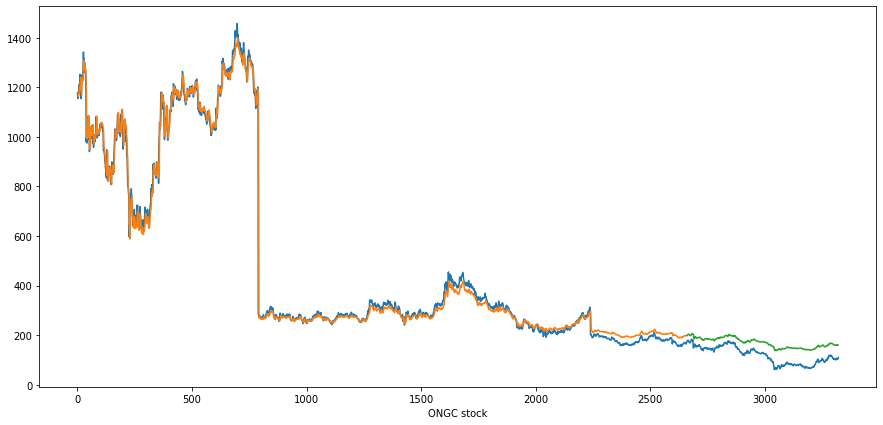

Epoch 1/10
42/42 [==============================] - 9s 44ms/step - loss: 0.1251 - val_loss: 0.0873
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0188 - val_loss: 0.0203
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0043 - val_loss: 7.3226e-04
Epoch 4/10
42/42 [==============================] - 1s 12ms/step - loss: 5.6071e-04 - val_loss: 8.4882e-04
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 5.0086e-04 - val_loss: 7.4409e-04
Epoch 6/10
42/42 [==============================] - 1s 12ms/step - loss: 4.6626e-04 - val_loss: 7.1953e-04
Epoch 7/10
42/42 [==============================] - 1s 12ms/step - loss: 4.3623e-04 - val_loss: 6.9490e-04
Epoch 8/10
42/42 [==============================] - 1s 12ms/step - loss: 4.1030e-04 - val_loss: 7.6540e-04
Epoch 9/10
42/42 [==============================] - 1s 13ms/step - loss: 3.9362e-04 - val_loss: 6.9423e-04
Epoch 10/10
21/21 [==============================] - 0s 4

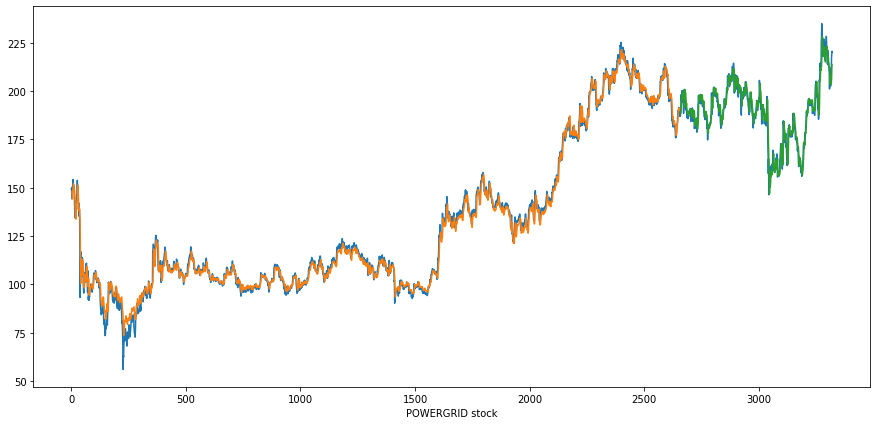

Epoch 1/10
42/42 [==============================] - 8s 56ms/step - loss: 0.0346 - val_loss: 0.0104
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0058 - val_loss: 0.0028
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 8.6316e-04 - val_loss: 5.4926e-04
Epoch 4/10
42/42 [==============================] - 1s 13ms/step - loss: 7.0595e-04 - val_loss: 5.3288e-04
Epoch 5/10
42/42 [==============================] - 1s 14ms/step - loss: 6.5960e-04 - val_loss: 5.1282e-04
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 6.3662e-04 - val_loss: 4.8812e-04
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 6.4236e-04 - val_loss: 3.9549e-04
Epoch 8/10
42/42 [==============================] - 1s 13ms/step - loss: 6.1012e-04 - val_loss: 3.9348e-04
Epoch 9/10
42/42 [==============================] - 1s 17ms/step - loss: 6.1594e-04 - val_loss: 4.3324e-04
Epoch 10/10
21/21 [==============================] - 

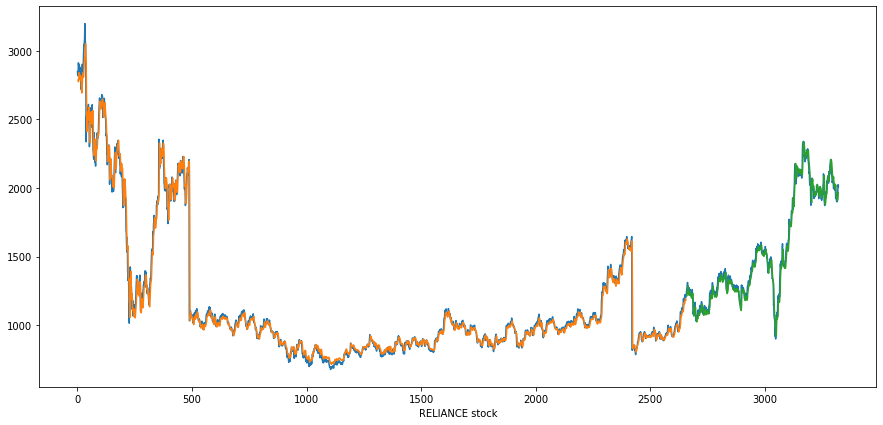

Epoch 1/10
42/42 [==============================] - 7s 43ms/step - loss: 0.1423 - val_loss: 0.0467
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0279 - val_loss: 0.0275
Epoch 3/10
42/42 [==============================] - 0s 12ms/step - loss: 0.0052 - val_loss: 0.0022
Epoch 4/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0019 - val_loss: 8.2003e-04
Epoch 5/10
42/42 [==============================] - 1s 12ms/step - loss: 0.0014 - val_loss: 4.0279e-04
Epoch 6/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 1.8798e-04
Epoch 7/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 9.4307e-05
Epoch 8/10
42/42 [==============================] - 1s 19ms/step - loss: 9.6578e-04 - val_loss: 6.7030e-05
Epoch 9/10
42/42 [==============================] - 1s 19ms/step - loss: 9.3671e-04 - val_loss: 5.1382e-05
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of s

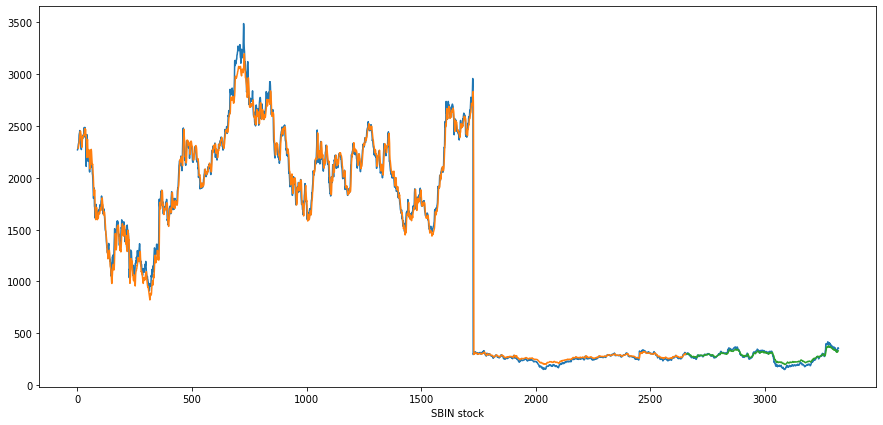

Epoch 1/10
42/42 [==============================] - 8s 44ms/step - loss: 0.0445 - val_loss: 0.0658
Epoch 2/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0104 - val_loss: 0.0035
Epoch 3/10
42/42 [==============================] - 1s 16ms/step - loss: 5.4925e-04 - val_loss: 0.0021
Epoch 4/10
42/42 [==============================] - 1s 21ms/step - loss: 3.5288e-04 - val_loss: 0.0011
Epoch 5/10
42/42 [==============================] - 1s 19ms/step - loss: 2.5672e-04 - val_loss: 7.7252e-04
Epoch 6/10
42/42 [==============================] - 1s 19ms/step - loss: 1.8248e-04 - val_loss: 5.3102e-04
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 1.3367e-04 - val_loss: 5.5395e-04
Epoch 8/10
42/42 [==============================] - 1s 20ms/step - loss: 9.9529e-05 - val_loss: 9.1738e-04
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 8.4323e-05 - val_loss: 0.0011
Epoch 10/10
21/21 [==============================] - 0s 4ms/step


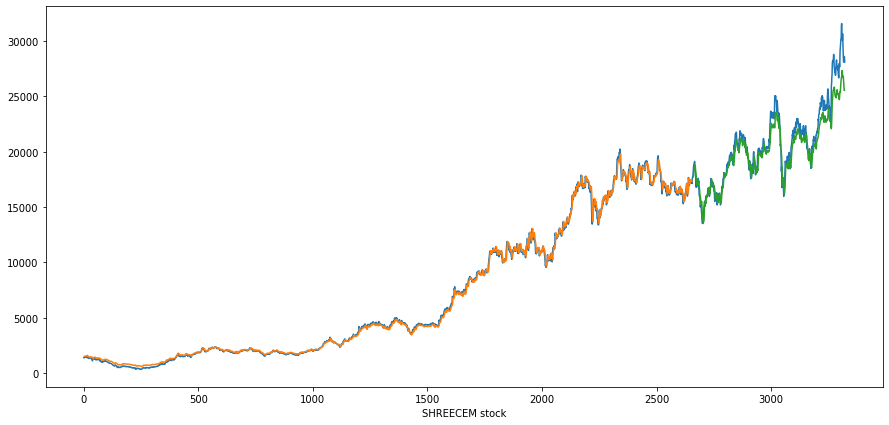

Epoch 1/10
42/42 [==============================] - 7s 44ms/step - loss: 0.0664 - val_loss: 0.0203
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0156 - val_loss: 0.0105
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 1s 20ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0012 - val_loss: 8.0272e-04
Epoch 6/10
42/42 [==============================] - 1s 20ms/step - loss: 0.0011 - val_loss: 6.9649e-04
Epoch 7/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 6.5099e-04
Epoch 8/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 5.6113e-04
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0011 - val_loss: 4.4462e-04
Epoch 10/10
21/21 [==============================] - 0s 5ms/step
Results of sklearn.metri

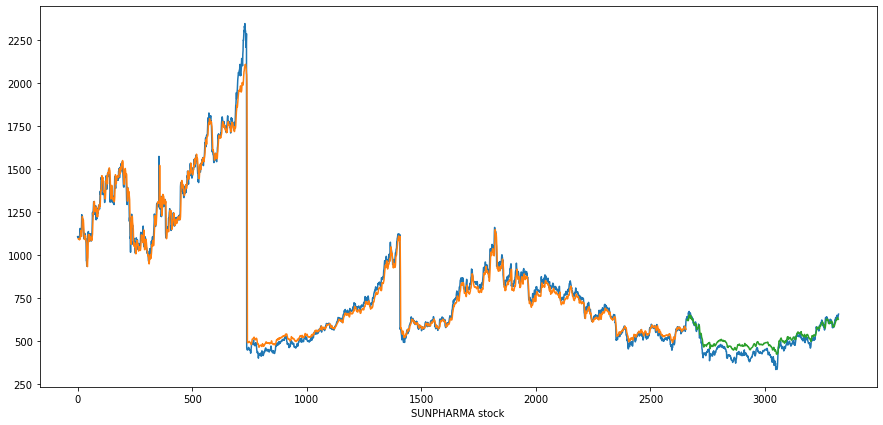

Epoch 1/10
42/42 [==============================] - 8s 58ms/step - loss: 0.0799 - val_loss: 0.0423
Epoch 2/10
42/42 [==============================] - 1s 19ms/step - loss: 0.0145 - val_loss: 0.0170
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0019 - val_loss: 0.0025
Epoch 4/10
42/42 [==============================] - 1s 19ms/step - loss: 8.1324e-04 - val_loss: 0.0026
Epoch 5/10
42/42 [==============================] - 1s 19ms/step - loss: 7.0532e-04 - val_loss: 0.0022
Epoch 6/10
42/42 [==============================] - 1s 19ms/step - loss: 6.4095e-04 - val_loss: 0.0019
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 5.8787e-04 - val_loss: 0.0015
Epoch 8/10
42/42 [==============================] - 1s 14ms/step - loss: 5.6381e-04 - val_loss: 0.0013
Epoch 9/10
42/42 [==============================] - 1s 13ms/step - loss: 5.4161e-04 - val_loss: 0.0011
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.m

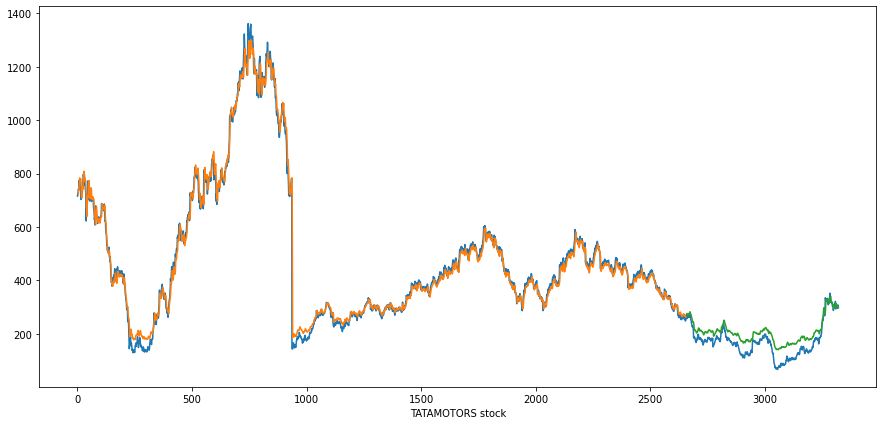

Epoch 1/10
42/42 [==============================] - 10s 63ms/step - loss: 0.0792 - val_loss: 0.0110
Epoch 2/10
42/42 [==============================] - 1s 16ms/step - loss: 0.0111 - val_loss: 0.0044
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0029 - val_loss: 6.1157e-04
Epoch 4/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0010 - val_loss: 6.2231e-04
Epoch 5/10
42/42 [==============================] - 1s 18ms/step - loss: 9.0750e-04 - val_loss: 5.0284e-04
Epoch 6/10
42/42 [==============================] - 1s 18ms/step - loss: 7.9595e-04 - val_loss: 4.4486e-04
Epoch 7/10
42/42 [==============================] - 1s 20ms/step - loss: 7.1472e-04 - val_loss: 4.4412e-04
Epoch 8/10
42/42 [==============================] - 1s 21ms/step - loss: 6.1269e-04 - val_loss: 5.1732e-04
Epoch 9/10
42/42 [==============================] - 1s 20ms/step - loss: 5.6644e-04 - val_loss: 4.4776e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/

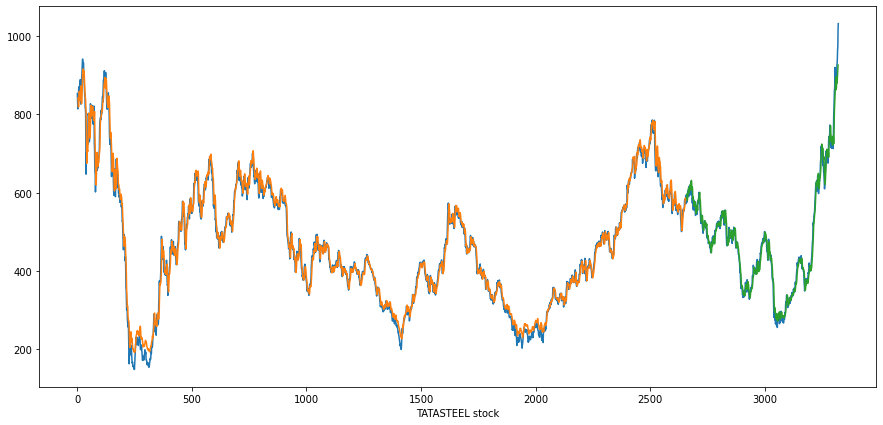

Epoch 1/10
42/42 [==============================] - 8s 43ms/step - loss: 0.0921 - val_loss: 0.0041
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0144 - val_loss: 0.0014
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 1s 12ms/step - loss: 9.7339e-04 - val_loss: 7.3905e-04
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 8.2678e-04 - val_loss: 6.8453e-04
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 7.3219e-04 - val_loss: 5.1864e-04
Epoch 7/10
42/42 [==============================] - 1s 14ms/step - loss: 6.4791e-04 - val_loss: 3.9062e-04
Epoch 8/10
42/42 [==============================] - 1s 13ms/step - loss: 5.7369e-04 - val_loss: 4.2580e-04
Epoch 9/10
42/42 [==============================] - 1s 13ms/step - loss: 5.7155e-04 - val_loss: 2.8793e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/s

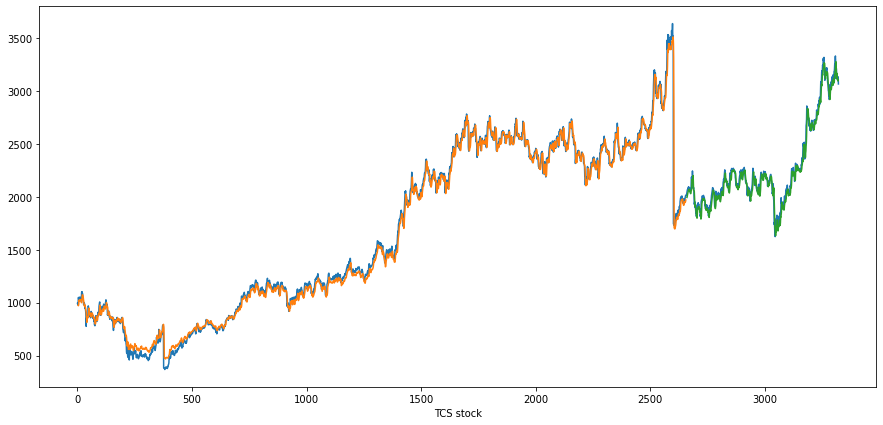

Epoch 1/10
42/42 [==============================] - 8s 58ms/step - loss: 0.0586 - val_loss: 0.0076
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0154 - val_loss: 2.9277e-04
Epoch 3/10
42/42 [==============================] - 1s 20ms/step - loss: 0.0013 - val_loss: 1.5779e-04
Epoch 4/10
42/42 [==============================] - 1s 17ms/step - loss: 9.7051e-04 - val_loss: 3.0424e-04
Epoch 5/10
42/42 [==============================] - 1s 16ms/step - loss: 8.5544e-04 - val_loss: 1.5479e-04
Epoch 6/10
42/42 [==============================] - 1s 17ms/step - loss: 7.8932e-04 - val_loss: 8.5782e-05
Epoch 7/10
42/42 [==============================] - 1s 21ms/step - loss: 7.5833e-04 - val_loss: 2.0758e-04
Epoch 8/10
42/42 [==============================] - 1s 15ms/step - loss: 7.4311e-04 - val_loss: 8.3452e-05
Epoch 9/10
42/42 [==============================] - 1s 14ms/step - loss: 7.7070e-04 - val_loss: 7.1405e-05
Epoch 10/10
21/21 [==============================] - 

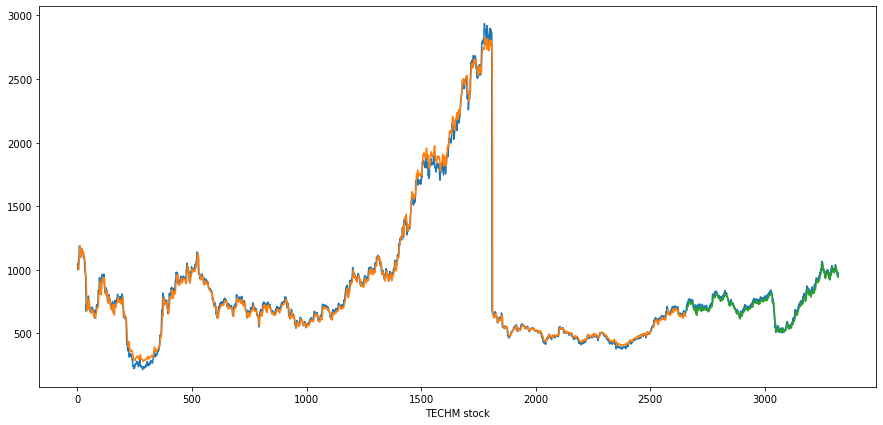

Epoch 1/10
42/42 [==============================] - 8s 79ms/step - loss: 0.0543 - val_loss: 0.0051
Epoch 2/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0206 - val_loss: 3.1238e-04
Epoch 3/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0016 - val_loss: 2.8485e-04
Epoch 4/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0012 - val_loss: 4.3993e-04
Epoch 5/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0012 - val_loss: 3.2294e-04
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 2.4462e-04
Epoch 7/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0011 - val_loss: 1.4586e-04
Epoch 8/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 2.5534e-04
Epoch 9/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0011 - val_loss: 1.3733e-04
Epoch 10/10
21/21 [==============================] - 0s 5ms/step
Results of s

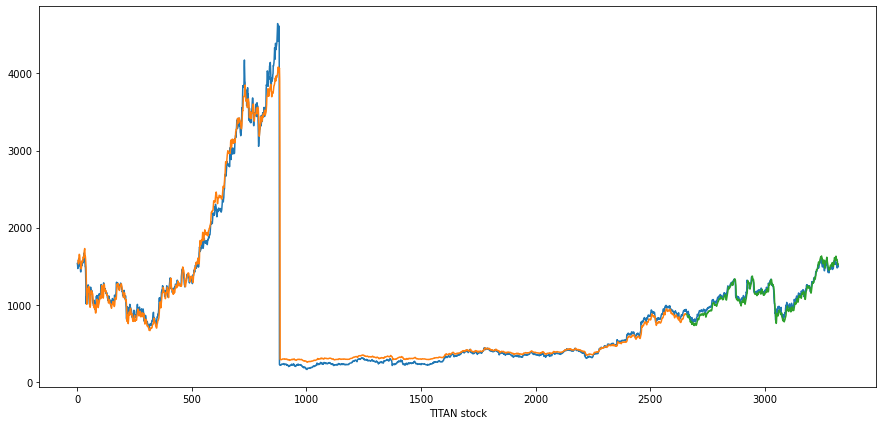

Epoch 1/10
42/42 [==============================] - 9s 49ms/step - loss: 0.0633 - val_loss: 0.0556
Epoch 2/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0120 - val_loss: 0.0035
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0014 - val_loss: 0.0025
Epoch 4/10
42/42 [==============================] - 1s 14ms/step - loss: 6.2038e-04 - val_loss: 9.8292e-04
Epoch 5/10
42/42 [==============================] - 1s 14ms/step - loss: 4.7878e-04 - val_loss: 5.9974e-04
Epoch 6/10
42/42 [==============================] - 1s 13ms/step - loss: 3.5952e-04 - val_loss: 5.8252e-04
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 2.6450e-04 - val_loss: 8.3305e-04
Epoch 8/10
42/42 [==============================] - 1s 14ms/step - loss: 1.9457e-04 - val_loss: 0.0014
Epoch 9/10
42/42 [==============================] - 1s 14ms/step - loss: 1.5119e-04 - val_loss: 0.0018
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Resu

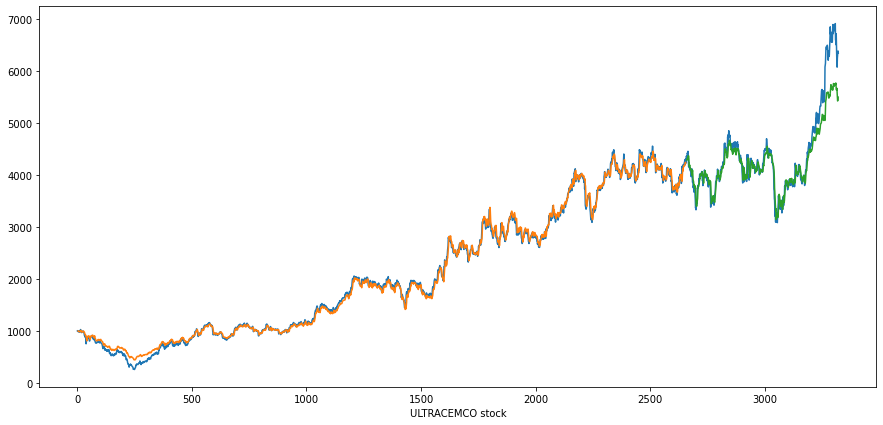

Epoch 1/10
42/42 [==============================] - 9s 45ms/step - loss: 0.0694 - val_loss: 0.0511
Epoch 2/10
42/42 [==============================] - 1s 14ms/step - loss: 0.0146 - val_loss: 0.0018
Epoch 3/10
42/42 [==============================] - 1s 12ms/step - loss: 6.2203e-04 - val_loss: 0.0013
Epoch 4/10
42/42 [==============================] - 1s 13ms/step - loss: 3.3209e-04 - val_loss: 0.0014
Epoch 5/10
42/42 [==============================] - 1s 14ms/step - loss: 2.7196e-04 - val_loss: 0.0017
Epoch 6/10
42/42 [==============================] - 1s 14ms/step - loss: 2.6205e-04 - val_loss: 0.0016
Epoch 7/10
42/42 [==============================] - 1s 13ms/step - loss: 2.4593e-04 - val_loss: 0.0016
Epoch 8/10
42/42 [==============================] - 1s 19ms/step - loss: 2.4029e-04 - val_loss: 0.0016
Epoch 9/10
42/42 [==============================] - 1s 15ms/step - loss: 2.3710e-04 - val_loss: 0.0015
Epoch 10/10
21/21 [==============================] - 0s 6ms/step
Results of sklea

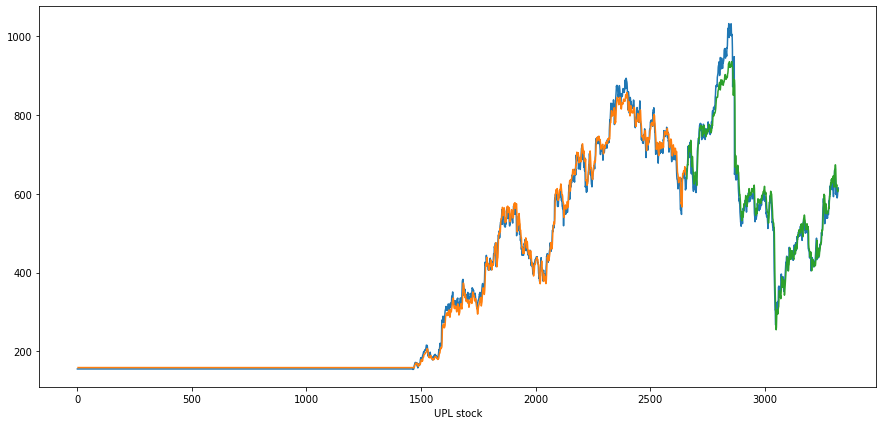

Epoch 1/10
42/42 [==============================] - 7s 44ms/step - loss: 0.0285 - val_loss: 0.0034
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0043 - val_loss: 9.5634e-06
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 6.4225e-04 - val_loss: 3.3224e-05
Epoch 4/10
42/42 [==============================] - 1s 13ms/step - loss: 6.6072e-04 - val_loss: 6.2361e-05
Epoch 5/10
42/42 [==============================] - 1s 13ms/step - loss: 6.4371e-04 - val_loss: 4.4392e-05
Epoch 6/10
42/42 [==============================] - 1s 15ms/step - loss: 6.4374e-04 - val_loss: 1.1050e-05
Epoch 7/10
42/42 [==============================] - 1s 15ms/step - loss: 6.3016e-04 - val_loss: 4.1103e-05
Epoch 8/10
42/42 [==============================] - 1s 19ms/step - loss: 6.4502e-04 - val_loss: 1.6897e-05
Epoch 9/10
42/42 [==============================] - 1s 17ms/step - loss: 6.3219e-04 - val_loss: 4.3379e-05
Epoch 10/10
21/21 [==============================

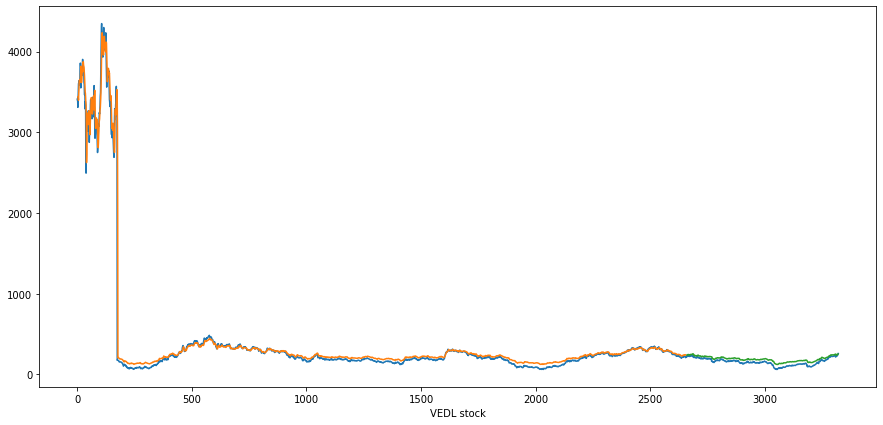

Epoch 1/10
42/42 [==============================] - 7s 43ms/step - loss: 0.1413 - val_loss: 0.0364
Epoch 2/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0145 - val_loss: 0.0252
Epoch 3/10
42/42 [==============================] - 1s 13ms/step - loss: 0.0063 - val_loss: 0.0095
Epoch 4/10
42/42 [==============================] - 1s 15ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 5/10
42/42 [==============================] - 1s 21ms/step - loss: 0.0011 - val_loss: 0.0017
Epoch 6/10
42/42 [==============================] - 1s 21ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 9.7240e-04 - val_loss: 0.0015
Epoch 8/10
42/42 [==============================] - 1s 19ms/step - loss: 9.4051e-04 - val_loss: 0.0013
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 9.0859e-04 - val_loss: 0.0012
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results of sklearn.metrics:
MAE:

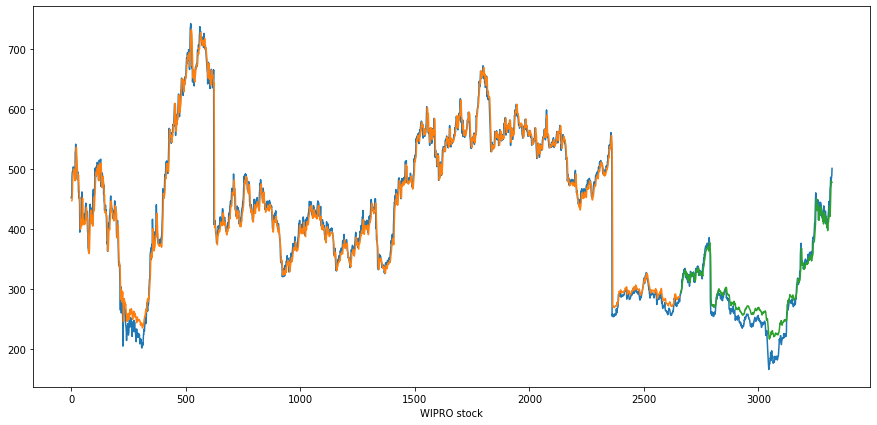

Epoch 1/10
42/42 [==============================] - 8s 48ms/step - loss: 0.1192 - val_loss: 0.0209
Epoch 2/10
42/42 [==============================] - 1s 17ms/step - loss: 0.0165 - val_loss: 0.0033
Epoch 3/10
42/42 [==============================] - 1s 19ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 4/10
42/42 [==============================] - 1s 18ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 5/10
42/42 [==============================] - 1s 19ms/step - loss: 0.0010 - val_loss: 9.2935e-04
Epoch 6/10
42/42 [==============================] - 1s 18ms/step - loss: 7.8386e-04 - val_loss: 8.6396e-04
Epoch 7/10
42/42 [==============================] - 1s 19ms/step - loss: 6.1838e-04 - val_loss: 8.3614e-04
Epoch 8/10
42/42 [==============================] - 1s 19ms/step - loss: 5.1209e-04 - val_loss: 8.5853e-04
Epoch 9/10
42/42 [==============================] - 1s 20ms/step - loss: 4.4976e-04 - val_loss: 8.1911e-04
Epoch 10/10
21/21 [==============================] - 0s 4ms/step
Results 

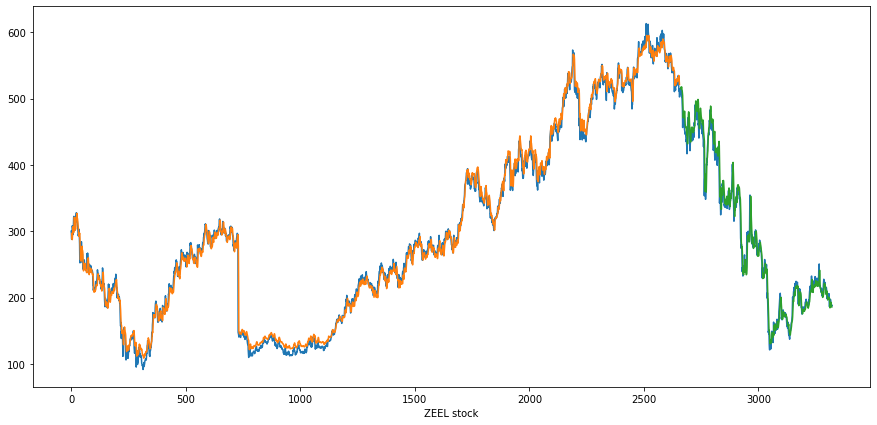

In [ ]:

for i in comparative_df.columns:

    #scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1 = scaler.fit_transform(np.array(comparative_df[i]).reshape(-1, 1))

    train_data, test_data = df1[0:2657], df1[2657:len(comparative_df)]

    time_step = 3
    #creating the datasets using the above function
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)

    #Initiliazing the RNN
    model = Sequential()

    #Add the LSTM layers and can add some dropout regularization.
    model.add(LSTM(40, return_sequences=True, input_shape=(3, 1)))
    model.add(LSTM(20, return_sequences=True))
    model.add(LSTM(5))

    #Adding the output layer
    model.add(Dense(1))

    #compile the RNN
    model.compile(loss='mean_squared_error', optimizer='adam')

    #Fit the RNN to the training set
    model.fit(X_train, y_train, validation_data=(
        X_test, ytest), epochs=10, batch_size=64, verbose=1)
    
    #predicting the train data
    train_predict = model.predict(X_train)
    #predicting the test data
    test_predict = model.predict(X_test)
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    mae = metrics.mean_absolute_error(ytest, test_predict)
    mse = metrics.mean_squared_error(ytest, test_predict)
    rmse = np.sqrt(mse)  # mse**(0.5)

    print("Results of sklearn.metrics:")
    print("MAE:", mae)
    print("RMSE:", rmse)

    look_back = 3
    trainPredictPlot = np.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df1)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2) +
                    1:len(df1)-1, :] = test_predict

    # plot baseline and predictions
    plt.figure(figsize=(15,7))
    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()


##RNN

In [ ]:

for i in comparative_df.columns:
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1 = scaler.fit_transform(np.array(comparative_df[i]).reshape(-1, 1))

    train_data, test_data = df1[0:2657], df1[2657:len(comparative_df)]

    time_step = 3
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)
    model = Sequential()
    model.add(SimpleRNN(40,return_sequences=True,input_shape=(3,1)))
    model.add(SimpleRNN(20,return_sequences=True))
    model.add(SimpleRNN(10,return_sequences=True))
    model.add(SimpleRNN(5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, validation_data=(
        X_test, ytest), epochs=10, batch_size=64, verbose=1)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    mae = metrics.mean_absolute_error(ytest, test_predict)
    mse = metrics.mean_squared_error(ytest, test_predict)
    rmse = np.sqrt(mse)  # mse**(0.5)

    print("Results of sklearn.metrics:")
    print("MAE:", mae)
    print("RMSE:", rmse)

    look_back = 3
    trainPredictPlot = np.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df1)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2) +
                    1:len(df1)-1, :] = test_predict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()


#PART3

In [ ]:
import yfinance as yf

sd = '2021-1-1'
ed = '2022-11-1'

df = yf.download("ADANIPORTS.NS",sd,ed)

[*********************100%***********************]  1 of 1 completed


In [ ]:
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-01-01  485.000000  508.000000  482.549988  503.850006  496.902405   
2021-01-04  507.000000  510.899994  495.200012  498.899994  492.020630   
2021-01-05  498.899994  504.500000  492.000000  499.450012  492.563080   
2021-01-06  501.799988  504.950012  489.500000  496.799988  489.949585   
2021-01-07  500.100006  520.900024  499.500000  513.849976  506.764465   
...                ...         ...         ...         ...         ...   
2022-10-24  808.000000  810.000000  802.000000  805.500000  805.500000   
2022-10-25  806.700012  812.750000  797.099976  800.349976  800.349976   
2022-10-27  805.000000  824.000000  795.000000  821.250000  821.250000   
2022-10-28  824.000000  834.799988  817.299988  820.299988  820.299988   
2022-10-31  824.000000  831.000000  819.500000  823.549988  823.549988   

              Volume  
Date                  
2021-01-01   7815730  
2021-01-04   9998803  
2021-01-05   5135408  
2021-01-06   5203982  
2021-01-07  10295126  
...              ...  
2022-10-24    665021  
2022-10-25   4485050  
2022-10-27   7110289  
2022-10-28   6898541  
2022-10-31   4487537  

[453 rows x 6 columns]

In [ ]:
df.describe()

Open        High         Low       Close   Adj Close  \
count  453.000000  453.000000  453.000000  453.000000  453.000000   
mean   739.906625  751.619981  726.742934  738.562914  733.167127   
std     80.038396   80.882066   78.333789   79.018436   80.133828   
min    485.000000  504.500000  482.549988  496.799988  489.949585   
25%    707.000000  717.750000  695.250000  705.549988  700.199280   
50%    737.700012  747.500000  727.799988  737.450012  731.830200   
75%    773.099976  787.299988  760.049988  769.200012  763.700012   
max    974.200012  987.849976  967.000000  970.250000  970.250000   

             Volume  
count  4.530000e+02  
mean   9.477968e+06  
std    1.059770e+07  
min    4.532870e+05  
25%    3.969878e+06  
50%    6.219506e+06  
75%    1.071240e+07  
max    9.771788e+07

In [ ]:
df2 = df[["Close"]]

In [ ]:
df2["TCS"]=yf.download("ADANIPORTS.NS",sd,ed)[["Close"]]

[*********************100%***********************]  1 of 1 completed


In [ ]:
df2["ADANIPORTS"]=df2["Close"]

In [ ]:
df2 = df2.drop(["ADANIPORTS","Close"],axis=1)

In [ ]:
for i in comparative_df.columns:
  df2[i]=yf.download(i + ".NS",sd,ed)[["Close"]]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
df2

TCS  ADANIPORTS   ASIANPAINT    AXISBANK   BAJAJ-AUTO  \
Date                                                                        
2021-01-01  2928.250000  503.850006  2775.550049  623.799988  3481.250000   
2021-01-04  3039.449951  498.899994  2753.699951  624.700012  3522.449951   
2021-01-05  3093.000000  499.450012  2793.850098  664.450012  3492.649902   
2021-01-06  3051.500000  496.799988  2805.350098  654.250000  3462.699951   
2021-01-07  3032.800049  513.849976  2792.250000  671.099976  3437.949951   
...                 ...         ...          ...         ...          ...   
2022-10-24  3161.699951  805.500000  3121.649902  909.450012  3699.800049   
2022-10-25  3162.100098  800.349976  3084.899902  902.849976  3654.100098   
2022-10-27  3157.399902  821.250000  3043.449951  915.150024  3622.300049   
2022-10-28  3163.250000  820.299988  3053.399902  903.049988  3670.699951   
2022-10-31  3193.149902  823.549988  3107.699951  906.000000  3671.850098   

             BAJAJFINSV   BAJFINANCE  BHARTIARTL        BPCL    BRITANNIA  \
Date                                                                        
2021-01-01   887.044983  5280.149902  515.150024  381.950012  3567.800049   
2021-01-04   889.875000  5216.200195  517.099976  395.350006  3552.899902   
2021-01-05   882.085022  5119.000000  514.000000  392.000000  3551.100098   
2021-01-06   878.635010  5030.299805  525.299988  387.299988  3539.699951   
2021-01-07   898.799988  5081.000000  545.250000  392.200012  3552.800049   
...                 ...          ...         ...         ...          ...   
2022-10-24  1701.800049  7206.500000  802.099976  300.750000  3801.850098   
2022-10-25  1658.550049  7102.899902  802.299988  302.600006  3713.100098   
2022-10-27  1630.949951  6971.100098  817.099976  305.600006  3755.300049   
2022-10-28  1653.400024  7006.850098  816.849976  303.299988  3777.699951   
2022-10-31  1687.500000  7144.100098  832.000000  303.649994  3766.550049   

            ...    SUNPHARMA  TATAMOTORS   TATASTEEL        TECHM  \
Date        ...                                                     
2021-01-01  ...   596.250000  186.500000   64.309998   977.950012   
2021-01-04  ...   604.400024  191.300003   69.300003  1001.950012   
2021-01-05  ...   603.450012  193.199997   68.055000  1003.849976   
2021-01-06  ...   605.299988  195.399994   68.379997   997.150024   
2021-01-07  ...   601.900024  196.750000   72.279999   994.750000   
...         ...          ...         ...         ...          ...   
2022-10-24  ...   987.000000  401.600006  101.199997  1048.150024   
2022-10-25  ...   991.549988  404.549988  101.199997  1082.500000   
2022-10-27  ...  1011.650024  407.700012  104.199997  1075.849976   
2022-10-28  ...   990.000000  409.899994  101.599998  1048.949951   
2022-10-31  ...  1016.900024  412.750000  101.550003  1063.400024   

                  TITAN   ULTRACEMCO         UPL        VEDL       WIPRO  \
Date                                                                       
2021-01-01  1558.599976  5290.799805  469.299988  160.399994  388.100006   
2021-01-04  1550.900024  5327.200195  473.149994  170.250000  396.399994   
2021-01-05  1570.949951  5341.200195  471.250000  169.000000  406.299988   
2021-01-06  1572.599976  5448.350098  472.399994  180.300003  406.399994   
2021-01-07  1542.349976  5397.950195  482.500000  185.500000  406.750000   
...                 ...          ...         ...         ...         ...   
2022-10-24  2683.899902  6394.600098  708.099976  281.750000  384.700012   
2022-10-25  2670.300049  6415.700195  694.450012  280.000000  384.649994   
2022-10-27  2703.800049  6436.799805  706.450012  288.350006  382.649994   
2022-10-28  2736.399902  6445.850098  713.900024  284.850006  383.250000   
2022-10-31  2761.500000  6714.950195  730.200012  280.799988  386.549988   

                  ZEEL  
Date                    
2021-01-01  224.949997  
2021-01-04  219.050003  
2021-01-05  222.500000  
2021

In [ ]:
df2 = df2.drop(["TCS"],axis=1)

In [ ]:
df2.shape

(453, 48)

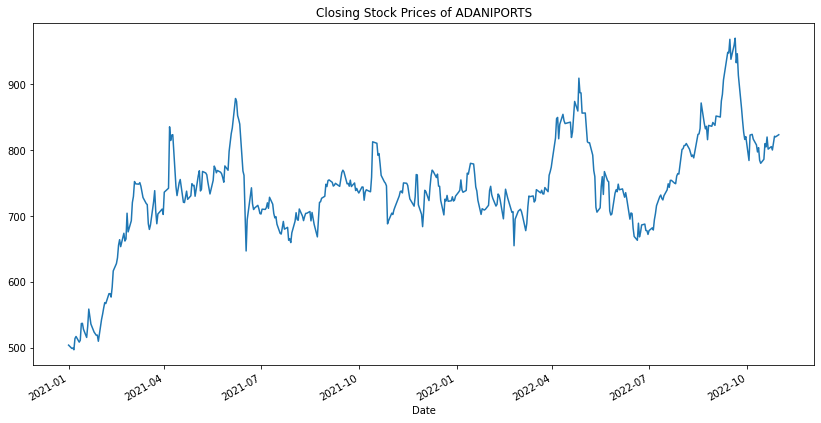

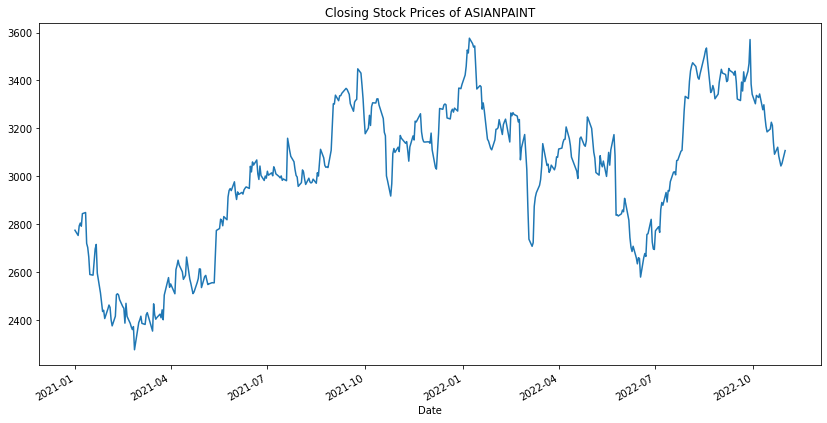

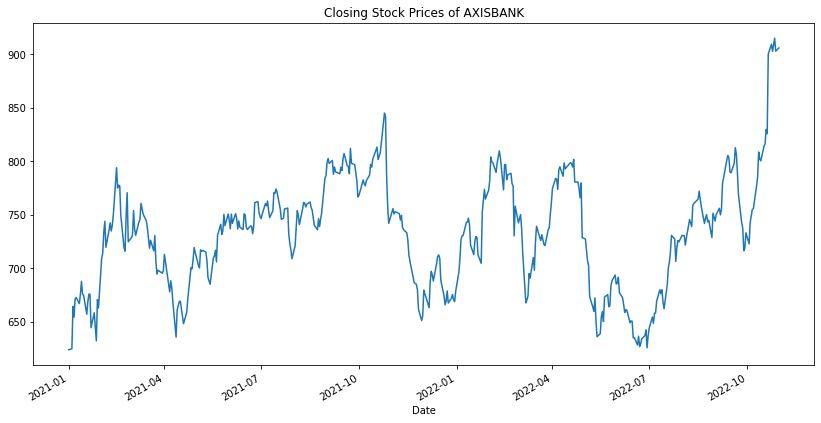

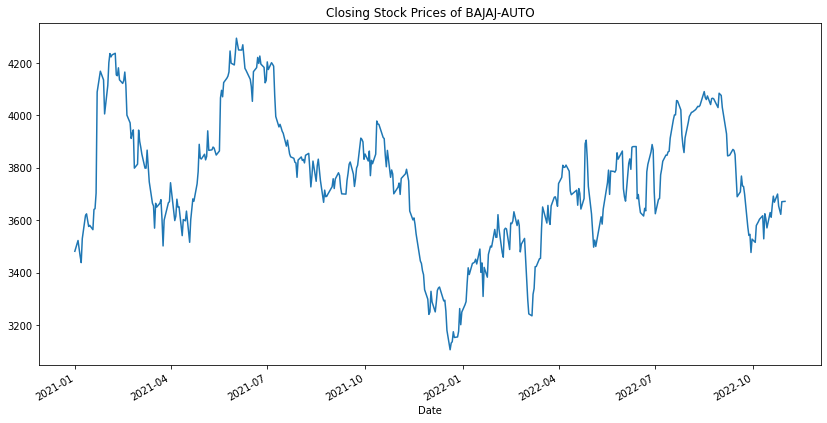

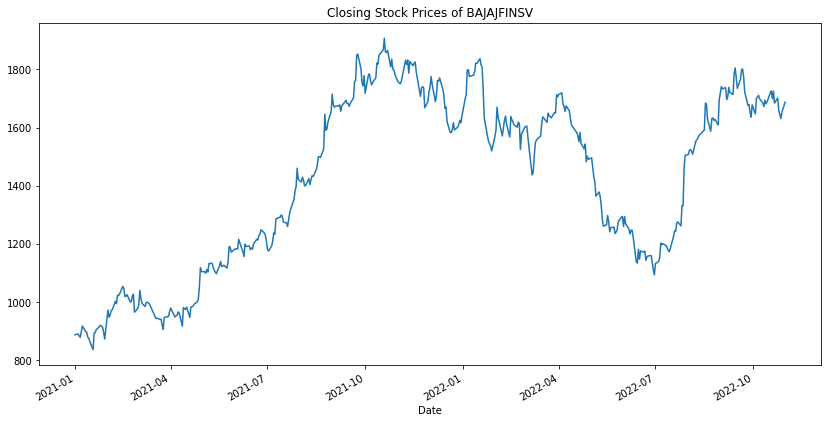

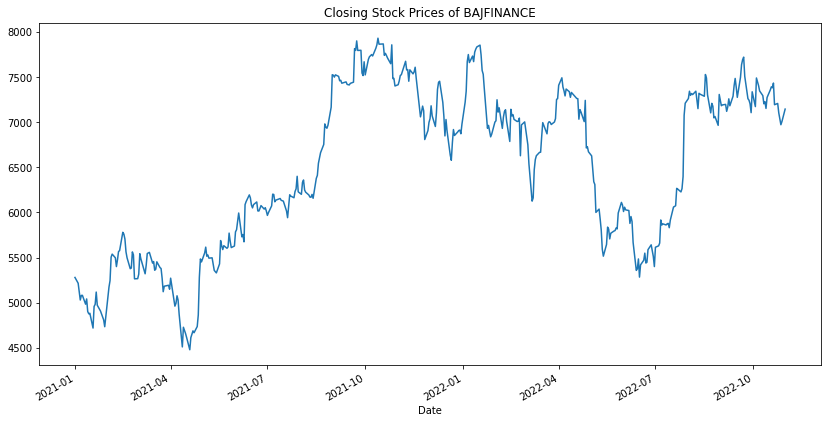

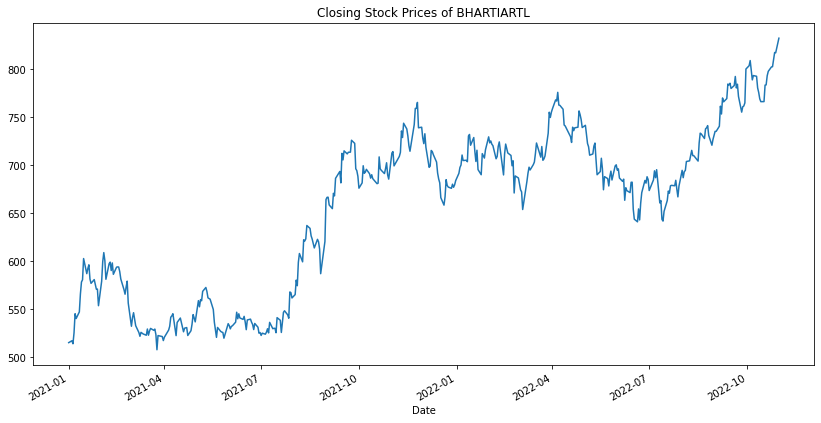

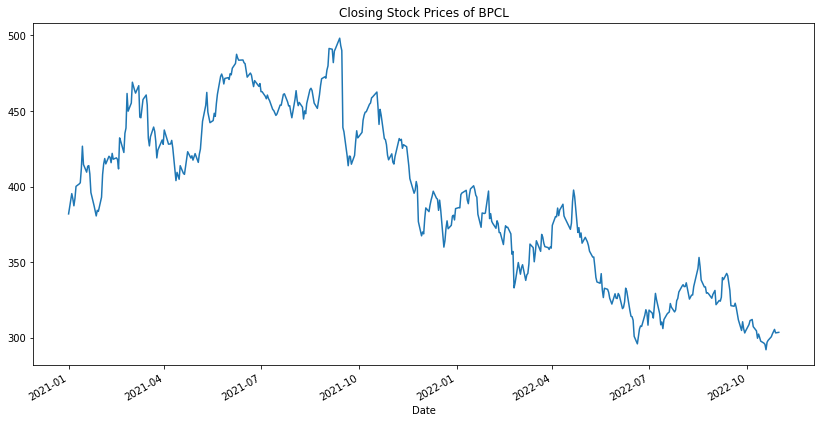

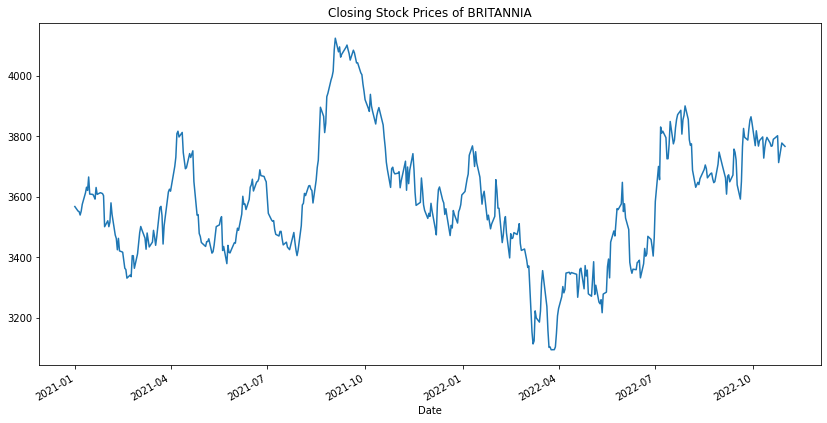

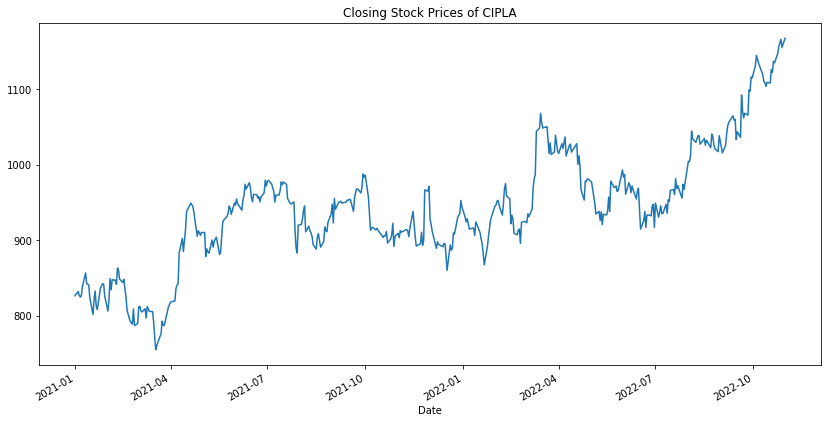

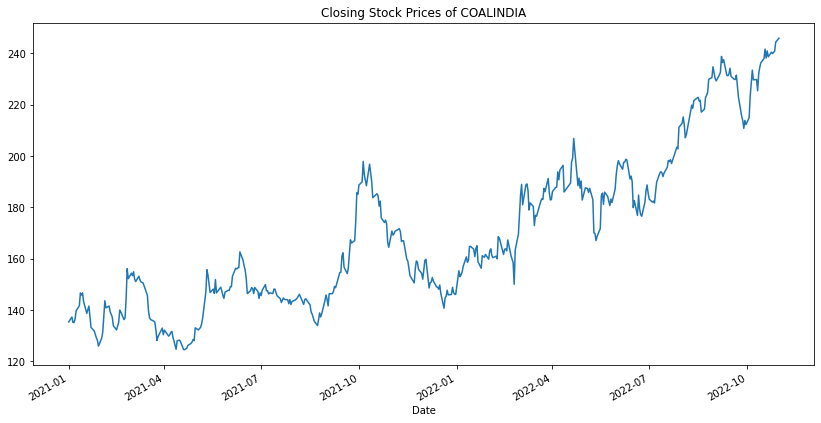

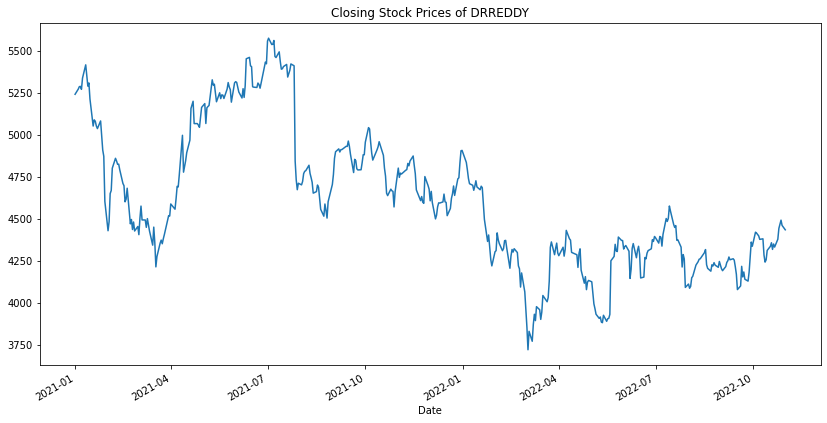

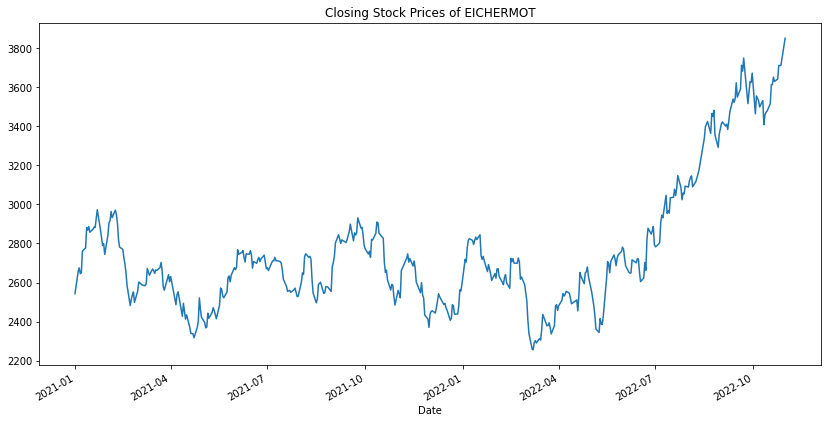

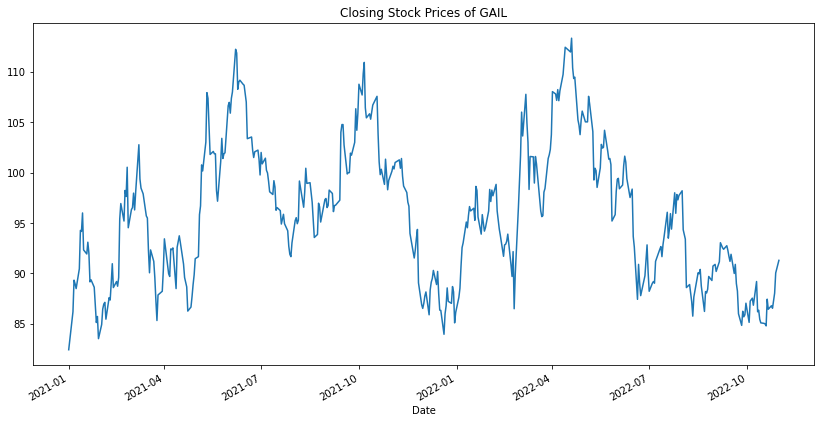

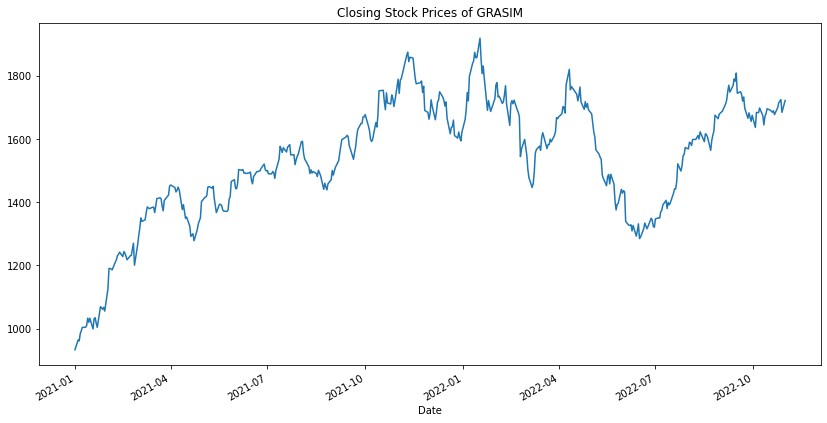

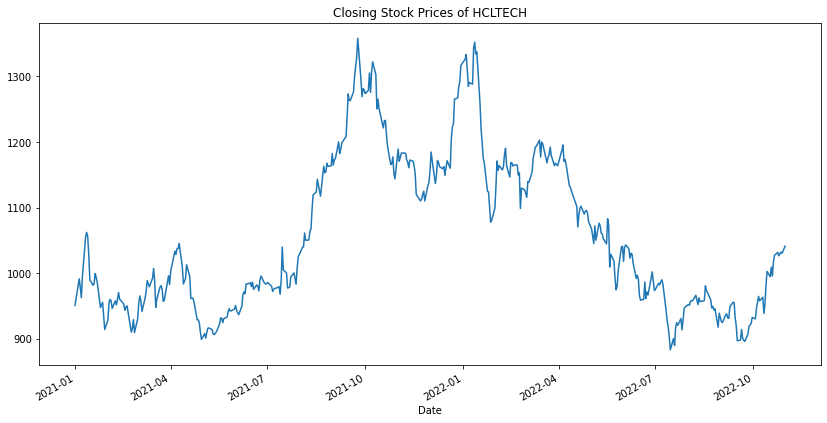

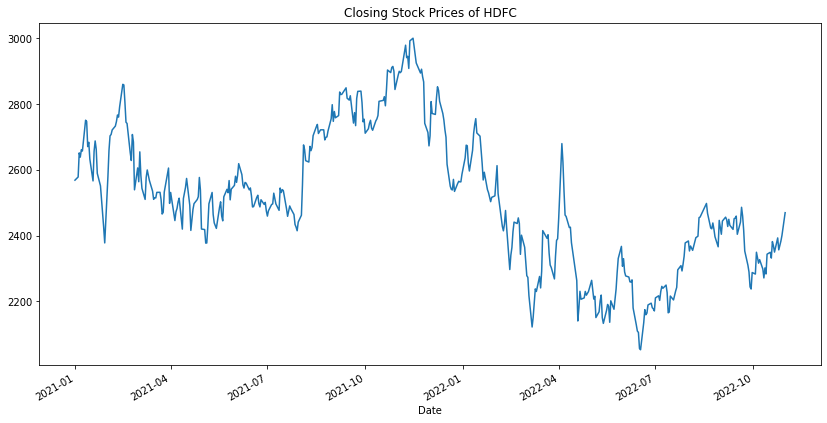

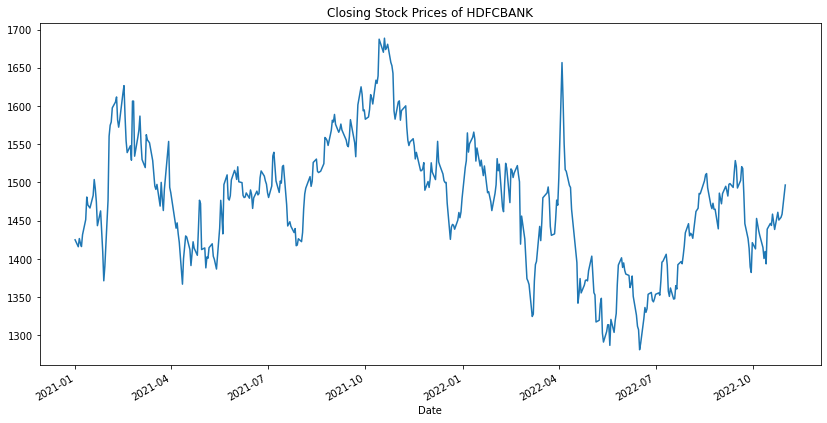

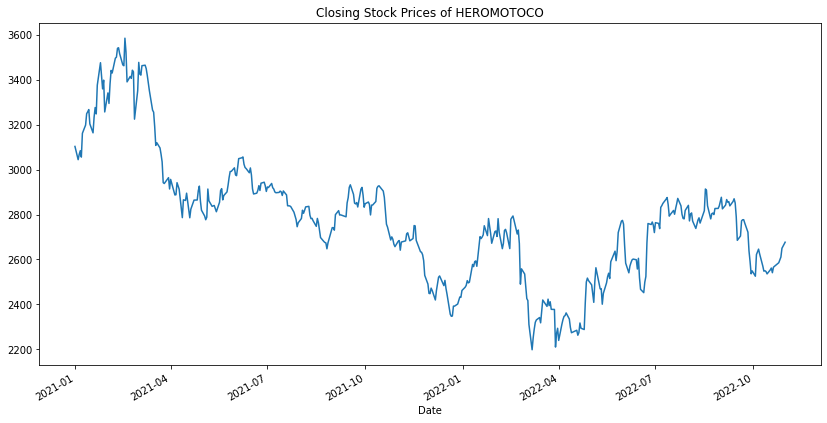

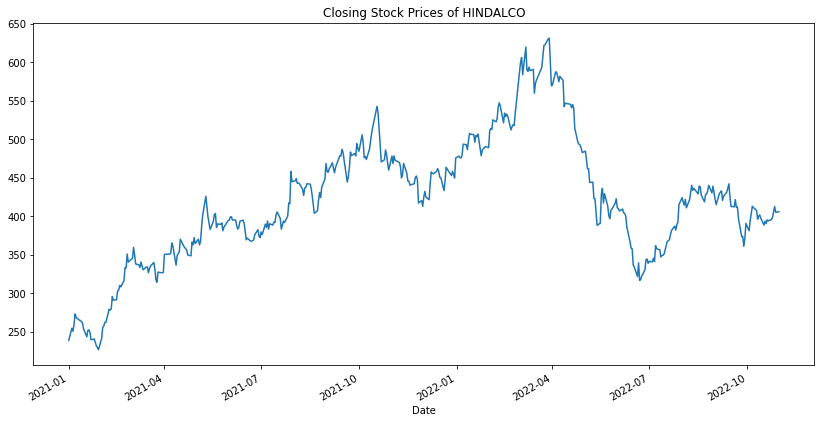

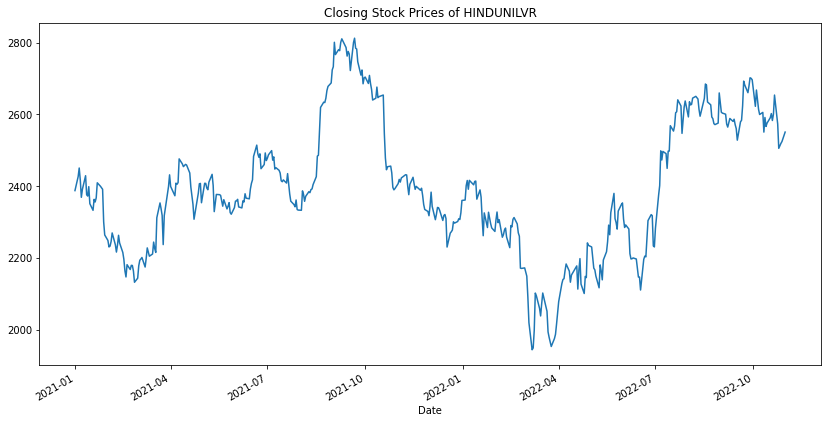

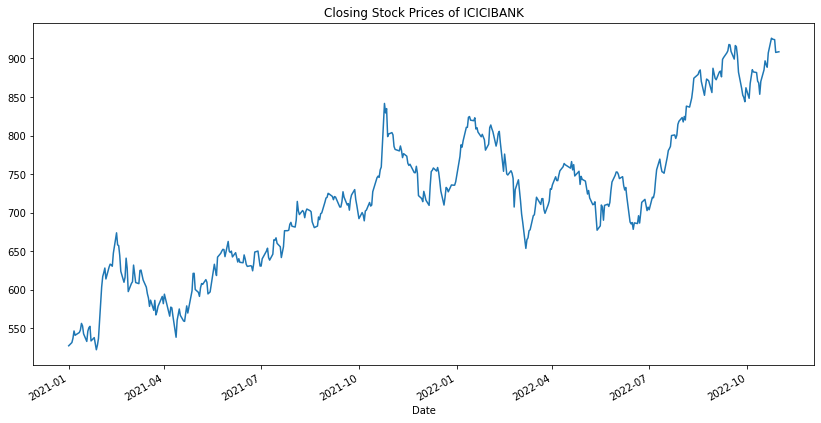

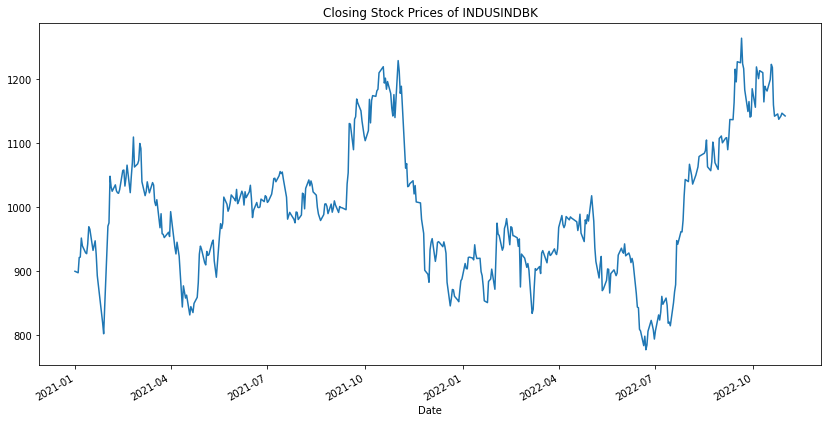

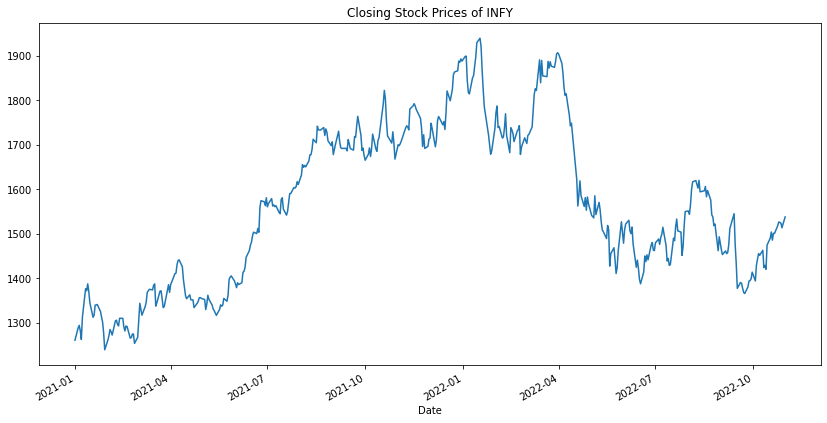

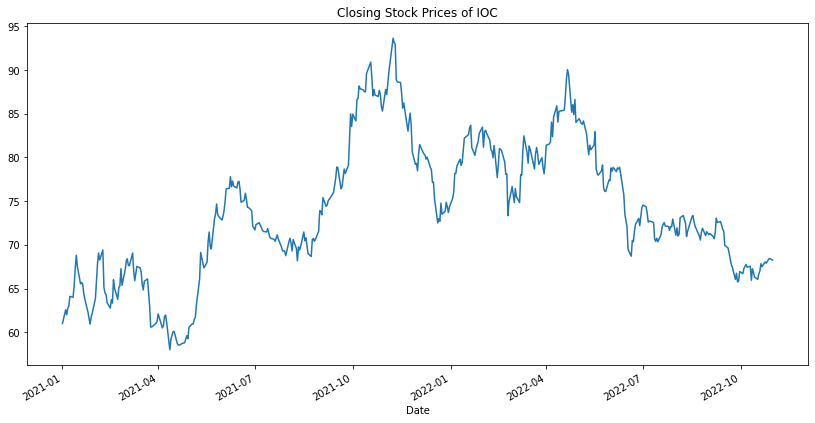

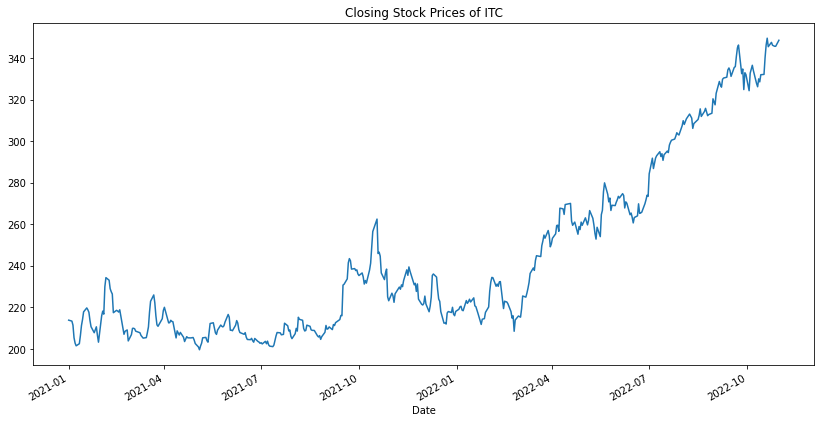

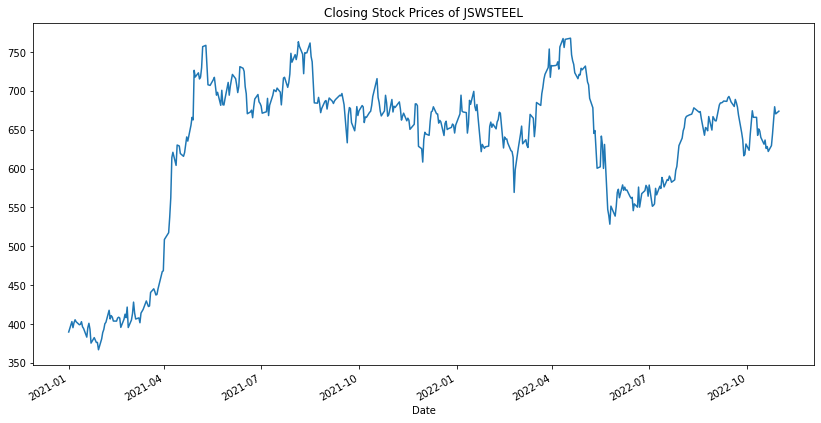

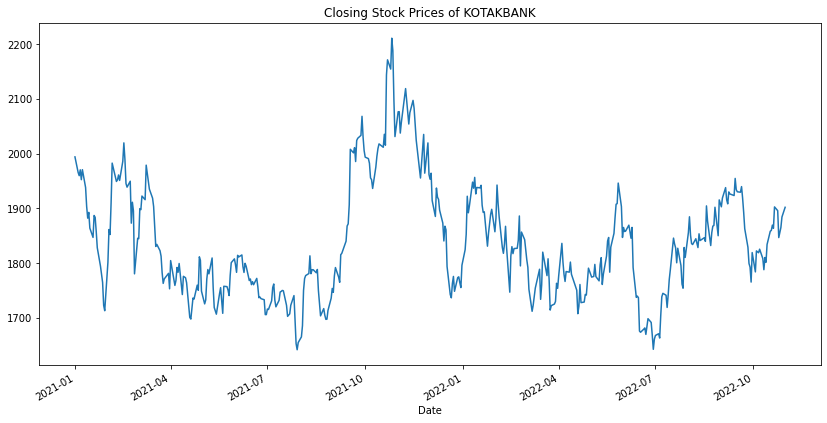

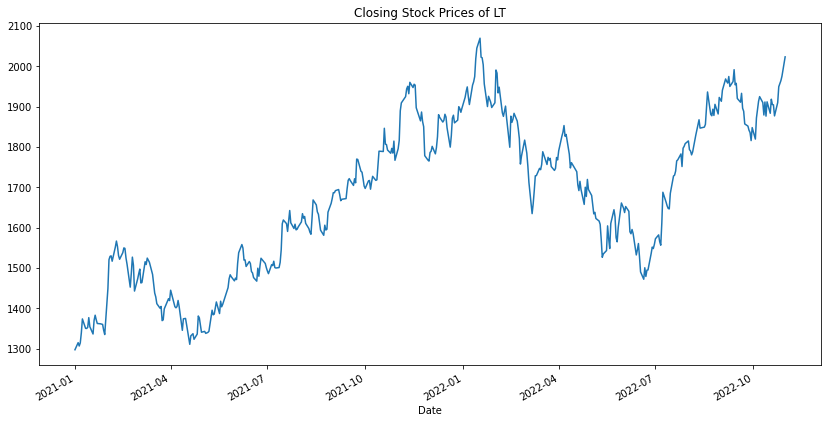

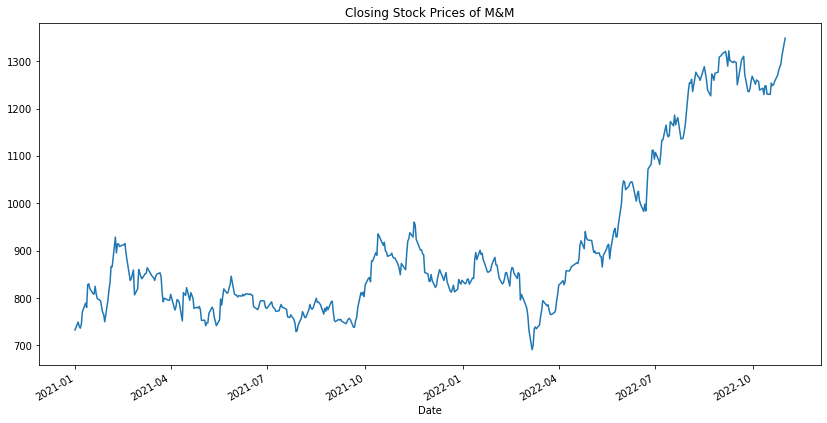

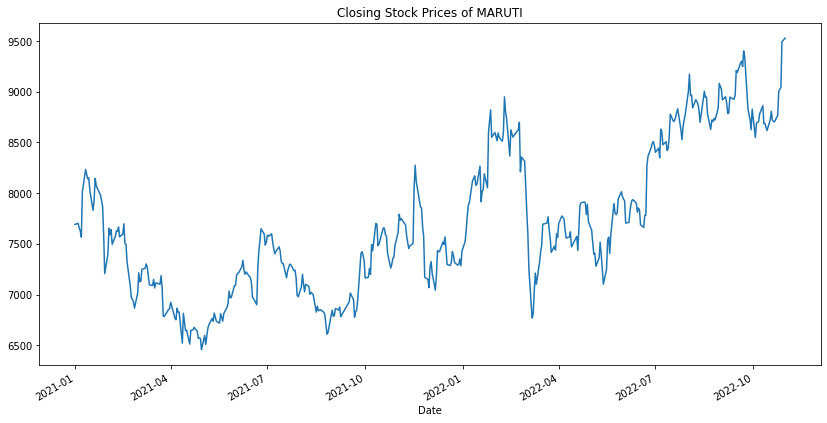

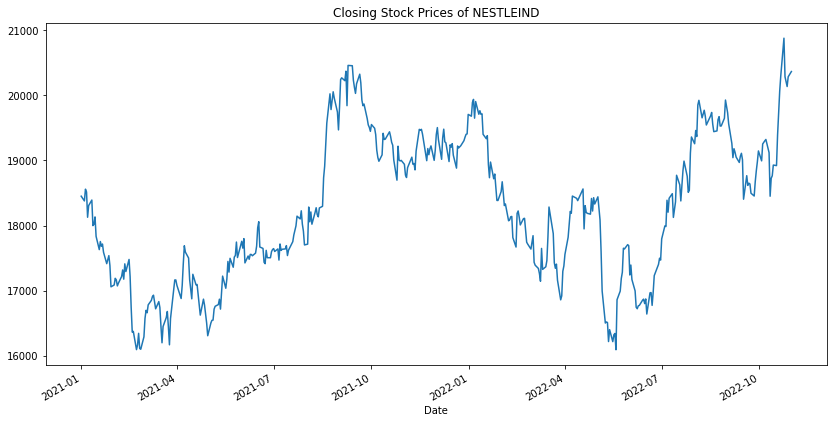

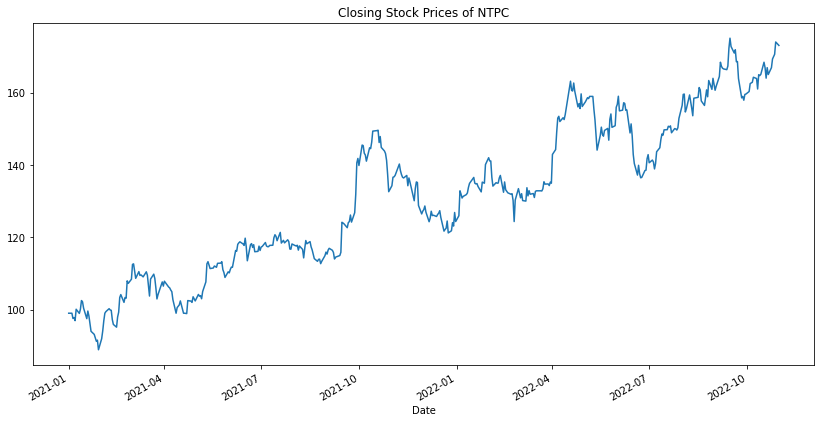

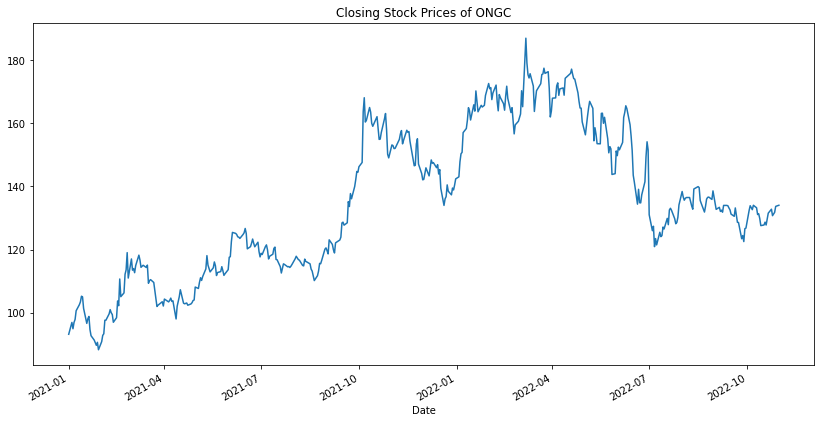

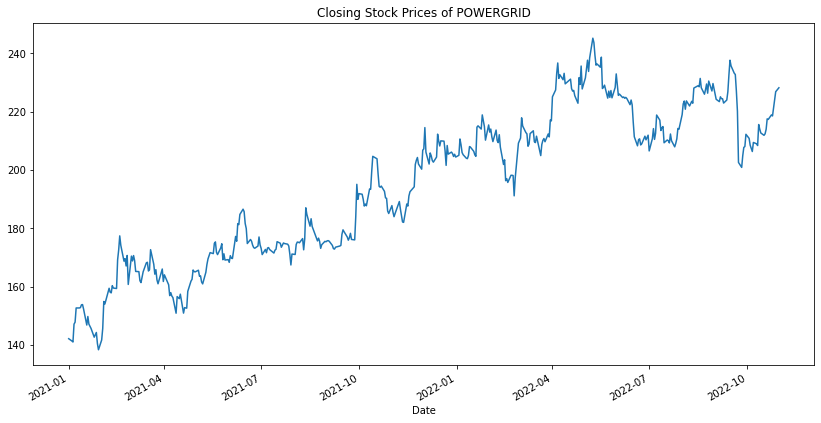

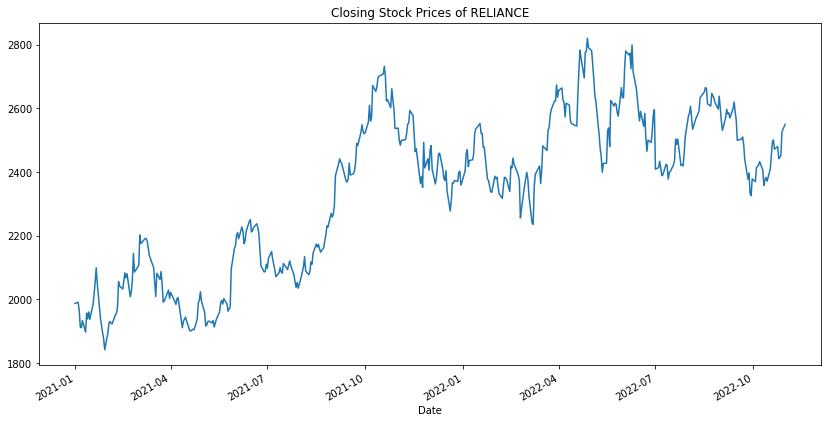

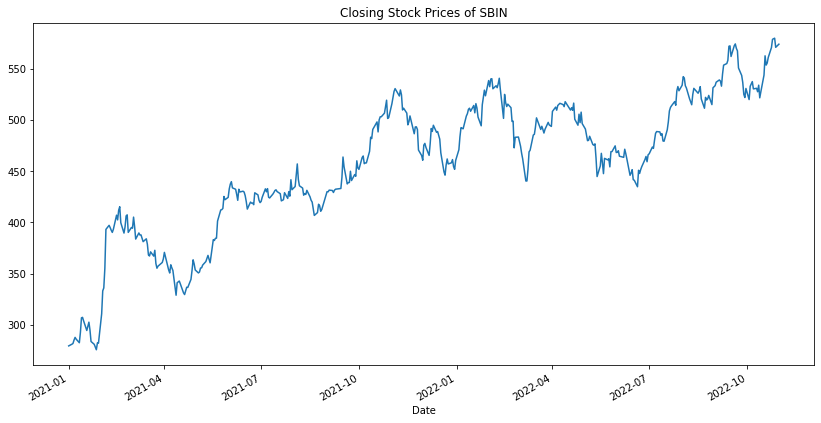

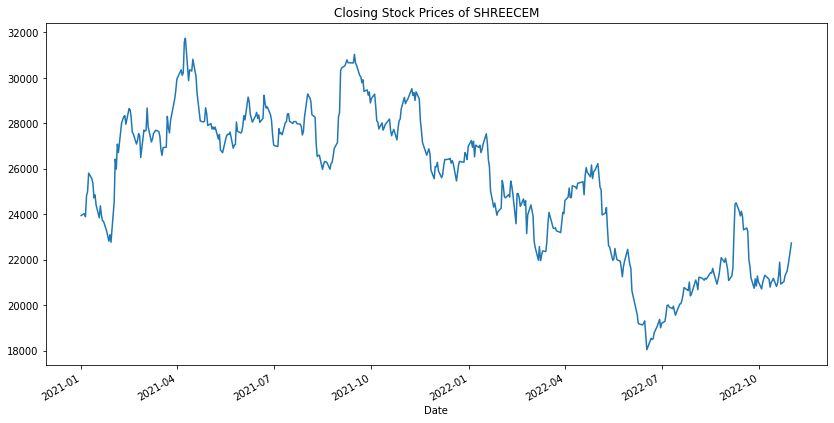

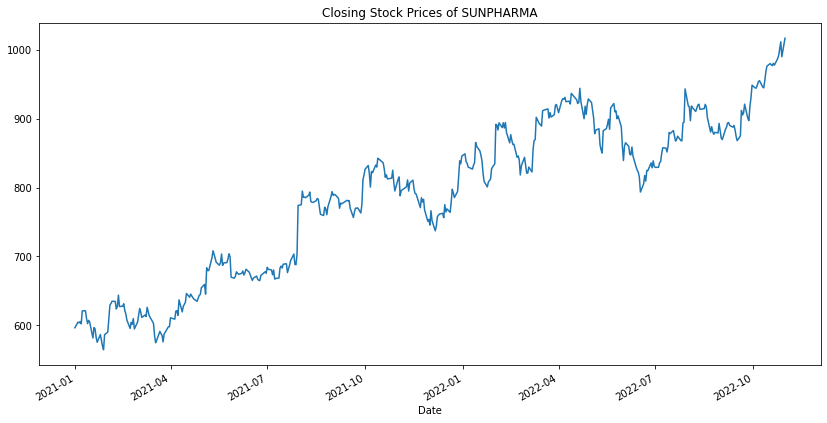

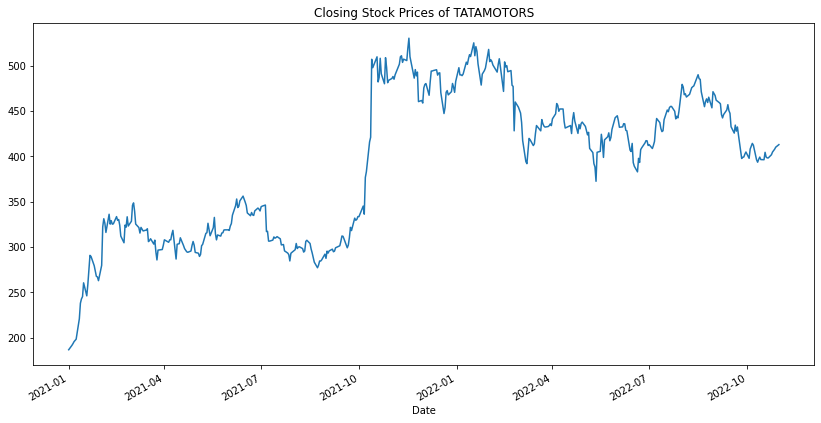

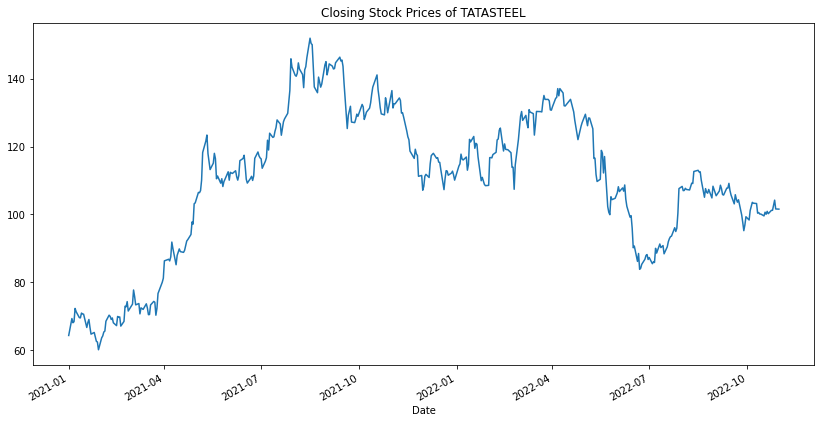

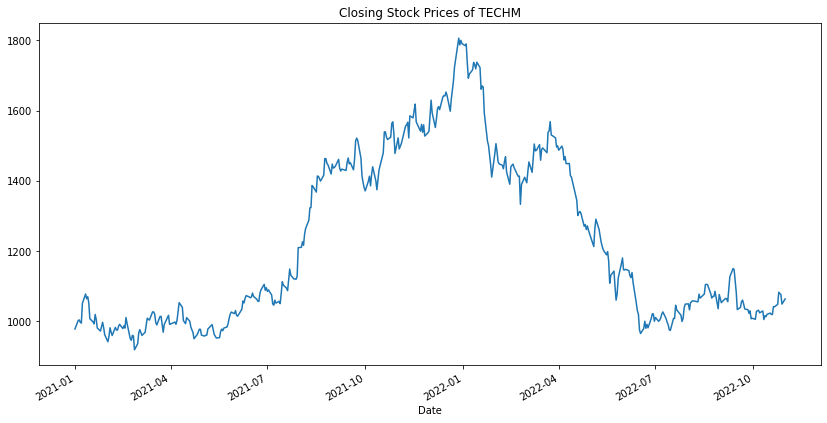

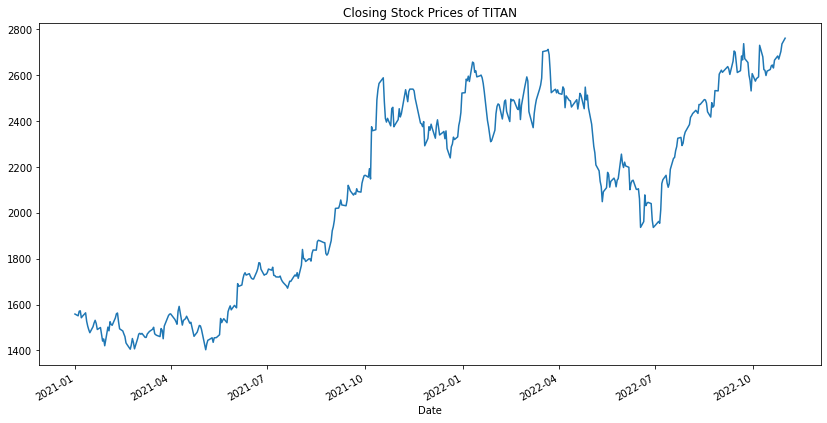

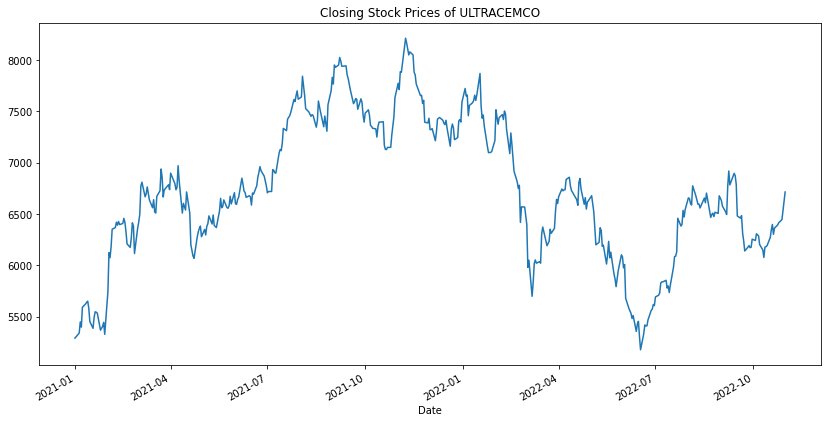

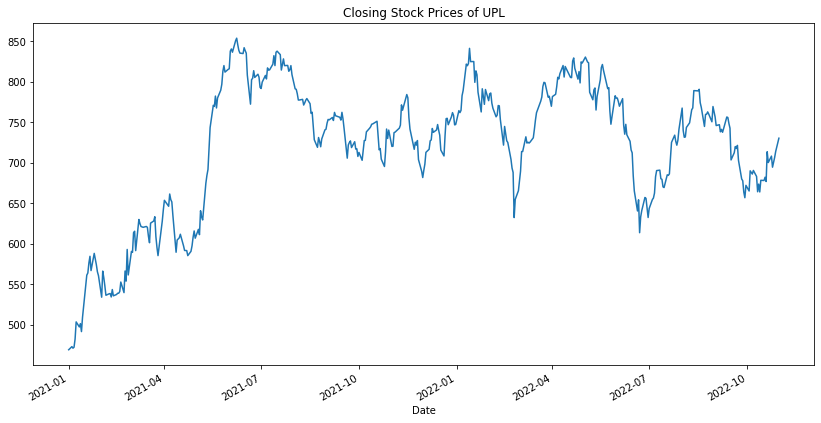

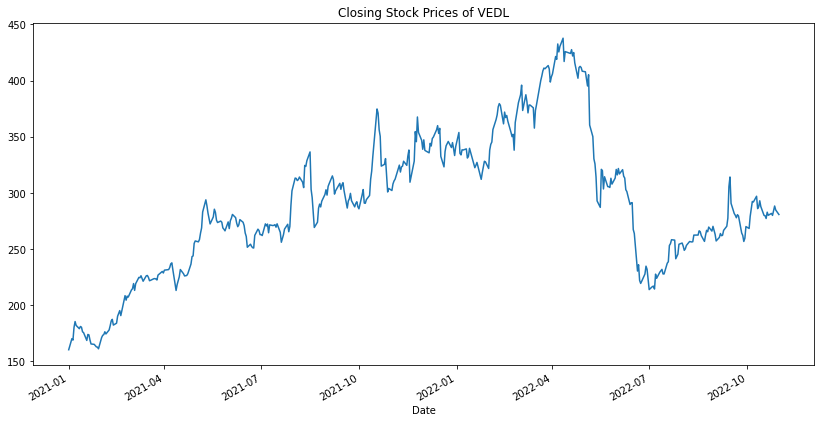

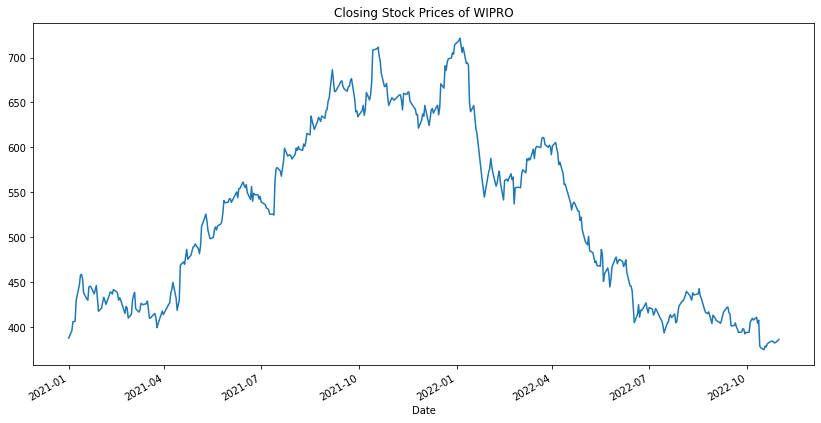

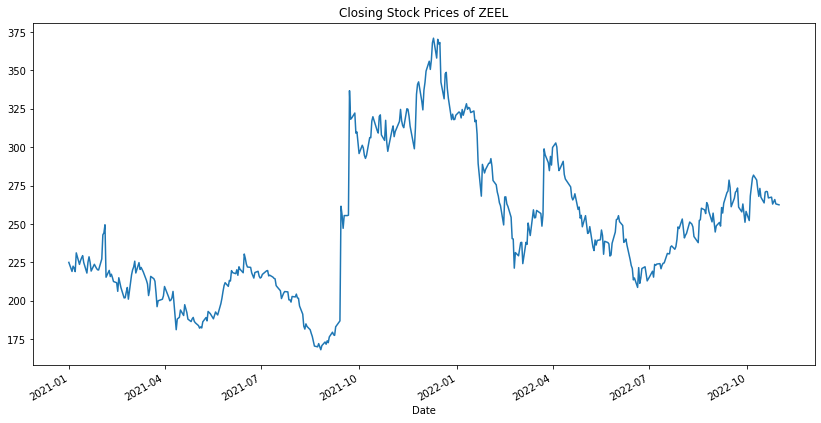

In [ ]:
for i in df2.columns:
  df2[i].plot(figsize=(14,7))
  plt.title("Closing Stock Prices of " + i)
  plt.show()

As we can observe from the plots that some of the companies stocks has decreased rapidly

In [ ]:
df2.index[-185]

Timestamp('2022-02-01 00:00:00')

Epoch 1/10
5/5 [==============================] - 4s 177ms/step - loss: 0.5116 - val_loss: 0.0355
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0467 - val_loss: 0.0566
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0744 - val_loss: 0.0286
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0223 - val_loss: 0.0625
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0261 - val_loss: 0.0830
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0274 - val_loss: 0.0536
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0142 - val_loss: 0.0282
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0125 - val_loss: 0.0220
Epoch 9/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0123 - val_loss: 0.0233
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of ADANIPORTS
MAE: 731.043559268107


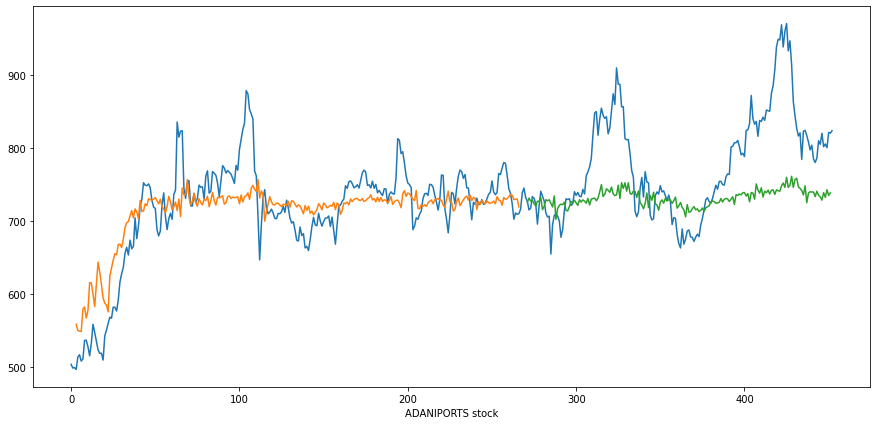

Epoch 1/10
5/5 [==============================] - 4s 162ms/step - loss: 0.8992 - val_loss: 0.2072
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0768 - val_loss: 0.0453
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 0.1079 - val_loss: 0.0856
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1137 - val_loss: 0.0469
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0562 - val_loss: 0.0181
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0221 - val_loss: 0.0209
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0172 - val_loss: 0.0245
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0151 - val_loss: 0.0167
Epoch 9/10
5/5 [==============================] - 0s 13ms/step - loss: 0.0096 - val_loss: 0.0107
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of ASIANPAINT
MAE: 3120.974011506965

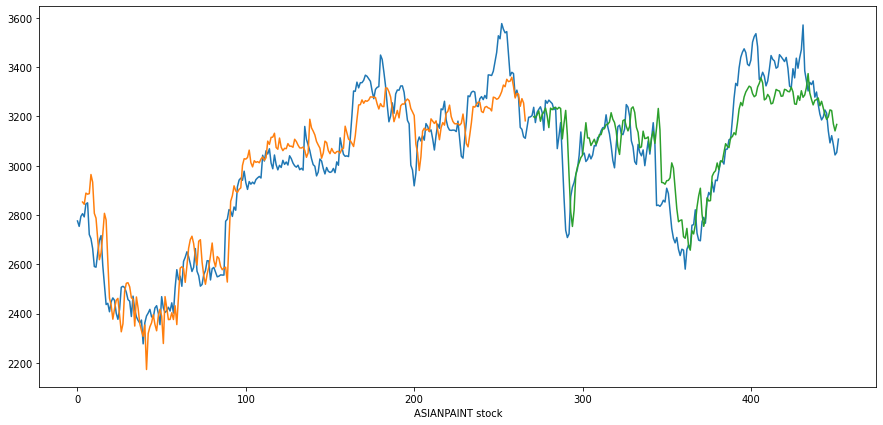

Epoch 1/10
5/5 [==============================] - 5s 159ms/step - loss: 0.0263 - val_loss: 0.0271
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0175 - val_loss: 0.0173
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0091 - val_loss: 0.0163
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0089 - val_loss: 0.0119
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0075 - val_loss: 0.0110
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0081 - val_loss: 0.0104
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0066 - val_loss: 0.0128
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0070 - val_loss: 0.0102
Epoch 9/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0060 - val_loss: 0.0098
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of AXISBANK
MAE: 726.2715756232112
R

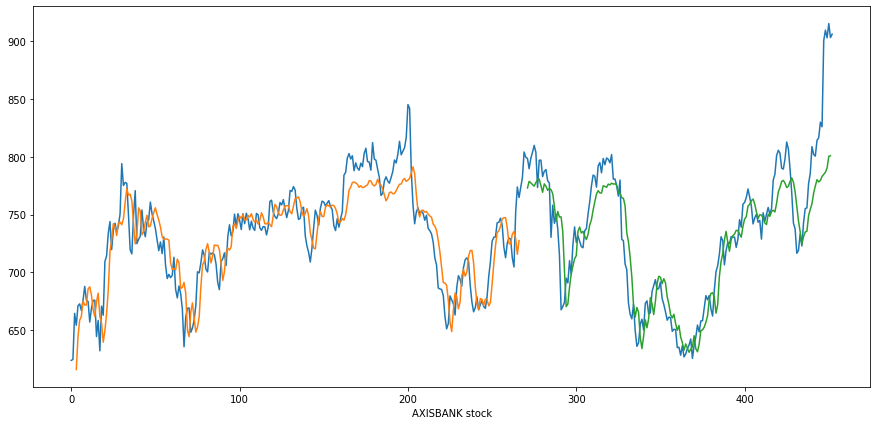

Epoch 1/10
5/5 [==============================] - 4s 160ms/step - loss: 0.5541 - val_loss: 0.0208
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0660 - val_loss: 0.1600
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1313 - val_loss: 0.1219
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0775 - val_loss: 0.0418
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0261 - val_loss: 0.0118
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0251 - val_loss: 0.0163
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0300 - val_loss: 0.0117
Epoch 8/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0190 - val_loss: 0.0100
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0137 - val_loss: 0.0144
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of BAJAJ-AUTO
MAE: 3828.603991772304

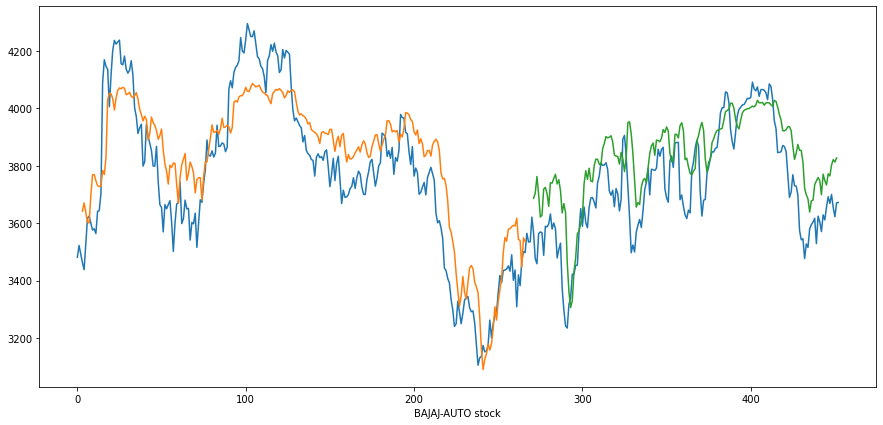

Epoch 1/10
5/5 [==============================] - 4s 157ms/step - loss: 0.4546 - val_loss: 0.0400
Epoch 2/10
5/5 [==============================] - 0s 14ms/step - loss: 0.1084 - val_loss: 0.1692
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.1010 - val_loss: 0.0216
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0212 - val_loss: 0.0291
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0325 - val_loss: 0.0198
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0139 - val_loss: 0.0058
Epoch 7/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0062 - val_loss: 0.0176
Epoch 8/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0092 - val_loss: 0.0108
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0042 - val_loss: 0.0031
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of BAJAJFINSV
MAE: 1481.741933482804

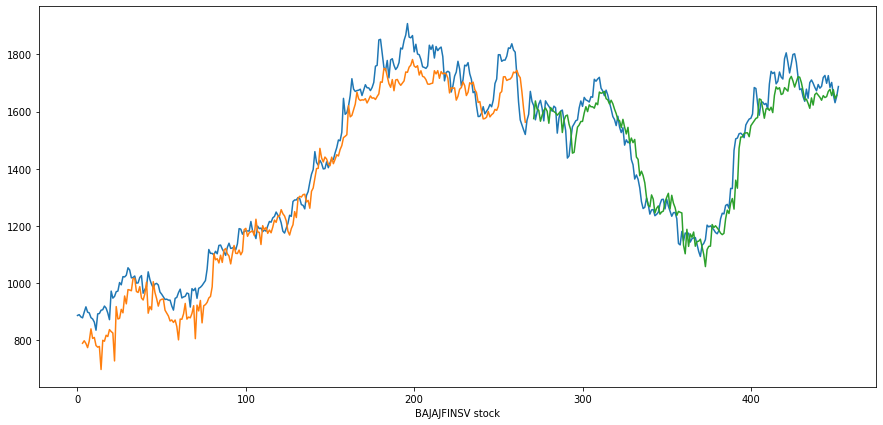

Epoch 1/10
5/5 [==============================] - 5s 168ms/step - loss: 0.3338 - val_loss: 0.2644
Epoch 2/10
5/5 [==============================] - 0s 15ms/step - loss: 0.2042 - val_loss: 0.0163
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0509 - val_loss: 0.0915
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0524 - val_loss: 0.0074
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0176 - val_loss: 0.0372
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0210 - val_loss: 0.0057
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0104 - val_loss: 0.0085
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0124 - val_loss: 0.0057
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0090 - val_loss: 0.0121
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of BAJFINANCE
MAE: 6723.590519949048

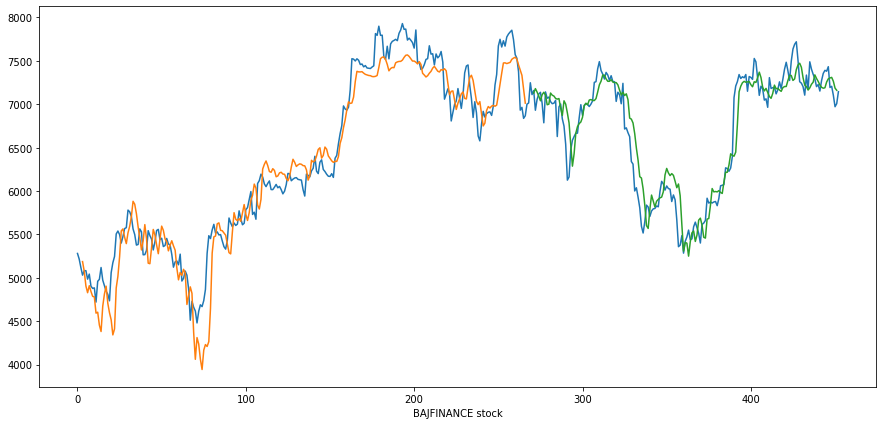

Epoch 1/10
5/5 [==============================] - 4s 166ms/step - loss: 0.0713 - val_loss: 0.0722
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0397 - val_loss: 0.0163
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0187 - val_loss: 0.0172
Epoch 4/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0057 - val_loss: 0.0145
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0095 - val_loss: 0.0029
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0039 - val_loss: 0.0112
Epoch 7/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 8/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 9/10
5/5 [==============================] - 0s 14ms/step - loss: 0.0025 - val_loss: 0.0071
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of BHARTIARTL
MAE: 708.7312029200673

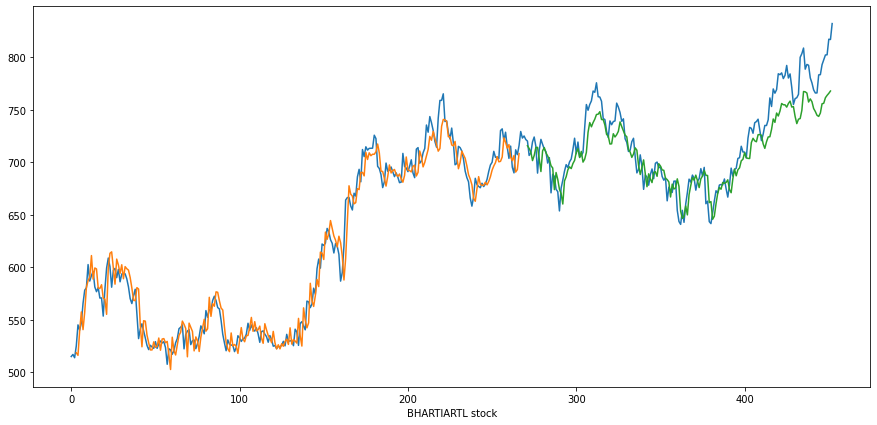

Epoch 1/10
5/5 [==============================] - 4s 165ms/step - loss: 0.2707 - val_loss: 0.0666
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0667 - val_loss: 0.1189
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0451 - val_loss: 0.0448
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0262 - val_loss: 0.0220
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0269 - val_loss: 0.0415
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0145 - val_loss: 0.0554
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0178 - val_loss: 0.0351
Epoch 8/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0100 - val_loss: 0.0174
Epoch 9/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0113 - val_loss: 0.0164
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of BPCL
MAE: 363.241199676483
RMSE: 

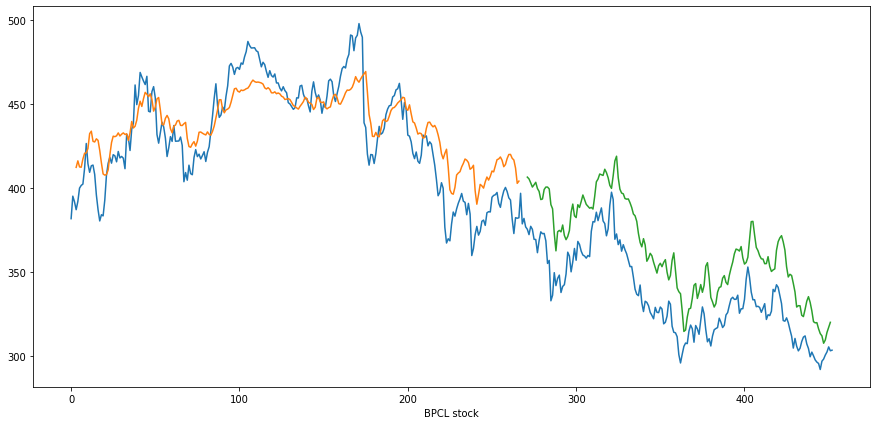

Epoch 1/10
5/5 [==============================] - 5s 176ms/step - loss: 0.3421 - val_loss: 0.3058
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.2175 - val_loss: 0.0194
Epoch 3/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0505 - val_loss: 0.0708
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0527 - val_loss: 0.0186
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0241 - val_loss: 0.0418
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0215 - val_loss: 0.0109
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0122 - val_loss: 0.0139
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0090 - val_loss: 0.0099
Epoch 9/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0076 - val_loss: 0.0099
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of BRITANNIA
MAE: 3512.766283098206


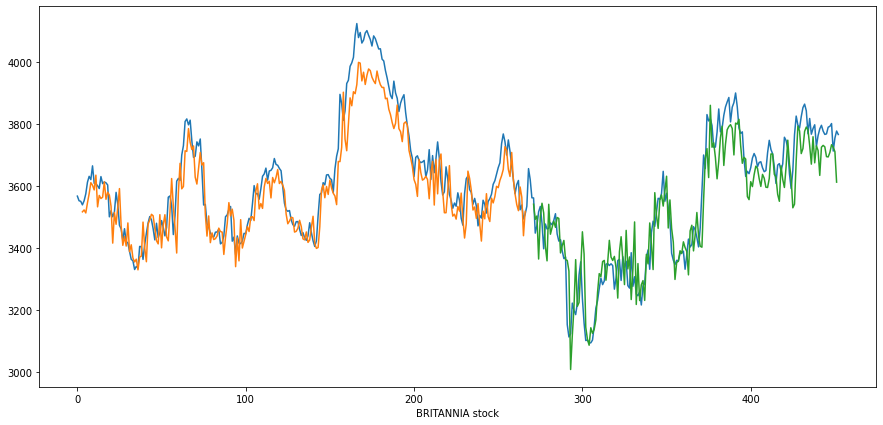

Epoch 1/10
5/5 [==============================] - 5s 180ms/step - loss: 0.0096 - val_loss: 0.0072
Epoch 2/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0057 - val_loss: 0.0393
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0038 - val_loss: 0.0072
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0031 - val_loss: 0.0210
Epoch 5/10
5/5 [==============================] - 0s 15ms/step - loss: 0.0030 - val_loss: 0.0110
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0099
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0021 - val_loss: 0.0150
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0020 - val_loss: 0.0105
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0021 - val_loss: 0.0166
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of CIPLA
MAE: 973.9611065822843
RMSE

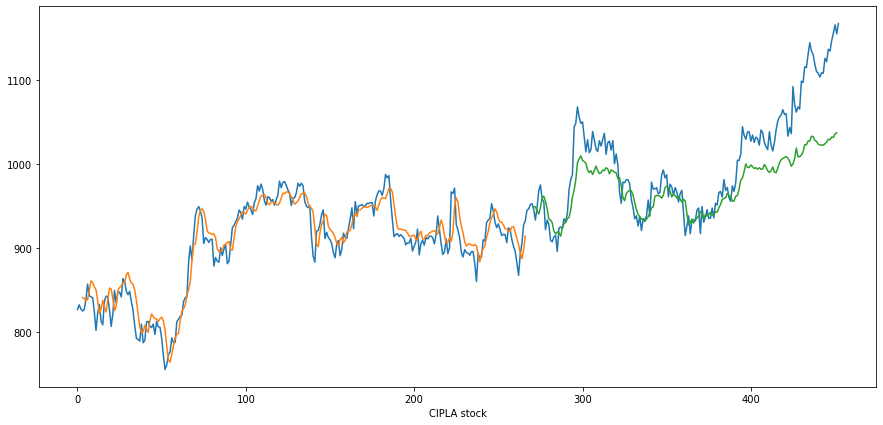

Epoch 1/10
5/5 [==============================] - 4s 168ms/step - loss: 0.0191 - val_loss: 0.1188
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0096 - val_loss: 0.0109
Epoch 3/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0054 - val_loss: 0.0590
Epoch 4/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0043 - val_loss: 0.0118
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0044 - val_loss: 0.0357
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0024 - val_loss: 0.0208
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0019 - val_loss: 0.0226
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0016 - val_loss: 0.0211
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0015 - val_loss: 0.0207
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of COALINDIA
MAE: 184.56696435060817

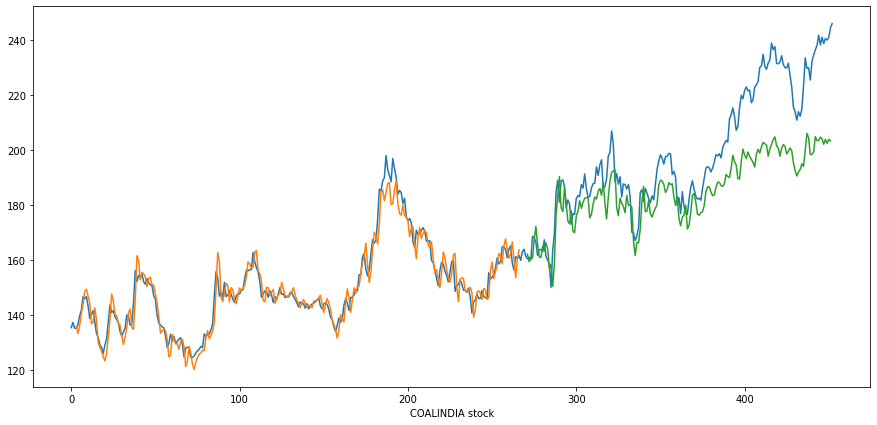

Epoch 1/10
5/5 [==============================] - 5s 172ms/step - loss: 0.1139 - val_loss: 0.1168
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0627 - val_loss: 0.0122
Epoch 3/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0334 - val_loss: 0.0034
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0238 - val_loss: 0.0270
Epoch 5/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0204 - val_loss: 0.0230
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0122 - val_loss: 0.0038
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0108 - val_loss: 0.0044
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0069 - val_loss: 0.0061
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0065 - val_loss: 0.0041
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of DRREDDY
MAE: 4192.66413328094
RMS

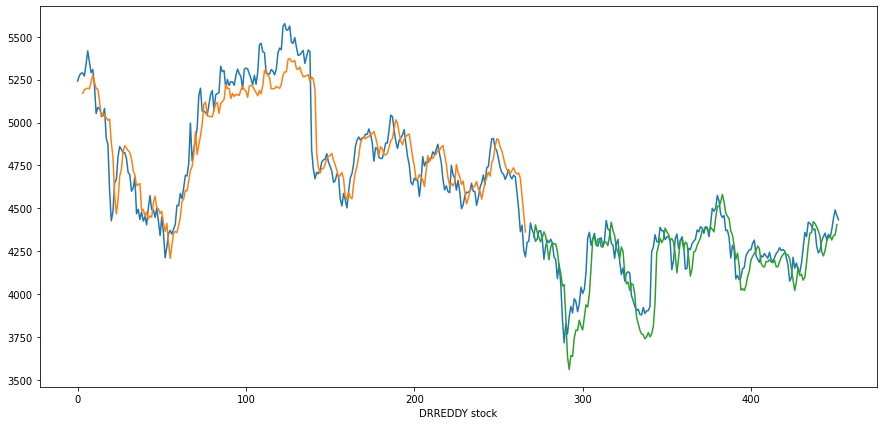

Epoch 1/10
5/5 [==============================] - 4s 158ms/step - loss: 0.0058 - val_loss: 0.0345
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0041 - val_loss: 0.0099
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0032 - val_loss: 0.0291
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0032 - val_loss: 0.0126
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0025 - val_loss: 0.0205
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0020 - val_loss: 0.0142
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.0189
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0018 - val_loss: 0.0158
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0017 - val_loss: 0.0182
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of EICHERMOT
MAE: 2804.426145780482


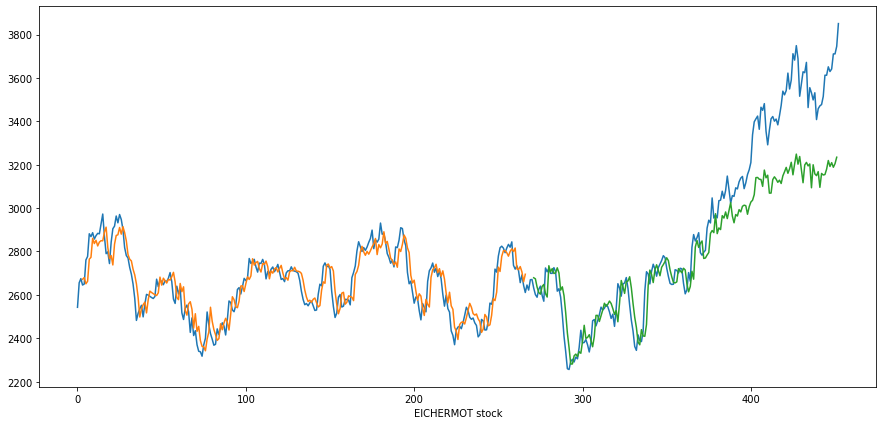

Epoch 1/10
5/5 [==============================] - 4s 166ms/step - loss: 1.2608 - val_loss: 0.1910
Epoch 2/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1116 - val_loss: 0.1737
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1665 - val_loss: 0.1637
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1048 - val_loss: 0.0805
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0600 - val_loss: 0.0706
Epoch 6/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0626 - val_loss: 0.0695
Epoch 7/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0601 - val_loss: 0.0602
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0485 - val_loss: 0.0499
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0385 - val_loss: 0.0446
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of GAIL
MAE: 97.10883342581523
RMSE:

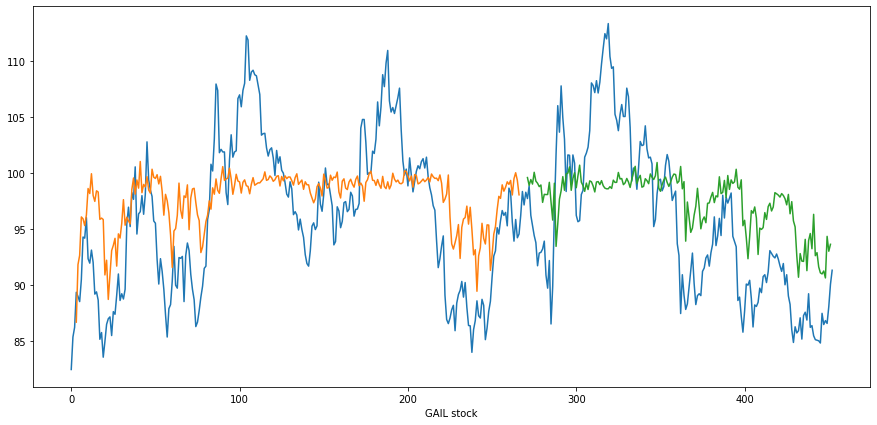

Epoch 1/10
5/5 [==============================] - 4s 157ms/step - loss: 0.5841 - val_loss: 0.0244
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0631 - val_loss: 0.0746
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.1076 - val_loss: 0.0402
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0636 - val_loss: 0.0248
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0443 - val_loss: 0.0313
Epoch 6/10
5/5 [==============================] - 0s 16ms/step - loss: 0.0406 - val_loss: 0.0370
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0394 - val_loss: 0.0370
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0366 - val_loss: 0.0336
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0324 - val_loss: 0.0276
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of GRASIM
MAE: 1508.182280572472
RMS

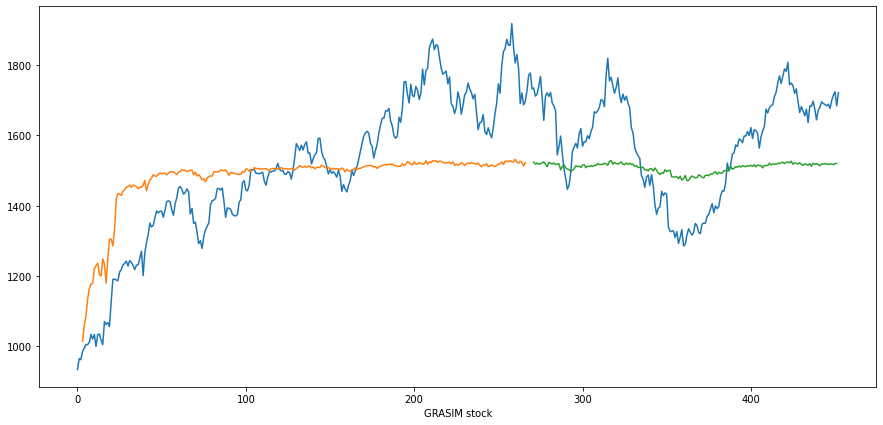

Epoch 1/10
5/5 [==============================] - 4s 156ms/step - loss: 0.0541 - val_loss: 0.0168
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0184 - val_loss: 0.0153
Epoch 3/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0098 - val_loss: 0.0090
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0083 - val_loss: 0.0049
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0063 - val_loss: 0.0062
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0065 - val_loss: 0.0055
Epoch 8/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0074 - val_loss: 0.0056
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0046 - val_loss: 0.0034
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of HCLTECH
MAE: 1043.8712473571584
R

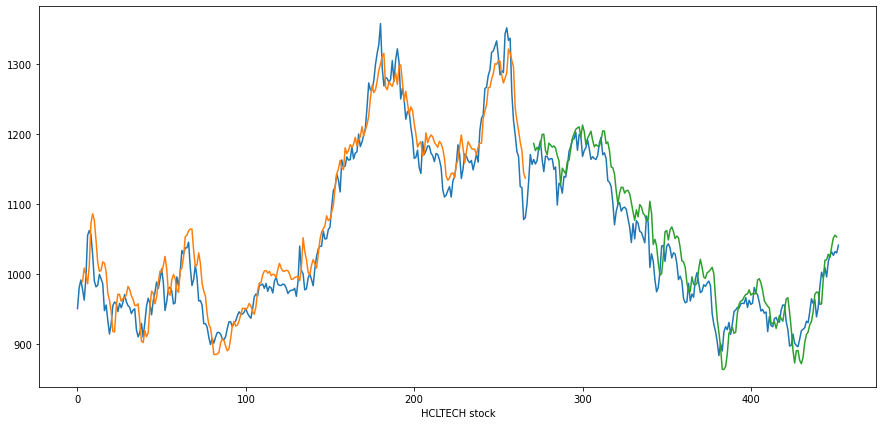

Epoch 1/10
5/5 [==============================] - 4s 166ms/step - loss: 1.1592 - val_loss: 0.2006
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.2224 - val_loss: 0.5180
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.2620 - val_loss: 0.2914
Epoch 4/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0659 - val_loss: 0.0937
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0330 - val_loss: 0.0332
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0506 - val_loss: 0.0331
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0296 - val_loss: 0.0569
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0173 - val_loss: 0.0789
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0200 - val_loss: 0.0753
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of HDFC
MAE: 2523.5308927984393
RMSE

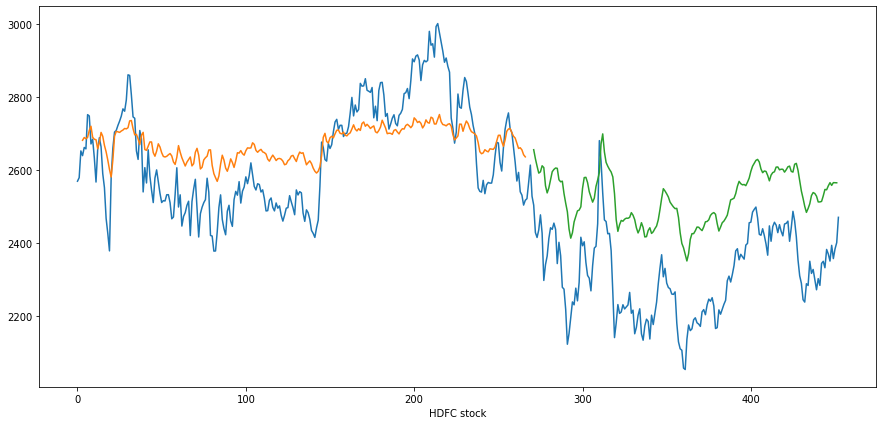

Epoch 1/10
5/5 [==============================] - 5s 164ms/step - loss: 1.9930 - val_loss: 0.0782
Epoch 2/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1078 - val_loss: 0.2438
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1138 - val_loss: 0.3097
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0986 - val_loss: 0.2080
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0481 - val_loss: 0.1215
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0480 - val_loss: 0.0946
Epoch 7/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0542 - val_loss: 0.0960
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0453 - val_loss: 0.1164
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0371 - val_loss: 0.1372
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of HDFCBANK
MAE: 1546.489727886472
R

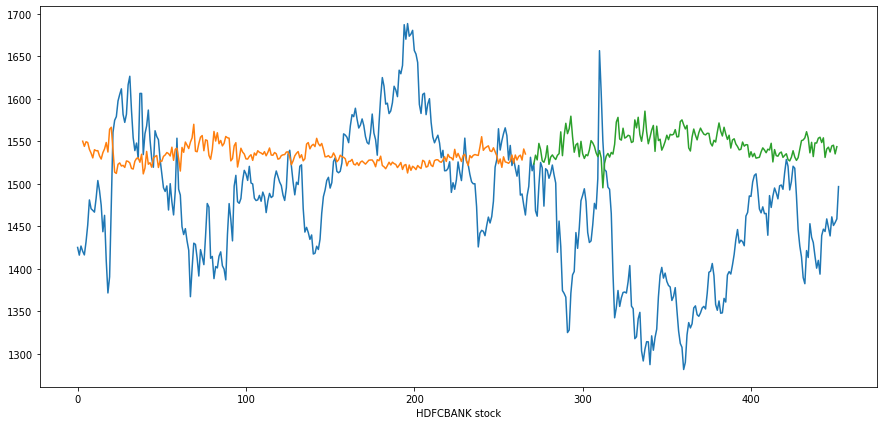

Epoch 1/10
5/5 [==============================] - 4s 162ms/step - loss: 0.0232 - val_loss: 0.0251
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0143 - val_loss: 0.0144
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0097 - val_loss: 0.0107
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0061 - val_loss: 0.0101
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0048 - val_loss: 0.0069
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0037 - val_loss: 0.0077
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0033 - val_loss: 0.0052
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of HEROMOTOCO
MAE: 2576.990196892346

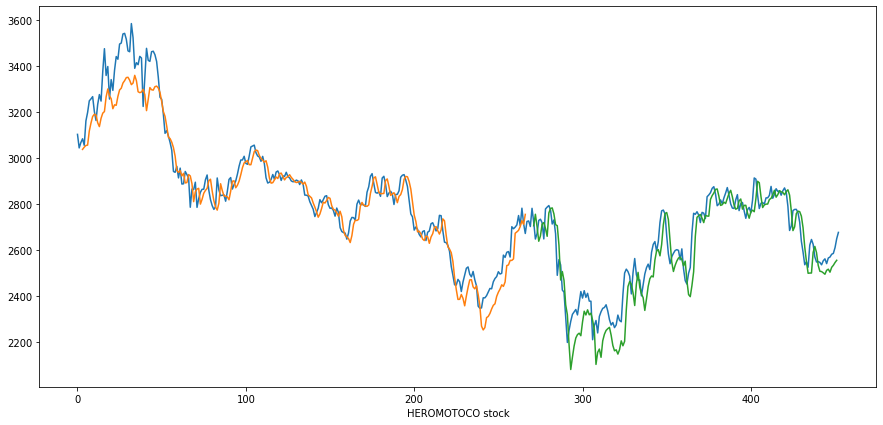

Epoch 1/10
5/5 [==============================] - 4s 158ms/step - loss: 0.0138 - val_loss: 0.0161
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0070 - val_loss: 0.0218
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0051 - val_loss: 0.0099
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0035 - val_loss: 0.0082
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0026 - val_loss: 0.0094
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0026 - val_loss: 0.0066
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0024 - val_loss: 0.0064
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0021 - val_loss: 0.0062
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0020 - val_loss: 0.0061
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of HINDALCO
MAE: 438.8776470798083
R

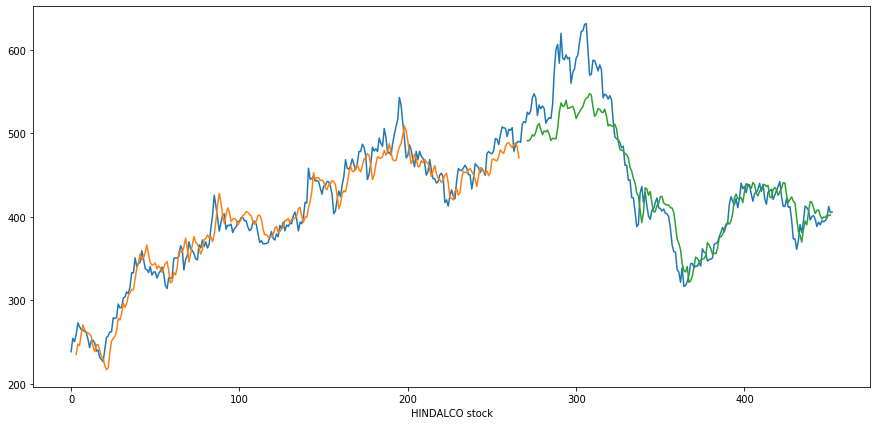

Epoch 1/10
5/5 [==============================] - 5s 161ms/step - loss: 0.0434 - val_loss: 0.0293
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0218 - val_loss: 0.0284
Epoch 3/10
5/5 [==============================] - 0s 27ms/step - loss: 0.0175 - val_loss: 0.0124
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0142 - val_loss: 0.0079
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0071 - val_loss: 0.0121
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0053 - val_loss: 0.0093
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0048 - val_loss: 0.0144
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0044 - val_loss: 0.0125
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0045 - val_loss: 0.0158
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of HINDUNILVR
MAE: 2340.662401319964

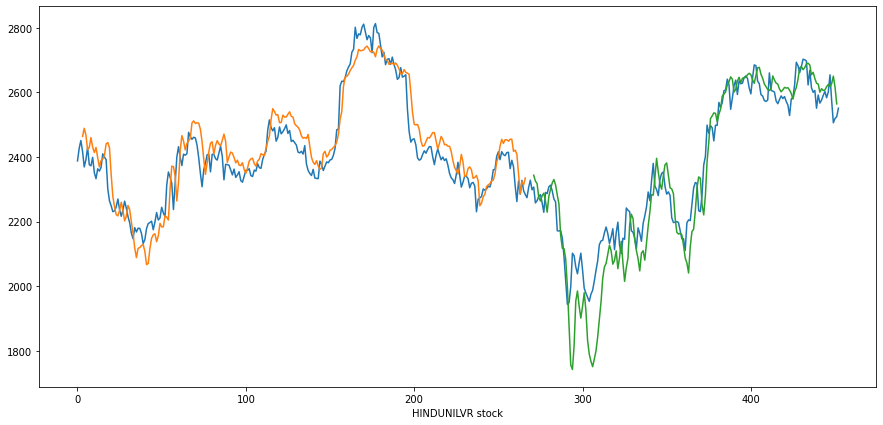

Epoch 1/10
5/5 [==============================] - 4s 158ms/step - loss: 0.0160 - val_loss: 0.0218
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0090 - val_loss: 0.0311
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0074 - val_loss: 0.0160
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0036 - val_loss: 0.0101
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0040 - val_loss: 0.0114
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0034 - val_loss: 0.0098
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0025 - val_loss: 0.0091
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0022 - val_loss: 0.0108
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0019 - val_loss: 0.0069
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of ICICIBANK
MAE: 765.3784809300128


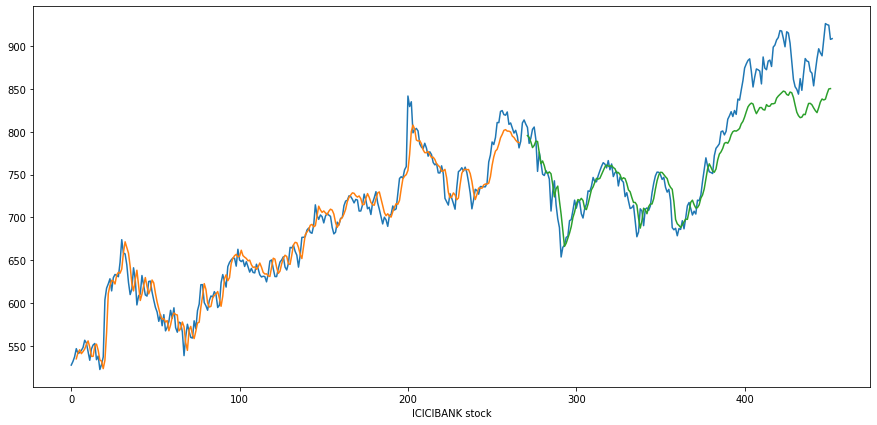

Epoch 1/10
5/5 [==============================] - 4s 161ms/step - loss: 0.1038 - val_loss: 0.0961
Epoch 2/10
5/5 [==============================] - 0s 25ms/step - loss: 0.0693 - val_loss: 0.0394
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0329 - val_loss: 0.0540
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0284 - val_loss: 0.0270
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0235 - val_loss: 0.0261
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0216 - val_loss: 0.0212
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0165 - val_loss: 0.0277
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0173 - val_loss: 0.0173
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0137 - val_loss: 0.0151
Epoch 10/10
6/6 [==============================] - 0s 6ms/step
Results of sklearn.metrics of INDUSINDBK
MAE: 954.0841455210578

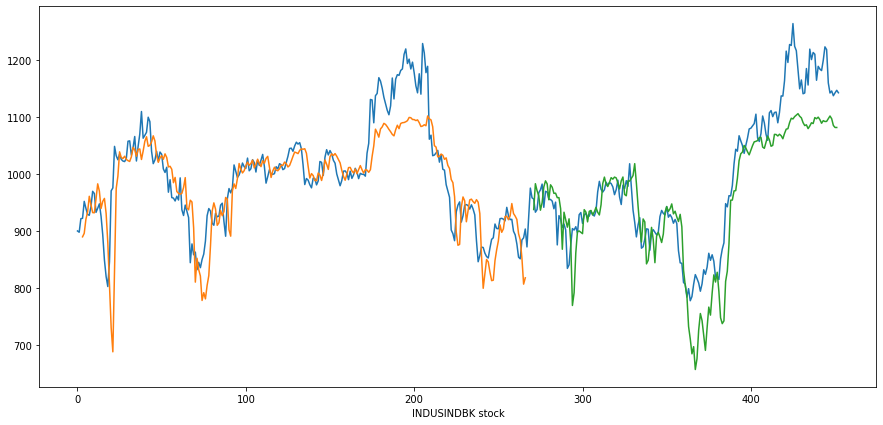

Epoch 1/10
5/5 [==============================] - 4s 163ms/step - loss: 0.0185 - val_loss: 0.0108
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0065 - val_loss: 0.0063
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0040 - val_loss: 0.0115
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0042 - val_loss: 0.0053
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0041 - val_loss: 0.0069
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0034 - val_loss: 0.0057
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0030 - val_loss: 0.0051
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0026 - val_loss: 0.0060
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0025 - val_loss: 0.0038
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of INFY
MAE: 1592.9680743088315
RMSE

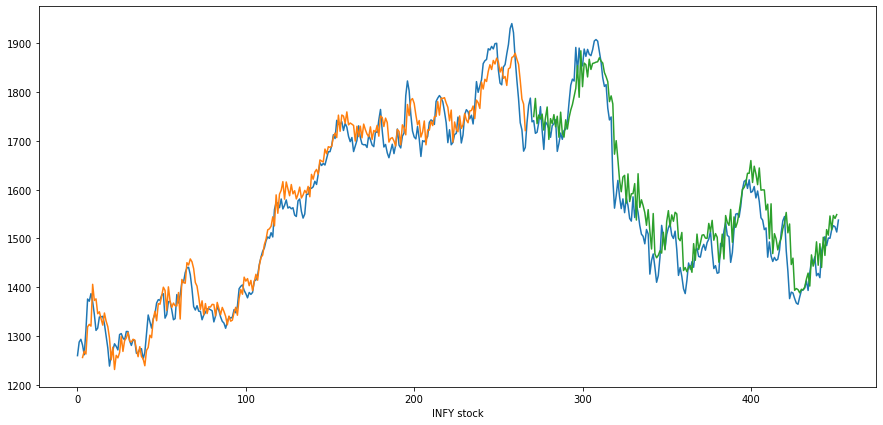

Epoch 1/10
5/5 [==============================] - 4s 160ms/step - loss: 0.0714 - val_loss: 0.0464
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0336 - val_loss: 0.0126
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0243 - val_loss: 0.0149
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0174 - val_loss: 0.0055
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0128 - val_loss: 0.0060
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.0124 - val_loss: 0.0098
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0075 - val_loss: 0.0047
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0085 - val_loss: 0.0080
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0062 - val_loss: 0.0042
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of IOC
MAE: 76.49713409473742
RMSE: 

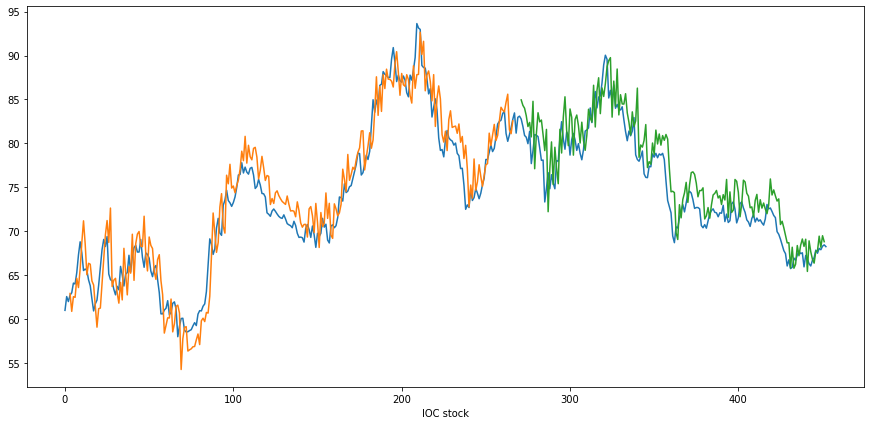

Epoch 1/10
5/5 [==============================] - 4s 157ms/step - loss: 0.0058 - val_loss: 0.1213
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0023 - val_loss: 0.0402
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0027 - val_loss: 0.0729
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0016 - val_loss: 0.0577
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 0.0877
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 9.8294e-04 - val_loss: 0.0768
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 9.2570e-04 - val_loss: 0.0836
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 9.4264e-04 - val_loss: 0.0748
Epoch 9/10
5/5 [==============================] - 0s 23ms/step - loss: 9.5484e-04 - val_loss: 0.0704
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of ITC
MAE: 252.2276

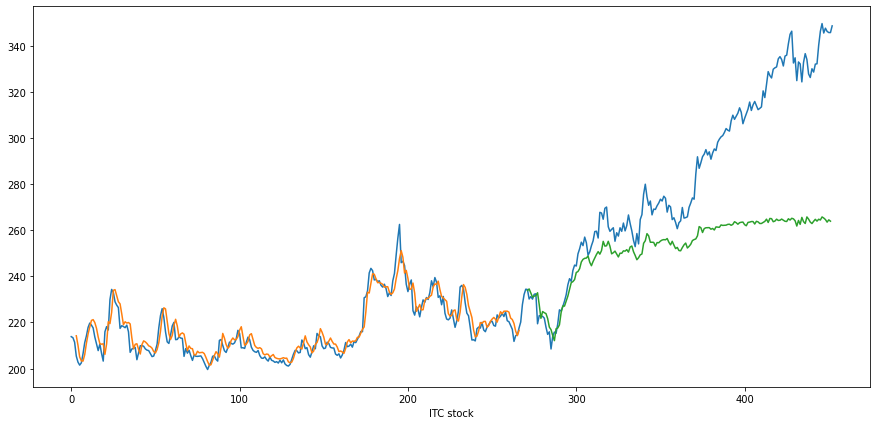

Epoch 1/10
5/5 [==============================] - 4s 158ms/step - loss: 0.1154 - val_loss: 0.1117
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0304 - val_loss: 0.0270
Epoch 3/10
5/5 [==============================] - 0s 33ms/step - loss: 0.0361 - val_loss: 0.0149
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0090 - val_loss: 0.0322
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0139 - val_loss: 0.0318
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0075 - val_loss: 0.0119
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0074 - val_loss: 0.0106
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0064 - val_loss: 0.0158
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0058 - val_loss: 0.0201
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of JSWSTEEL
MAE: 661.5299401590523
R

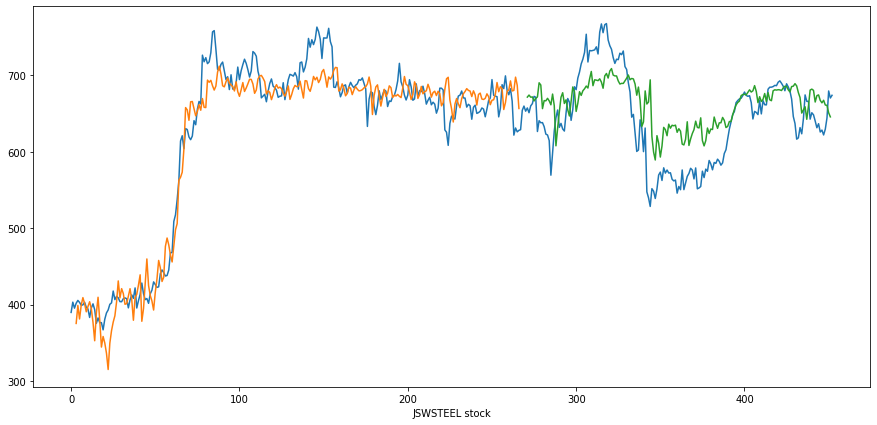

Epoch 1/10
5/5 [==============================] - 4s 156ms/step - loss: 0.1624 - val_loss: 0.0809
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0901 - val_loss: 0.0877
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0475 - val_loss: 0.0080
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0204 - val_loss: 0.0108
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0241 - val_loss: 0.0051
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0106 - val_loss: 0.0141
Epoch 7/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0133 - val_loss: 0.0097
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0089 - val_loss: 0.0060
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0103 - val_loss: 0.0061
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of KOTAKBANK
MAE: 1825.3661255410539

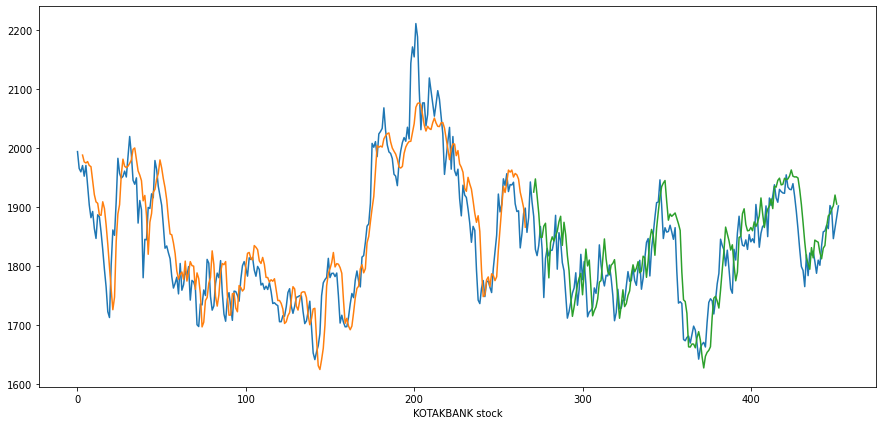

Epoch 1/10
5/5 [==============================] - 4s 156ms/step - loss: 0.0221 - val_loss: 0.0073
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0077 - val_loss: 0.0073
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0061 - val_loss: 0.0084
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0046 - val_loss: 0.0055
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0045 - val_loss: 0.0037
Epoch 8/10
5/5 [==============================] - 0s 26ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 9/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of LT
MAE: 1772.7374337879523
RMSE: 

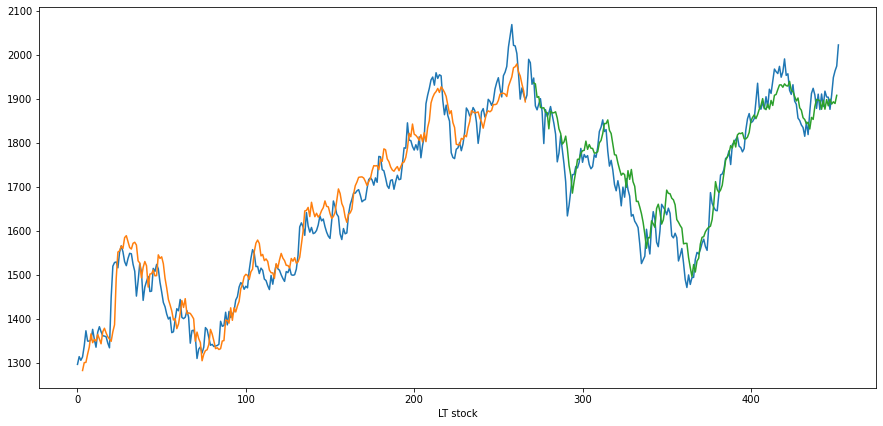

Epoch 1/10
5/5 [==============================] - 5s 170ms/step - loss: 0.0123 - val_loss: 0.1565
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0048 - val_loss: 0.0863
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0034 - val_loss: 0.1054
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0027 - val_loss: 0.0859
Epoch 5/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0023 - val_loss: 0.0944
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0020 - val_loss: 0.0921
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0019 - val_loss: 0.0887
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0019 - val_loss: 0.1081
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0019 - val_loss: 0.0896
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of M&M
MAE: 887.1203434430532
RMSE: 

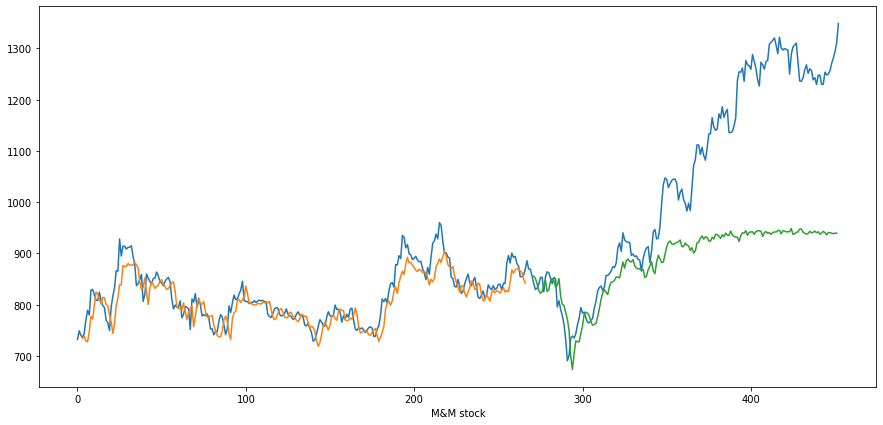

Epoch 1/10
5/5 [==============================] - 4s 156ms/step - loss: 0.0977 - val_loss: 0.0742
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0157 - val_loss: 0.0235
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0264 - val_loss: 0.0312
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0115 - val_loss: 0.0665
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0092 - val_loss: 0.0816
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0095 - val_loss: 0.0596
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0066 - val_loss: 0.0404
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0061 - val_loss: 0.0325
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0061 - val_loss: 0.0328
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of MARUTI
MAE: 7845.150221407153
RMS

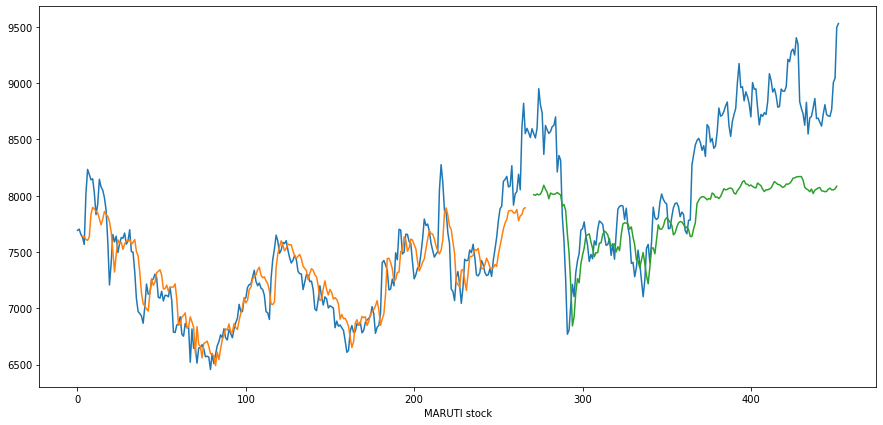

Epoch 1/10
5/5 [==============================] - 4s 160ms/step - loss: 1.4331 - val_loss: 0.4207
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.2226 - val_loss: 0.1770
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.2203 - val_loss: 0.2130
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1583 - val_loss: 0.0648
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0510 - val_loss: 0.0330
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0461 - val_loss: 0.0321
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0304 - val_loss: 0.0161
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0177 - val_loss: 0.0190
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0168 - val_loss: 0.0157
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of NESTLEIND
MAE: 18316.269034674016

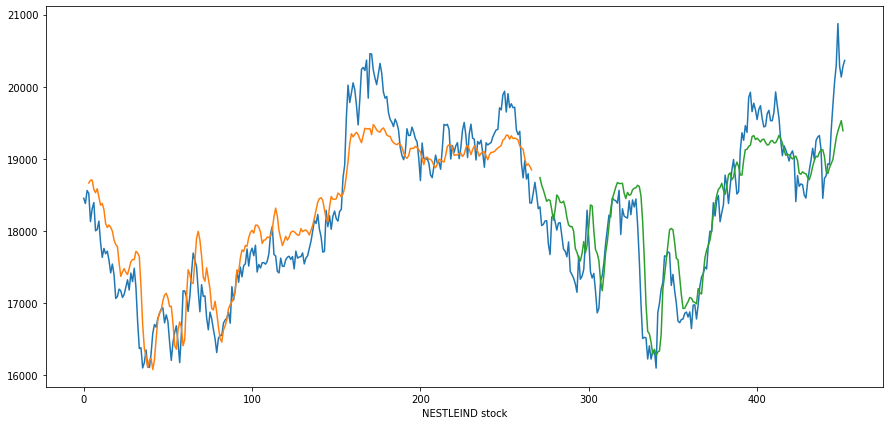

Epoch 1/10
5/5 [==============================] - 5s 164ms/step - loss: 0.1307 - val_loss: 0.1053
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0122 - val_loss: 0.0346
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0277 - val_loss: 0.0342
Epoch 4/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0241 - val_loss: 0.0536
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0134 - val_loss: 0.0792
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0088 - val_loss: 0.0984
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0091 - val_loss: 0.1004
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0086 - val_loss: 0.0845
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0063 - val_loss: 0.0631
Epoch 10/10
6/6 [==============================] - 0s 3ms/step
Results of sklearn.metrics of NTPC
MAE: 134.07390238097958
RMSE

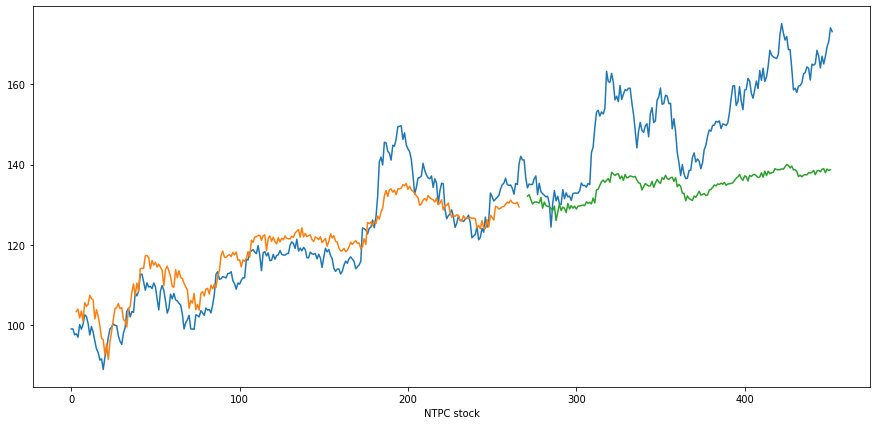

Epoch 1/10
5/5 [==============================] - 4s 158ms/step - loss: 0.0181 - val_loss: 0.0084
Epoch 2/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0057 - val_loss: 0.0149
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0037 - val_loss: 0.0085
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0043 - val_loss: 0.0049
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0038 - val_loss: 0.0046
Epoch 6/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0024 - val_loss: 0.0072
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0026 - val_loss: 0.0052
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0025 - val_loss: 0.0053
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of ONGC
MAE: 144.709171759075
RMSE: 

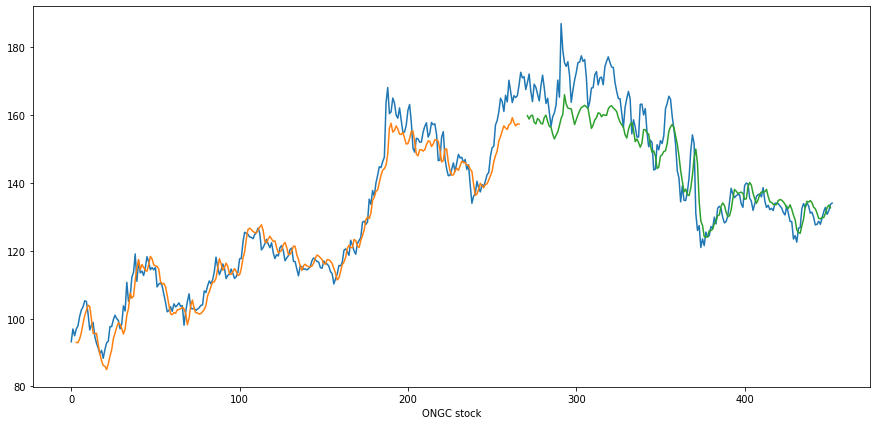

Epoch 1/10
5/5 [==============================] - 4s 157ms/step - loss: 0.2278 - val_loss: 0.2110
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 0.1159 - val_loss: 0.1115
Epoch 3/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0158 - val_loss: 0.0191
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0367 - val_loss: 0.0087
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0108 - val_loss: 0.0541
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0120 - val_loss: 0.0755
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0080 - val_loss: 0.0186
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0060 - val_loss: 0.0095
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0054 - val_loss: 0.0246
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of POWERGRID
MAE: 199.34399554763442

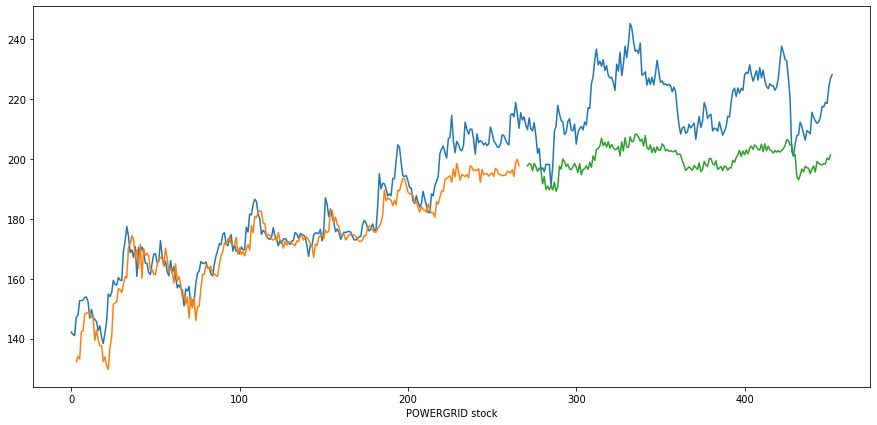

Epoch 1/10
5/5 [==============================] - 5s 174ms/step - loss: 0.1235 - val_loss: 0.0152
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0617 - val_loss: 0.0178
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0450 - val_loss: 0.0172
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0118 - val_loss: 0.0510
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0170 - val_loss: 0.0359
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0097 - val_loss: 0.0144
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0085 - val_loss: 0.0108
Epoch 8/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0085 - val_loss: 0.0124
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0071 - val_loss: 0.0159
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of RELIANCE
MAE: 2439.3041258980425


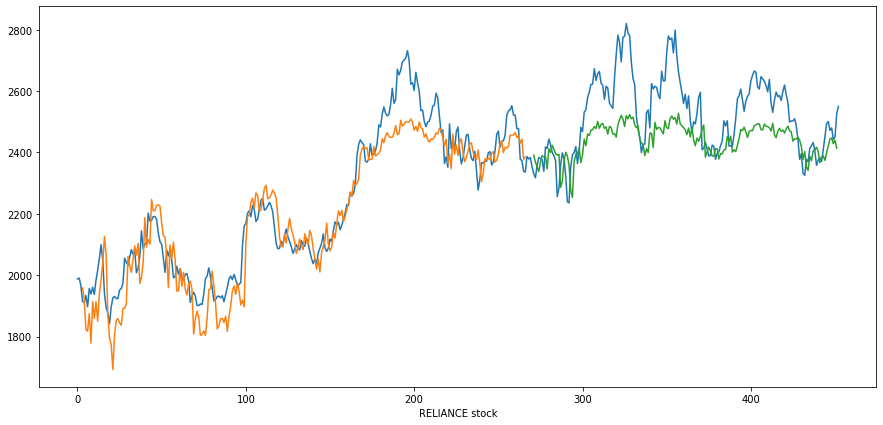

Epoch 1/10
5/5 [==============================] - 4s 161ms/step - loss: 0.0203 - val_loss: 0.0765
Epoch 2/10
5/5 [==============================] - 0s 29ms/step - loss: 0.0170 - val_loss: 0.0074
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0140 - val_loss: 0.0146
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0065 - val_loss: 0.0274
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0065 - val_loss: 0.0115
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0062 - val_loss: 0.0141
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0051 - val_loss: 0.0179
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0047 - val_loss: 0.0110
Epoch 9/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0044 - val_loss: 0.0137
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of SBIN
MAE: 485.6473687718399
RMSE:

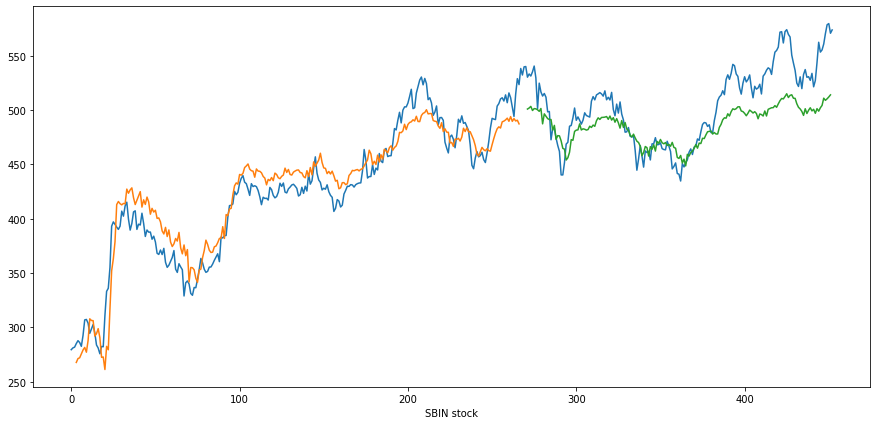

Epoch 1/10
5/5 [==============================] - 4s 166ms/step - loss: 0.5834 - val_loss: 0.0558
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0567 - val_loss: 0.2245
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0994 - val_loss: 0.1581
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0393 - val_loss: 0.0747
Epoch 5/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0105 - val_loss: 0.0333
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0102 - val_loss: 0.0190
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0139 - val_loss: 0.0176
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0124 - val_loss: 0.0228
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0091 - val_loss: 0.0312
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of SHREECEM
MAE: 24659.971517584163


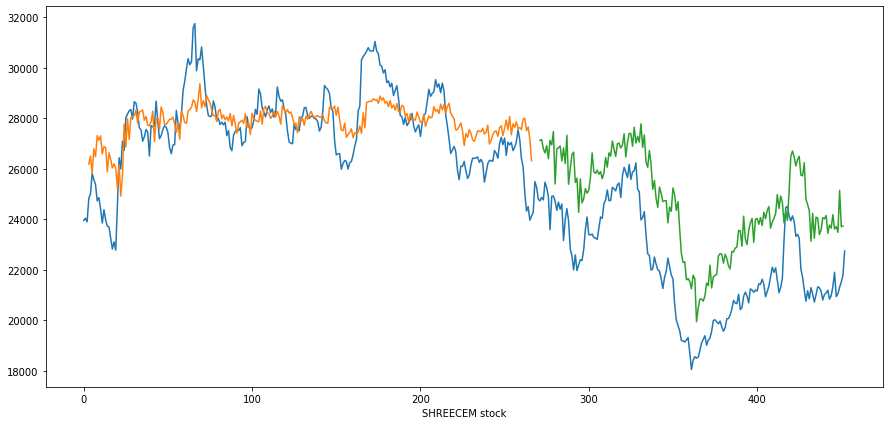

Epoch 1/10
5/5 [==============================] - 5s 161ms/step - loss: 0.4244 - val_loss: 0.0552
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.2070 - val_loss: 0.0256
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0469 - val_loss: 0.1799
Epoch 4/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0487 - val_loss: 0.2241
Epoch 5/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0284 - val_loss: 0.0298
Epoch 6/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0090 - val_loss: 0.0046
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0144 - val_loss: 0.0107
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0026 - val_loss: 0.0439
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0072 - val_loss: 0.0369
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of SUNPHARMA
MAE: 850.0922222681126


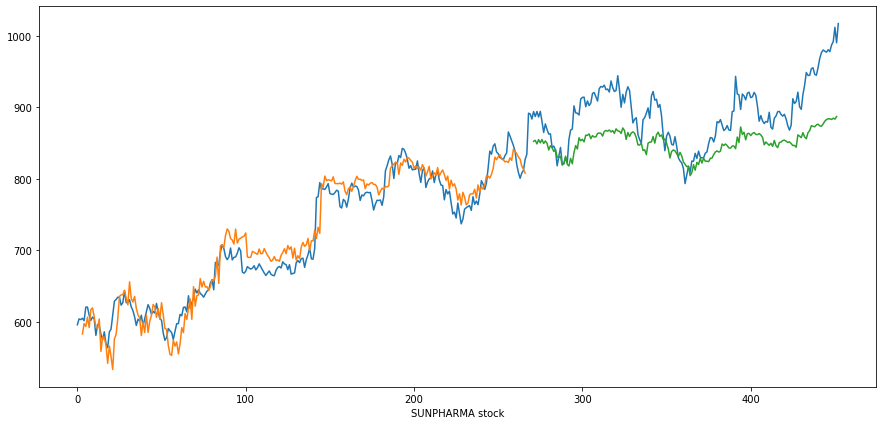

Epoch 1/10
5/5 [==============================] - 4s 165ms/step - loss: 0.6766 - val_loss: 0.1002
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0663 - val_loss: 0.0756
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1514 - val_loss: 0.0320
Epoch 4/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0665 - val_loss: 0.0218
Epoch 5/10
5/5 [==============================] - 0s 17ms/step - loss: 0.0400 - val_loss: 0.0720
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0423 - val_loss: 0.0405
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0264 - val_loss: 0.0170
Epoch 8/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0218 - val_loss: 0.0097
Epoch 9/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0203 - val_loss: 0.0062
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of TATAMOTORS
MAE: 419.8728198669022

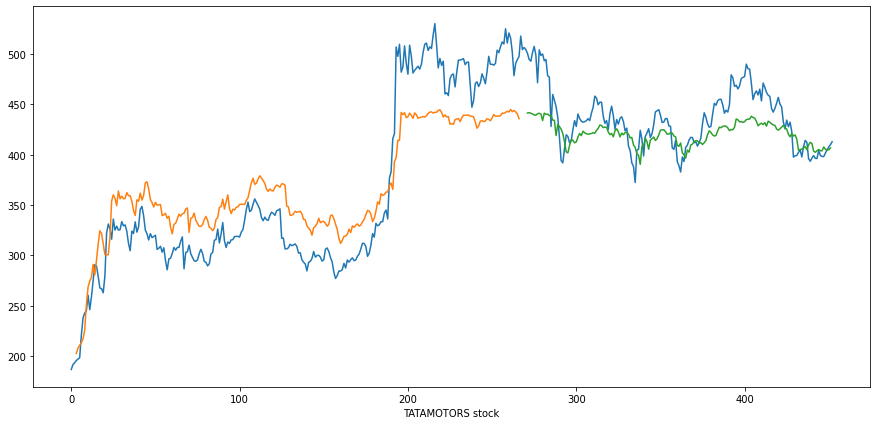

Epoch 1/10
5/5 [==============================] - 4s 160ms/step - loss: 0.9887 - val_loss: 0.0843
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0787 - val_loss: 0.0935
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.1066 - val_loss: 0.1110
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.1036 - val_loss: 0.0886
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0747 - val_loss: 0.0534
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0396 - val_loss: 0.0210
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0179 - val_loss: 0.0090
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0179 - val_loss: 0.0103
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0174 - val_loss: 0.0066
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of TATASTEEL
MAE: 114.04403297528188

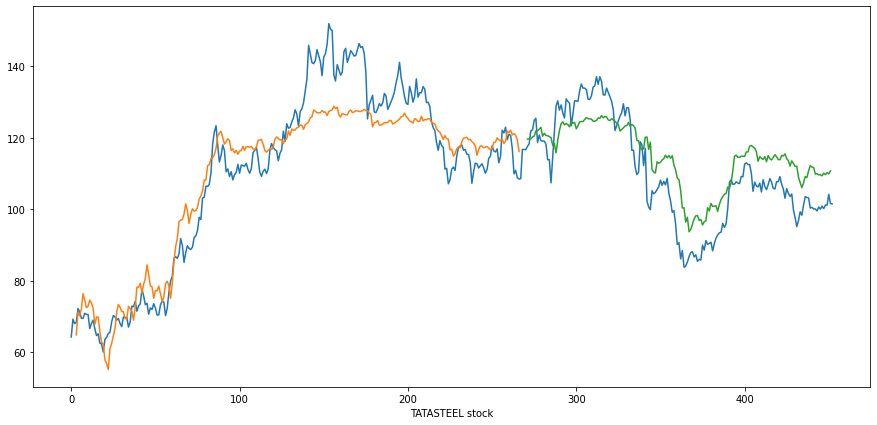

Epoch 1/10
5/5 [==============================] - 5s 164ms/step - loss: 0.7405 - val_loss: 0.0885
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1443 - val_loss: 0.2791
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.1499 - val_loss: 0.0682
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0247 - val_loss: 0.0080
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0352 - val_loss: 0.0086
Epoch 6/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0181 - val_loss: 0.0106
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0107 - val_loss: 0.0255
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0137 - val_loss: 0.0206
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0103 - val_loss: 0.0108
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of TECHM
MAE: 1205.791354172489
RMSE

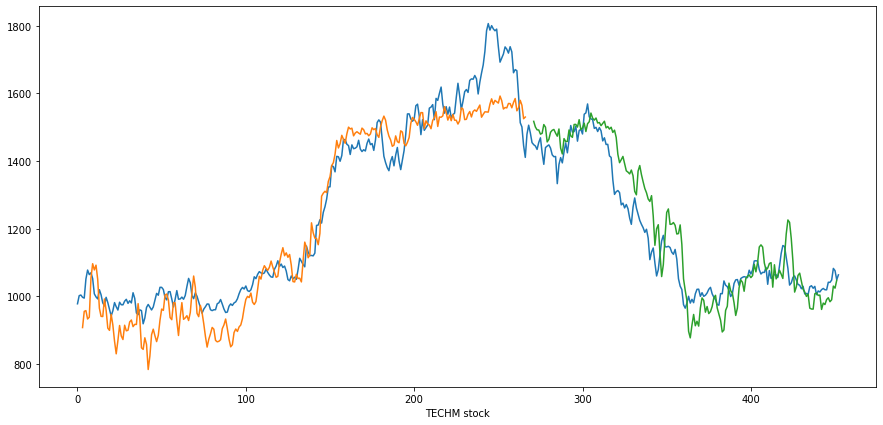

Epoch 1/10
5/5 [==============================] - 4s 165ms/step - loss: 0.0183 - val_loss: 0.0177
Epoch 2/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0068 - val_loss: 0.0078
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0053 - val_loss: 0.0066
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0034 - val_loss: 0.0081
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0030 - val_loss: 0.0070
Epoch 6/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0033 - val_loss: 0.0080
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0043 - val_loss: 0.0052
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of TITAN
MAE: 2325.2058255977786
RMS

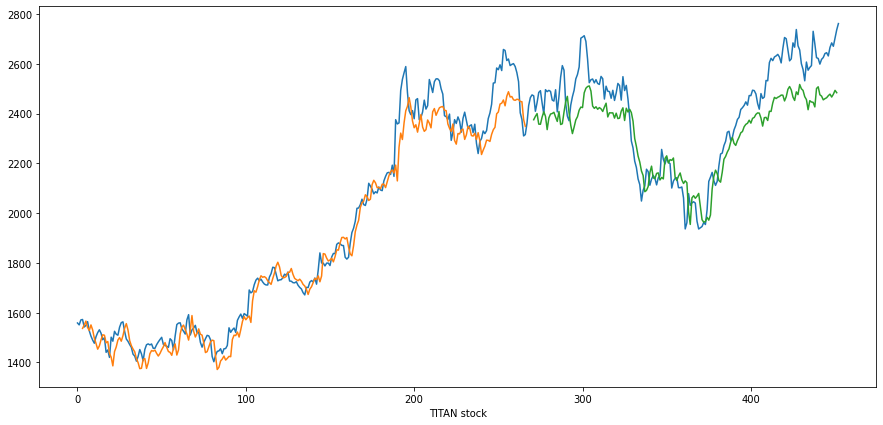

Epoch 1/10
5/5 [==============================] - 4s 168ms/step - loss: 0.3241 - val_loss: 0.1620
Epoch 2/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0873 - val_loss: 0.0712
Epoch 3/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0986 - val_loss: 0.0173
Epoch 4/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0215 - val_loss: 0.0459
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0324 - val_loss: 0.0101
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0160 - val_loss: 0.0235
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0128 - val_loss: 0.0064
Epoch 8/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0115 - val_loss: 0.0066
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0068 - val_loss: 0.0109
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of ULTRACEMCO
MAE: 6501.54140187587


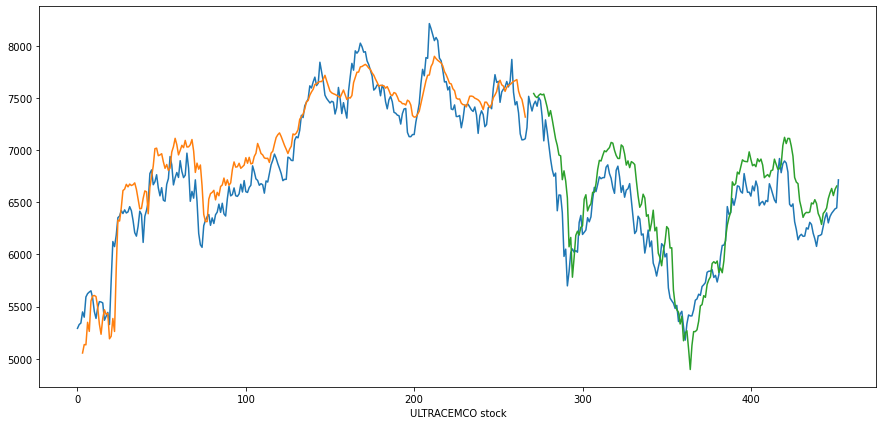

Epoch 1/10
5/5 [==============================] - 5s 167ms/step - loss: 0.3239 - val_loss: 0.0149
Epoch 2/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0414 - val_loss: 0.0459
Epoch 3/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0542 - val_loss: 0.0197
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0378 - val_loss: 0.0253
Epoch 5/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0388 - val_loss: 0.0214
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0273 - val_loss: 0.0134
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0186 - val_loss: 0.0163
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0145 - val_loss: 0.0098
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0091 - val_loss: 0.0069
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of UPL
MAE: 737.6909755574233
RMSE: 

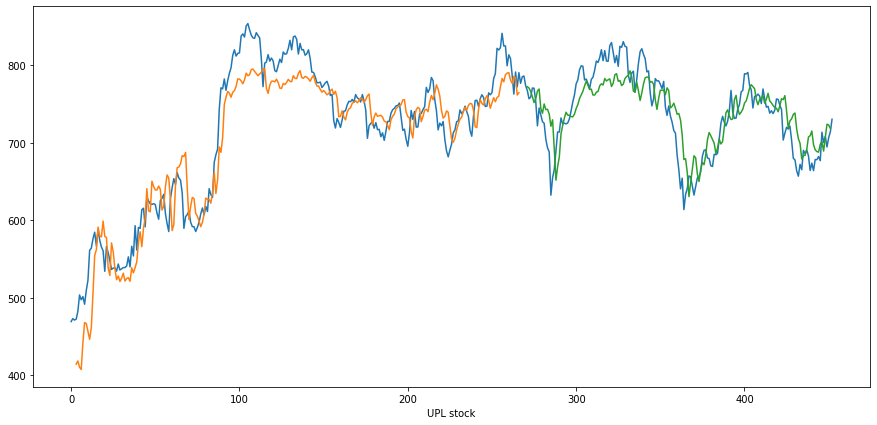

Epoch 1/10
5/5 [==============================] - 4s 166ms/step - loss: 0.0126 - val_loss: 0.0341
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0065 - val_loss: 0.0144
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0060 - val_loss: 0.0189
Epoch 4/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0044 - val_loss: 0.0115
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0035 - val_loss: 0.0141
Epoch 6/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0022 - val_loss: 0.0089
Epoch 7/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0020 - val_loss: 0.0085
Epoch 8/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0017 - val_loss: 0.0066
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0016 - val_loss: 0.0063
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of VEDL
MAE: 305.0789157970121
RMSE:

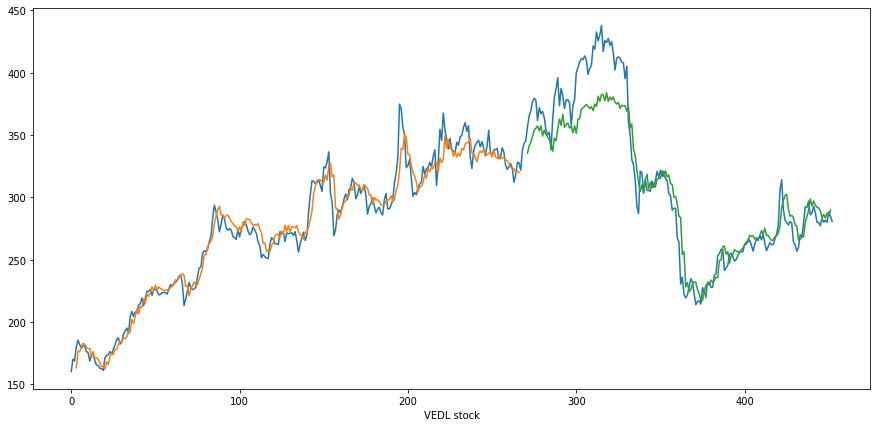

Epoch 1/10
5/5 [==============================] - 4s 160ms/step - loss: 0.0307 - val_loss: 0.0094
Epoch 2/10
5/5 [==============================] - 0s 24ms/step - loss: 0.0109 - val_loss: 0.0023
Epoch 3/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0059 - val_loss: 0.0094
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 5/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0050 - val_loss: 0.0058
Epoch 6/10
5/5 [==============================] - 0s 20ms/step - loss: 0.0048 - val_loss: 0.0028
Epoch 7/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0044 - val_loss: 0.0034
Epoch 8/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 9/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0038 - val_loss: 0.0019
Epoch 10/10
6/6 [==============================] - 0s 5ms/step
Results of sklearn.metrics of WIPRO
MAE: 483.5045917758867
RMSE

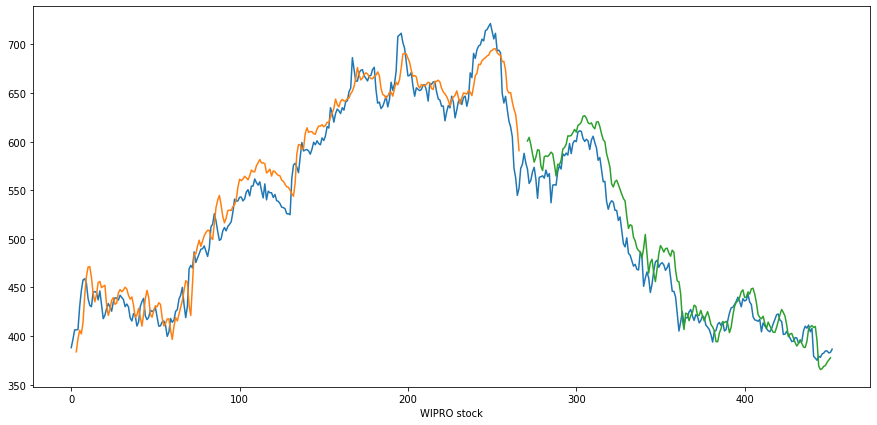

Epoch 1/10
5/5 [==============================] - 5s 157ms/step - loss: 0.0272 - val_loss: 0.0338
Epoch 2/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0159 - val_loss: 0.0070
Epoch 3/10
5/5 [==============================] - 0s 22ms/step - loss: 0.0090 - val_loss: 0.0210
Epoch 4/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0070 - val_loss: 0.0046
Epoch 5/10
5/5 [==============================] - 0s 19ms/step - loss: 0.0078 - val_loss: 0.0138
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0092 - val_loss: 0.0022
Epoch 7/10
5/5 [==============================] - 0s 23ms/step - loss: 0.0079 - val_loss: 0.0028
Epoch 8/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0053 - val_loss: 0.0062
Epoch 9/10
5/5 [==============================] - 0s 18ms/step - loss: 0.0042 - val_loss: 0.0019
Epoch 10/10
6/6 [==============================] - 0s 4ms/step
Results of sklearn.metrics of ZEEL
MAE: 261.60561364865623
RMSE

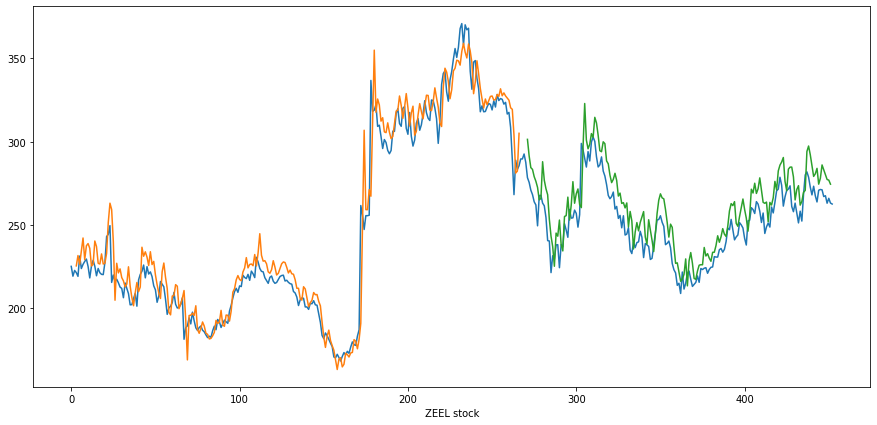

In [ ]:
for i in df2.columns:
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1 = scaler.fit_transform(np.array(df2[i]).reshape(-1, 1))

    train_data, test_data = df1[0:268], df1[268:len(df2)]

    time_step = 3
    X_train, y_train = create_dataset(train_data, time_step)
    X_test, ytest = create_dataset(test_data, time_step)
    model = Sequential()
    model.add(SimpleRNN(40, return_sequences=True, input_shape=(3, 1)))
    model.add(SimpleRNN(20, return_sequences=True))
    model.add(SimpleRNN(10, return_sequences=True))
    model.add(SimpleRNN(5))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, validation_data=(
        X_test, ytest), epochs=10, batch_size=64, verbose=1)
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    mae = metrics.mean_absolute_error(ytest, test_predict)
    mse = metrics.mean_squared_error(ytest, test_predict)
    # acc = metrics.accuracy_score(ytest, test_predict)
    rmse = np.sqrt(mse)  # mse**(0.5)

    print("Results of sklearn.metrics of "+i)
    print("MAE:", mae)
    print("RMSE:", rmse)
    # print("Accuracy:",acc)
    look_back = 3
    trainPredictPlot = np.empty_like(df1)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df1)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2) +
                    1:len(df1)-1, :] = test_predict
    # plot baseline and predictions
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(7)
    plt.plot(scaler.inverse_transform(df1))
    plt.plot(trainPredictPlot)
    plt.plot(testPredictPlot)
    plt.xlabel(i+' stock')
    plt.show()